In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import transbigdata as tbd
import regex as re
pd.set_option('display.max_columns', None)

In [3]:
import fiona
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [4]:
route =  r'../data/external/Ligne-101.kml'

In [5]:
linegstop = gpd.GeoDataFrame.from_file(route,driver='KML')
line = linegstop.iloc[0:1].copy()
stops = linegstop.drop([0])


In [6]:
line

Name Description                                           geometry
0  Ligne 101              LINESTRING (5.39210 36.18485, 5.39219 36.18577...

<AxesSubplot:>

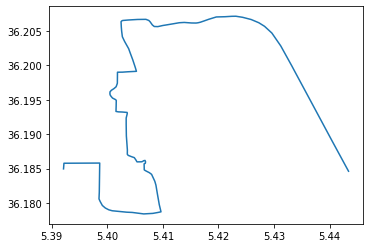

In [7]:
line.plot()

In [8]:
stops

Name Description                  geometry
1                GR              POINT (5.39196 36.18542)
2             CFA01              POINT (5.39497 36.18572)
3             CFA02              POINT (5.39865 36.18503)
4              SAMU              POINT (5.39862 36.18096)
5             MAHDI              POINT (5.39999 36.17926)
6        1000 LOGTS              POINT (5.40482 36.17858)
7            BIZARD              POINT (5.40952 36.17914)
8            CENTRE              POINT (5.40909 36.18044)
9         ASSURANCE              POINT (5.40866 36.18274)
10             SOUK              POINT (5.40724 36.18455)
11     LES REMPARTS              POINT (5.40361 36.18804)
12              CHU              POINT (5.40346 36.19163)
13      MOSQUEE 750              POINT (5.40160 36.19463)
14     750 LOGTS 01              POINT (5.40054 36.19560)
15     750 LOGTS 02              POINT (5.40164 36.19712)
16     750 LOGTS 03              POINT (5.40181 36.19857)
17              ADE              POINT (5.40338 36.19912)
18        MATERNITE              POINT (5.40471 36.20052)
19           KABOUB              POINT (5.40316 36.20358)
20       BOUSSEKINE              POINT (5.40334 36.20653)
21         GAOUA 01              POINT (5.40739 36.20669)
22         GAOUA 02              POINT (5.40911 36.20578)
23              CEM              POINT (5.41228 36.20614)
24      MOSQUEE 500              POINT (5.41722 36.20635)
25  STADE 500 LOGTS              POINT (5.42284 36.20720)
26     407 LOGTS 01              POINT (5.42619 36.20664)
27     407 LOGTS 02              POINT (5.42885 36.20529)
28        HACHMI 01              POINT (5.43082 36.20330)
29        HACHMI 02              POINT (5.43263 36.20102)
30       1006 LOGTS              POINT (5.43388 36.19894)
31      1014 LOGTS               POINT (5.43725 36.19383)
32     LES TOURS 03              POINT (5.43938 36.19076)
33     LES TOURS 02              POINT (5.44166 36.18741)
34     LES TOURS 01              POINT (5.44272 36.18562)

In [9]:
for i in range(len(stops)+1):
    stops['Name'][i]=str(i)

In [10]:
stops.shape

(34, 3)

In [11]:
stops['stopname'] = stops['Name']
stops = stops.drop(stops.columns[1],axis=1)
stops = stops.drop(stops.columns[0],axis=1)

In [12]:
stops['lon'] = stops.geometry.apply(lambda p: p.x)
stops['lat'] = stops.geometry.apply(lambda p: p.y)
stops['linename']="101"

In [13]:
stop=stops.loc[:,['linename','stopname','lat','lon','geometry']]
stop.head()

linename stopname        lat       lon                  geometry
1      101        1  36.185421  5.391961  POINT (5.39196 36.18542)
2      101        2  36.185718  5.394972  POINT (5.39497 36.18572)
3      101        3  36.185034  5.398654  POINT (5.39865 36.18503)
4      101        4  36.180957  5.398621  POINT (5.39862 36.18096)
5      101        5  36.179260  5.399993  POINT (5.39999 36.17926)

In [14]:
import folium
from xml.dom import minidom

# Parse the KML file to extract the coordinates
kml = minidom.parse("../data/external/Ligne-101.kml")
coordinates = kml.getElementsByTagName("coordinates")[0].firstChild.nodeValue.strip().split("\n")

# Create a list of tuples for the coordinates
coords_list = []
for coord in coordinates:
    lat, lon = coord.split(",")
    coords_list.append((float(lon),float(lat)))

# Create a map centered on your city
map = folium.Map(location=[36.1943, 5.4192], zoom_start=14)

# Add the polyline to the map
folium.PolyLine(
    locations=coords_list,
    weight=3,
    color="blue",
    opacity=1,
).add_to(map)


# Read in your data
df = stops


# Create a feature group for your route
route_group = folium.FeatureGroup(name='Route')

# Loop through your data and add markers for each stop on the route
for index, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['stopname'],
        icon=folium.Icon(color='blue')
    ).add_to(route_group)

# Add the route group to the map
route_group.add_to(map)

# Create a feature group for your bus
bus_group = folium.FeatureGroup(name='Bus')

# Add a marker for your bus
folium.Marker(
    location=[5.439383	,36.190757],
    popup='Bus',
    icon=folium.Icon(color='red', icon='bus', prefix='fa')
).add_to(bus_group)

# Add the bus group to the map
bus_group.add_to(map)

# Add a layer control to the map
folium.LayerControl().add_to(map)
map
# Save the map as an HTML file
#map.save('route_map.html')


In [15]:
BUS_GPS= pd.read_csv(r'../data/interim/DATARAW_FebApr.csv')
#Convert the time column to datetime type
BUS_GPS

ID                 Time  Longitude   Latitude     Speed  \
0        19010-3  2023-03-14 00:00:00   5.458638  36.172869  0.0 km/h   
1        19010-3  2023-03-14 00:00:10   5.458638  36.172869  0.0 km/h   
2        19010-3  2023-03-14 00:00:20   5.458638  36.172869  0.0 km/h   
3        19010-3  2023-03-14 00:00:30   5.458638  36.172869  0.0 km/h   
4        19010-3  2023-03-14 00:00:40   5.458638  36.172869  0.0 km/h   
...          ...                  ...        ...        ...       ...   
3892632  19001-3  2023-03-12 23:58:11   5.460148  36.176930  0.0 km/h   
3892633  19001-3  2023-03-12 23:58:21   5.460148  36.176930  0.0 km/h   
3892634  19001-3  2023-03-12 23:58:31   5.460148  36.176930  0.0 km/h   
3892635  19001-3  2023-03-12 23:58:41   5.460148  36.176930  0.0 km/h   
3892636  19001-3  2023-03-12 23:58:51   5.460148  36.176930  0.0 km/h   

                                                Attributes  
0        distance=0.0  totalDistance=6948552.77  motion...  
1        distance=0.0  totalDistance=6948552.77  motion...  
2        distance=0.0  totalDistance=6948552.77  motion...  
3        distance=0.0  totalDistance=6948552.77  motion...  
4        distance=0.0  totalDistance=6948552.77  motion...  
...                                                    ...  
3892632  distance=0.0  totalDistance=4821619.06  motion...  
3892633  distance=0.0  totalDistance=4821619.06  motion...  
3892634  distance=0.0  totalDistance=4821619.06  motion...  
3892635  distance=0.0  totalDistance=4821619.06  motion...  
3892636  distance=0.0  totalDistance=4821619.06  motion...  

[3892637 rows x 6 columns]

In [16]:
BUS_GPS["GPSDateTime"]=BUS_GPS["Time"]
BUS_GPS["GPSDateTime"]=pd.to_datetime(BUS_GPS["GPSDateTime"])
BUS_GPS

ID                 Time  Longitude   Latitude     Speed  \
0        19010-3  2023-03-14 00:00:00   5.458638  36.172869  0.0 km/h   
1        19010-3  2023-03-14 00:00:10   5.458638  36.172869  0.0 km/h   
2        19010-3  2023-03-14 00:00:20   5.458638  36.172869  0.0 km/h   
3        19010-3  2023-03-14 00:00:30   5.458638  36.172869  0.0 km/h   
4        19010-3  2023-03-14 00:00:40   5.458638  36.172869  0.0 km/h   
...          ...                  ...        ...        ...       ...   
3892632  19001-3  2023-03-12 23:58:11   5.460148  36.176930  0.0 km/h   
3892633  19001-3  2023-03-12 23:58:21   5.460148  36.176930  0.0 km/h   
3892634  19001-3  2023-03-12 23:58:31   5.460148  36.176930  0.0 km/h   
3892635  19001-3  2023-03-12 23:58:41   5.460148  36.176930  0.0 km/h   
3892636  19001-3  2023-03-12 23:58:51   5.460148  36.176930  0.0 km/h   

                                                Attributes         GPSDateTime  
0        distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:00  
1        distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:10  
2        distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:20  
3        distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:30  
4        distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:40  
...                                                    ...                 ...  
3892632  distance=0.0  totalDistance=4821619.06  motion... 2023-03-12 23:58:11  
3892633  distance=0.0  totalDistance=4821619.06  motion... 2023-03-12 23:58:21  
3892634  distance=0.0  totalDistance=4821619.06  motion... 2023-03-12 23:58:31  
3892635  distance=0.0  totalDistance=4821619.06  motion... 2023-03-12 23:58:41  
3892636  distance=0.0  totalDistance=4821619.06  motion... 2023-03-12 23:58:51  

[3892637 rows x 7 columns]

In [17]:
#Convert coordinates
BUS_GPS['lon']=BUS_GPS['Longitude']
BUS_GPS['lat'] = BUS_GPS['Latitude']
BUS_GPS.head(5)

ID                 Time  Longitude   Latitude     Speed  \
0  19010-3  2023-03-14 00:00:00   5.458638  36.172869  0.0 km/h   
1  19010-3  2023-03-14 00:00:10   5.458638  36.172869  0.0 km/h   
2  19010-3  2023-03-14 00:00:20   5.458638  36.172869  0.0 km/h   
3  19010-3  2023-03-14 00:00:30   5.458638  36.172869  0.0 km/h   
4  19010-3  2023-03-14 00:00:40   5.458638  36.172869  0.0 km/h   

                                          Attributes         GPSDateTime  \
0  distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:00   
1  distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:10   
2  distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:20   
3  distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:30   
4  distance=0.0  totalDistance=6948552.77  motion... 2023-03-14 00:00:40   

        lon        lat  
0  5.458638  36.172869  
1  5.458638  36.172869  
2  5.458638  36.172869  
3  5.458638  36.172869  
4  5.458638  36.172869

In [18]:

BUS_GPS['VehicleId']=BUS_GPS['ID']


In [19]:
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=vibration  ', '')
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=lowBattery  ', '')
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=powerCut  ', '')

In [20]:
BUS_GPS

ID                 Time  Longitude   Latitude     Speed  \
0        19010-3  2023-03-14 00:00:00   5.458638  36.172869  0.0 km/h   
1        19010-3  2023-03-14 00:00:10   5.458638  36.172869  0.0 km/h   
2        19010-3  2023-03-14 00:00:20   5.458638  36.172869  0.0 km/h   
3        19010-3  2023-03-14 00:00:30   5.458638  36.172869  0.0 km/h   
4        19010-3  2023-03-14 00:00:40   5.458638  36.172869  0.0 km/h   
...          ...                  ...        ...        ...       ...   
3892632  19001-3  2023-03-12 23:58:11   5.460148  36.176930  0.0 km/h   
3892633  19001-3  2023-03-12 23:58:21   5.460148  36.176930  0.0 km/h   
3892634  19001-3  2023-03-12 23:58:31   5.460148  36.176930  0.0 km/h   
3892635  19001-3  2023-03-12 23:58:41   5.460148  36.176930  0.0 km/h   
3892636  19001-3  2023-03-12 23:58:51   5.460148  36.176930  0.0 km/h   

                                                Attributes  \
0        distance=0.0  totalDistance=6948552.77  motion...   
1        distance=0.0  totalDistance=6948552.77  motion...   
2        distance=0.0  totalDistance=6948552.77  motion...   
3        distance=0.0  totalDistance=6948552.77  motion...   
4        distance=0.0  totalDistance=6948552.77  motion...   
...                                                    ...   
3892632  distance=0.0  totalDistance=4821619.06  motion...   
3892633  distance=0.0  totalDistance=4821619.06  motion...   
3892634  distance=0.0  totalDistance=4821619.06  motion...   
3892635  distance=0.0  totalDistance=4821619.06  motion...   
3892636  distance=0.0  totalDistance=4821619.06  motion...   

                GPSDateTime       lon        lat VehicleId  
0       2023-03-14 00:00:00  5.458638  36.172869   19010-3  
1       2023-03-14 00:00:10  5.458638  36.172869   19010-3  
2       2023-03-14 00:00:20  5.458638  36.172869   19010-3  
3       2023-03-14 00:00:30  5.458638  36.172869   19010-3  
4       2023-03-14 00:00:40  5.458638  36.172869   19010-3  
...                     ...       ...        ...       ...  
3892632 2023-03-12 23:58:11  5.460148  36.176930   19001-3  
3892633 2023-03-12 23:58:21  5.460148  36.176930   19001-3  
3892634 2023-03-12 23:58:31  5.460148  36.176930   19001-3  
3892635 2023-03-12 23:58:41  5.460148  36.176930   19001-3  
3892636 2023-03-12 23:58:51  5.460148  36.176930   19001-3  

[3892637 rows x 10 columns]

In [21]:
BUS_GPS['ID'].unique()

array(['19010-3', '19010-2', '19004-3', '19004-2', '19003-2', '19009-2',
       '19007-3', '19009-3', '19003-3', '19007-2', '19008-2', '19002-2',
       '19006-3', '19002-3', '19008-3', '19006-2', '19005-3', '19001-2',
       '19005-2', '19001-3'], dtype=object)

In [22]:
BUS_GPS[['DistanceGap','totaldistance','motion']] =BUS_GPS['Attributes'].str.split('  ', expand=True)

In [23]:
BUS_GPS

ID                 Time  Longitude   Latitude     Speed  \
0        19010-3  2023-03-14 00:00:00   5.458638  36.172869  0.0 km/h   
1        19010-3  2023-03-14 00:00:10   5.458638  36.172869  0.0 km/h   
2        19010-3  2023-03-14 00:00:20   5.458638  36.172869  0.0 km/h   
3        19010-3  2023-03-14 00:00:30   5.458638  36.172869  0.0 km/h   
4        19010-3  2023-03-14 00:00:40   5.458638  36.172869  0.0 km/h   
...          ...                  ...        ...        ...       ...   
3892632  19001-3  2023-03-12 23:58:11   5.460148  36.176930  0.0 km/h   
3892633  19001-3  2023-03-12 23:58:21   5.460148  36.176930  0.0 km/h   
3892634  19001-3  2023-03-12 23:58:31   5.460148  36.176930  0.0 km/h   
3892635  19001-3  2023-03-12 23:58:41   5.460148  36.176930  0.0 km/h   
3892636  19001-3  2023-03-12 23:58:51   5.460148  36.176930  0.0 km/h   

                                                Attributes  \
0        distance=0.0  totalDistance=6948552.77  motion...   
1        distance=0.0  totalDistance=6948552.77  motion...   
2        distance=0.0  totalDistance=6948552.77  motion...   
3        distance=0.0  totalDistance=6948552.77  motion...   
4        distance=0.0  totalDistance=6948552.77  motion...   
...                                                    ...   
3892632  distance=0.0  totalDistance=4821619.06  motion...   
3892633  distance=0.0  totalDistance=4821619.06  motion...   
3892634  distance=0.0  totalDistance=4821619.06  motion...   
3892635  distance=0.0  totalDistance=4821619.06  motion...   
3892636  distance=0.0  totalDistance=4821619.06  motion...   

                GPSDateTime       lon        lat VehicleId   DistanceGap  \
0       2023-03-14 00:00:00  5.458638  36.172869   19010-3  distance=0.0   
1       2023-03-14 00:00:10  5.458638  36.172869   19010-3  distance=0.0   
2       2023-03-14 00:00:20  5.458638  36.172869   19010-3  distance=0.0   
3       2023-03-14 00:00:30  5.458638  36.172869   19010-3  distance=0.0   
4       2023-03-14 00:00:40  5.458638  36.172869   19010-3  distance=0.0   
...                     ...       ...        ...       ...           ...   
3892632 2023-03-12 23:58:11  5.460148  36.176930   19001-3  distance=0.0   
3892633 2023-03-12 23:58:21  5.460148  36.176930   19001-3  distance=0.0   
3892634 2023-03-12 23:58:31  5.460148  36.176930   19001-3  distance=0.0   
3892635 2023-03-12 23:58:41  5.460148  36.176930   19001-3  distance=0.0   
3892636 2023-03-12 23:58:51  5.460148  36.176930   19001-3  distance=0.0   

                    totaldistance        motion  
0        totalDistance=6948552.77  motion=false  
1        totalDistance=6948552.77  motion=false  
2        totalDistance=6948552.77  motion=false  
3        totalDistance=6948552.77  motion=false  
4        totalDistance=6948552.77  motion=false  
...                           ...           ...  
3892632  totalDistance=4821619.06  motion=false  
3892633  totalDistance=4821619.06  motion=false  
3892634  totalDistance=4821619.06  motion=false  
3892635  totalDistance=4821619.06  motion=false  
3892636  totalDistance=4821619.06  motion=false  

[3892637 rows x 13 columns]

In [24]:
BUS_GPS['DistanceGap'] = BUS_GPS['DistanceGap'].str.replace(r'distance=', '')
BUS_GPS['Speed'] = BUS_GPS['Speed'].str.replace(r'km/h', '')
BUS_GPS['motion'] = BUS_GPS['motion'].str.replace(r'motion=', '')
BUS_GPS['totaldistance'] = BUS_GPS['totaldistance'].str.replace(r'totalDistance=', '')

In [25]:
BUS_GPS=BUS_GPS.loc[:,['VehicleId', 'GPSDateTime', 'lat', 'lon','ID','Speed','motion','DistanceGap','totaldistance']]
BUS_GPS

VehicleId         GPSDateTime        lat       lon       ID Speed  \
0         19010-3 2023-03-14 00:00:00  36.172869  5.458638  19010-3  0.0    
1         19010-3 2023-03-14 00:00:10  36.172869  5.458638  19010-3  0.0    
2         19010-3 2023-03-14 00:00:20  36.172869  5.458638  19010-3  0.0    
3         19010-3 2023-03-14 00:00:30  36.172869  5.458638  19010-3  0.0    
4         19010-3 2023-03-14 00:00:40  36.172869  5.458638  19010-3  0.0    
...           ...                 ...        ...       ...      ...   ...   
3892632   19001-3 2023-03-12 23:58:11  36.176930  5.460148  19001-3  0.0    
3892633   19001-3 2023-03-12 23:58:21  36.176930  5.460148  19001-3  0.0    
3892634   19001-3 2023-03-12 23:58:31  36.176930  5.460148  19001-3  0.0    
3892635   19001-3 2023-03-12 23:58:41  36.176930  5.460148  19001-3  0.0    
3892636   19001-3 2023-03-12 23:58:51  36.176930  5.460148  19001-3  0.0    

        motion DistanceGap totaldistance  
0        false         0.0    6948552.77  
1        false         0.0    6948552.77  
2        false         0.0    6948552.77  
3        false         0.0    6948552.77  
4        false         0.0    6948552.77  
...        ...         ...           ...  
3892632  false         0.0    4821619.06  
3892633  false         0.0    4821619.06  
3892634  false         0.0    4821619.06  
3892635  false         0.0    4821619.06  
3892636  false         0.0    4821619.06  

[3892637 rows x 9 columns]

In [26]:
BUS_GPS

VehicleId         GPSDateTime        lat       lon       ID Speed  \
0         19010-3 2023-03-14 00:00:00  36.172869  5.458638  19010-3  0.0    
1         19010-3 2023-03-14 00:00:10  36.172869  5.458638  19010-3  0.0    
2         19010-3 2023-03-14 00:00:20  36.172869  5.458638  19010-3  0.0    
3         19010-3 2023-03-14 00:00:30  36.172869  5.458638  19010-3  0.0    
4         19010-3 2023-03-14 00:00:40  36.172869  5.458638  19010-3  0.0    
...           ...                 ...        ...       ...      ...   ...   
3892632   19001-3 2023-03-12 23:58:11  36.176930  5.460148  19001-3  0.0    
3892633   19001-3 2023-03-12 23:58:21  36.176930  5.460148  19001-3  0.0    
3892634   19001-3 2023-03-12 23:58:31  36.176930  5.460148  19001-3  0.0    
3892635   19001-3 2023-03-12 23:58:41  36.176930  5.460148  19001-3  0.0    
3892636   19001-3 2023-03-12 23:58:51  36.176930  5.460148  19001-3  0.0    

        motion DistanceGap totaldistance  
0        false         0.0    6948552.77  
1        false         0.0    6948552.77  
2        false         0.0    6948552.77  
3        false         0.0    6948552.77  
4        false         0.0    6948552.77  
...        ...         ...           ...  
3892632  false         0.0    4821619.06  
3892633  false         0.0    4821619.06  
3892634  false         0.0    4821619.06  
3892635  false         0.0    4821619.06  
3892636  false         0.0    4821619.06  

[3892637 rows x 9 columns]

In [27]:
arriveinfo, data = tbd.busgps_arriveinfo(BUS_GPS,line,stops,stopbuffer=30,projectoutput=True)

Cleaning data...
Position matching......
Matching arrival and leaving info.................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [28]:
arriveinfo.stopname.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34'],
      dtype=object)

In [29]:
arriveinfo.head(50)

arrivetime           leavetime stopname  VehicleId
0 2023-02-01 07:10:48 2023-02-01 07:19:18        1          0
2 2023-02-01 09:08:38 2023-02-01 09:21:59        1          0
3 2023-02-01 11:27:42 2023-02-01 11:37:42        1          0
4 2023-02-01 13:35:44 2023-02-01 13:54:57        1          0
5 2023-02-01 16:10:10 2023-02-01 16:29:15        1          0
0 2023-02-01 07:10:03 2023-02-01 07:10:09        2          0
1 2023-02-01 07:20:24 2023-02-01 07:20:32        2          0
2 2023-02-01 09:07:57 2023-02-01 09:08:05        2          0
3 2023-02-01 09:22:53 2023-02-01 09:22:58        2          0
4 2023-02-01 11:27:05 2023-02-01 11:27:11        2          0
5 2023-02-01 11:38:37 2023-02-01 11:38:46        2          0
6 2023-02-01 13:35:13 2023-02-01 13:35:15        2          0
7 2023-02-01 13:55:36 2023-02-01 13:55:41        2          0
8 2023-02-01 16:09:38 2023-02-01 16:09:43        2          0
9 2023-02-01 16:29:53 2023-02-01 16:30:00        2          0
0 2023-02-01 07:08:33 2023-02-01 07:08:39        3          0
1 2023-02-01 07:21:39 2023-02-01 07:21:53        3          0
2 2023-02-01 09:06:01 2023-02-01 09:06:36        3          0
3 2023-02-01 09:24:41 2023-02-01 09:24:45        3          0
4 2023-02-01 11:24:00 2023-02-01 11:24:57        3          0
5 2023-02-01 11:42:14 2023-02-01 11:42:21        3          0
6 2023-02-01 13:33:18 2023-02-01 13:33:27        3          0
7 2023-02-01 13:57:13 2023-02-01 13:57:18        3          0
8 2023-02-01 16:07:21 2023-02-01 16:07:30        3          0
9 2023-02-01 16:32:39 2023-02-01 16:32:50        3          0
0 2023-02-01 07:07:48 2023-02-01 07:07:53        4          0
1 2023-02-01 07:22:31 2023-02-01 07:22:38        4          0
2 2023-02-01 09:04:41 2023-02-01 09:04:51        4          0
3 2023-02-01 09:25:31 2023-02-01 09:25:37        4          0
4 2023-02-01 11:21:51 2023-02-01 11:21:59        4          0
5 2023-02-01 11:43:34 2023-02-01 11:43:45        4          0
6 2023-02-01 13:32:14 2023-02-01 13:32:21        4          0
7 2023-02-01 13:58:16 2023-02-01 13:58:39        4          0
8 2023-02-01 16:06:06 2023-02-01 16:06:10        4          0
9 2023-02-01 16:33:36 2023-02-01 16:33:50        4          0
0 2023-02-01 07:07:11 2023-02-01 07:07:18        5          0
1 2023-02-01 07:22:59 2023-02-01 07:23:04        5          0
2 2023-02-01 09:03:51 2023-02-01 09:04:09        5          0
3 2023-02-01 09:26:14 2023-02-01 09:26:18        5          0
4 2023-02-01 11:21:18 2023-02-01 11:21:22        5          0
5 2023-02-01 11:44:26 2023-02-01 11:44:34        5          0
6 2023-02-01 13:31:35 2023-02-01 13:31:41        5          0
7 2023-02-01 13:59:08 2023-02-01 13:59:13        5          0
8 2023-02-01 16:05:36 2023-02-01 16:05:43        5          0
9 2023-02-01 16:34:23 2023-02-01 16:34:27        5          0
0 2023-02-01 07:04:42 2023-02-01 07:04:46        6          0
1 2023-02-01 07:26:18 2023-02-01 07:26:51        6          0
2 2023-02-01 09:01:36 2023-02-01 09:01:41        6          0
3 2023-02-01 09:28:41 2023-02-01 09:29:08        6          0
4 2023-02-01 11:18:55 2023-02-01 11:19:03        6          0

In [30]:
data

VehicleId         GPSDateTime        lat       lon       ID  Speed  \
0                0 2023-02-01 06:27:10  36.183713  5.444493  19001-2  35.1    
8                0 2023-02-01 06:27:20  36.184214  5.443844  19001-2  25.1    
87               0 2023-02-01 06:27:26  36.184477  5.443635  19001-2  15.7    
88               0 2023-02-01 06:27:30  36.184616  5.443572  19001-2  14.9    
128              0 2023-02-01 06:27:40  36.184968  5.443344  19001-2   7.3    
...            ...                 ...        ...       ...      ...    ...   
2135999        445 2023-02-28 19:00:30  36.178908  5.400911  19004-2  23.8    
2136225        445 2023-02-28 19:00:40  36.178796  5.401252  19004-2   7.3    
2136226        445 2023-02-28 19:00:45  36.178756  5.401276  19004-2   5.1    
2214055        445 2023-02-28 19:00:50  36.178597  5.401218  19004-2  22.5    
2214572        445 2023-02-28 19:01:00  36.177806  5.400773  19004-2  40.2    

        motion DistanceGap totaldistance                           geometry  \
0         true      100.53     744768.63  POINT (34514611.163 13295096.833)   
8         true       80.72     744849.35  POINT (34514728.461 13295115.014)   
87        true       34.77     744884.12  POINT (34514779.354 13295110.665)   
88        true       16.51     744900.63  POINT (34514802.504 13295103.478)   
128       true        44.2     744944.83  POINT (34514866.421 13295092.219)   
...        ...         ...           ...                                ...   
2135999   true      103.05    5123558.53  POINT (34517511.836 13300145.223)   
2136225   true       33.11    5123591.64  POINT (34517469.798 13300120.540)   
2136226   true        4.95    5123596.59  POINT (34517462.693 13300122.066)   
2214055   true       18.48    5123615.07  POINT (34517446.761 13300144.000)   
2214572   true       96.69    5123711.76  POINT (34517380.572 13300269.525)   

              project    time_st  
0        16968.544102     1647.0  
8        16968.544102     1657.0  
87       16968.544102     1663.0  
88       16960.894524     1667.0  
128      16896.004273     1677.0  
...               ...        ...  
2135999   2303.365955  2379647.0  
2136225   2350.147489  2379657.0  
2136226   2353.904264  2379662.0  
2214055   2348.843373  2379667.0  
2214572   2302.759875  2379677.0  

[2214737 rows x 12 columns]

In [37]:

# Convert 'GPSDateTime' column to datetime type
data['GPSDateTime'] = pd.to_datetime(data['GPSDateTime'])

# Filter the data based on the given conditions
filtered_datadist = data[(data['GPSDateTime'] >= '2023-02-01 07:19:18') & (data['GPSDateTime'] <= '2023-02-01 08:11:36') & (data['ID'] == '19001-2') & (data['VehicleId'] == 0)]

# Print the filtered dat
filtered_datadist


VehicleId         GPSDateTime        lat       lon       ID  Speed  \
27214          0 2023-02-01 07:19:21  36.185628  5.392186  19001-2   6.3    
27215          0 2023-02-01 07:19:25  36.185677  5.392258  19001-2   9.4    
33584          0 2023-02-01 07:19:27  36.185686  5.392328  19001-2  13.4    
33677          0 2023-02-01 07:19:31  36.185677  5.392506  19001-2  15.1    
33725          0 2023-02-01 07:19:41  36.185663  5.393181  19001-2  24.7    
...          ...                 ...        ...       ...      ...    ...   
58626          0 2023-02-01 08:10:52  36.186477  5.442103  19001-2  20.2    
58687          0 2023-02-01 08:11:02  36.186103  5.442394  19001-2   8.6    
58746          0 2023-02-01 08:11:12  36.186057  5.442403  19001-2   0.7    
58747          0 2023-02-01 08:11:22  36.186003  5.442405  19001-2   0.0    
58762          0 2023-02-01 08:11:32  36.185944  5.442435  19001-2   6.0    

      motion DistanceGap totaldistance                           geometry  \
27214   true        6.44     756382.35  POINT (34519085.679 13300389.139)   
27215   true        8.49     756390.84  POINT (34519086.303 13300376.678)   
33584   true        6.44     756397.28  POINT (34519081.696 13300368.394)   
33677   true       15.98     756413.26  POINT (34519066.183 13300350.698)   
33725   true       60.71     756473.97  POINT (34519009.762 13300281.333)   
...      ...         ...           ...                                ...   
58626   true       61.17     767420.55  POINT (34515161.828 13295072.078)   
58687   true       49.19     767469.74  POINT (34515089.890 13295078.851)   
58746   true        5.18     767474.92  POINT (34515083.238 13295082.525)   
58747  false        5.92     767480.84  POINT (34515076.170 13295087.577)   
58762   true        7.09     767487.93  POINT (34515066.145 13295090.395)   

            project  time_st  
27214    127.718430   4778.0  
27215    136.513474   4782.0  
33584    170.119972   4784.0  
33677    193.599662   4788.0  
33725    282.971802   4798.0  
...             ...      ...  
58626  16601.068398   7869.0  
58687  16673.179859   7879.0  
58746  16680.324788   7889.0  
58747  16688.096067   7899.0  
58762  16698.438344   7909.0  

[360 rows x 12 columns]

In [40]:
arrivedist= tbd.busgps_arriveinfo(filtered_datadist,line,stops,stopbuffer=40,projectoutput=False)
arrivedist

Cleaning data...
Position matching......
Matching arrival and leaving info....

arrivetime           leavetime stopname  VehicleId
0 2023-02-01 07:19:21 2023-02-01 07:19:22        1          0
0 2023-02-01 07:20:23 2023-02-01 07:20:33        2          0
0 2023-02-01 07:21:30 2023-02-01 07:21:53        3          0
0 2023-02-01 07:22:30 2023-02-01 07:22:39        4          0
0 2023-02-01 07:22:58 2023-02-01 07:23:06        5          0
0 2023-02-01 07:26:17 2023-02-01 07:26:52        6          0
0 2023-02-01 07:28:00 2023-02-01 07:29:07        7          0
0 2023-02-01 07:29:27 2023-02-01 07:29:37        8          0
0 2023-02-01 07:30:28 2023-02-01 07:30:49        9          0
0 2023-02-01 07:31:22 2023-02-01 07:31:51       10          0
0 2023-02-01 07:33:23 2023-02-01 07:34:00       11          0
0 2023-02-01 07:34:49 2023-02-01 07:34:58       12          0
0 2023-02-01 07:37:28 2023-02-01 07:37:46       13          0
0 2023-02-01 07:38:23 2023-02-01 07:38:34       14          0
0 2023-02-01 07:39:02 2023-02-01 07:39:32       15          0
0 2023-02-01 07:39:50 2023-02-01 07:40:19       16          0
0 2023-02-01 07:41:14 2023-02-01 07:41:25       17          0
0 2023-02-01 07:43:47 2023-02-01 07:44:01       18          0
0 2023-02-01 07:45:19 2023-02-01 07:45:30       19          0
0 2023-02-01 07:47:17 2023-02-01 07:47:27       20          0
0 2023-02-01 07:48:00 2023-02-01 07:48:38       21          0
0 2023-02-01 07:48:59 2023-02-01 07:49:08       22          0
0 2023-02-01 07:50:37 2023-02-01 07:50:50       23          0
0 2023-02-01 07:52:48 2023-02-01 07:53:15       24          0
0 2023-02-01 07:54:57 2023-02-01 07:55:03       25          0
0 2023-02-01 07:56:18 2023-02-01 07:56:27       26          0
0 2023-02-01 07:57:33 2023-02-01 07:57:46       27          0
0 2023-02-01 07:59:19 2023-02-01 07:59:25       28          0
0 2023-02-01 08:00:33 2023-02-01 08:00:42       29          0
0 2023-02-01 08:01:34 2023-02-01 08:02:19       30          0
0 2023-02-01 08:05:59 2023-02-01 08:06:20       31          0
0 2023-02-01 08:08:37 2023-02-01 08:08:45       32          0
0 2023-02-01 08:10:13 2023-02-01 08:10:38       33          0

In [41]:
arrivetime_list = arrivedist['arrivetime'].tolist()
arrivetime_list

[Timestamp('2023-02-01 07:19:21'),
 Timestamp('2023-02-01 07:20:23'),
 Timestamp('2023-02-01 07:21:30'),
 Timestamp('2023-02-01 07:22:30'),
 Timestamp('2023-02-01 07:22:58'),
 Timestamp('2023-02-01 07:26:17'),
 Timestamp('2023-02-01 07:28:00'),
 Timestamp('2023-02-01 07:29:27'),
 Timestamp('2023-02-01 07:30:28'),
 Timestamp('2023-02-01 07:31:22'),
 Timestamp('2023-02-01 07:33:23'),
 Timestamp('2023-02-01 07:34:49'),
 Timestamp('2023-02-01 07:37:28'),
 Timestamp('2023-02-01 07:38:23'),
 Timestamp('2023-02-01 07:39:02'),
 Timestamp('2023-02-01 07:39:50'),
 Timestamp('2023-02-01 07:41:14'),
 Timestamp('2023-02-01 07:43:47'),
 Timestamp('2023-02-01 07:45:19'),
 Timestamp('2023-02-01 07:47:17'),
 Timestamp('2023-02-01 07:48:00'),
 Timestamp('2023-02-01 07:48:59'),
 Timestamp('2023-02-01 07:50:37'),
 Timestamp('2023-02-01 07:52:48'),
 Timestamp('2023-02-01 07:54:57'),
 Timestamp('2023-02-01 07:56:18'),
 Timestamp('2023-02-01 07:57:33'),
 Timestamp('2023-02-01 07:59:19'),
 Timestamp('2023-02-

In [42]:
# Assuming you have a GeoDataFrame named 'df'
datax = filtered_datadist.to_dict(orient='records')
totaldist=[0]
def calculate_distance_gap(start_time, end_time, data):
    # Convert start_time and end_time to datetime objects
    start_time = pd.Timestamp(start_time)
    end_time = pd.Timestamp(end_time)

    # Sort the data by GPSDateTime in ascending order
    data.sort(key=lambda x: x["GPSDateTime"])

    # Find the closest GPSDateTime values to the start_time and end_time
    start_index = 0
    end_index = len(data) - 1
    for i, item in enumerate(data):
        gps_datetime = item["GPSDateTime"]
        if gps_datetime >= start_time:
            start_index = i
            break
    for i in range(len(data) - 1, -1, -1):
        gps_datetime = data[i]["GPSDateTime"]
        if gps_datetime <= end_time:
            end_index = i
            break

    # Calculate the sum of DistanceGap between start_index and end_index
    sum_distance_gap = 0.0
    for i in range(start_index, end_index):
        distance_gap = float(data[i + 1]["DistanceGap"])
        sum_distance_gap += distance_gap

    return sum_distance_gap

# Example usage
for i in range(len(arrivetime_list)-1):
    start_time = arrivetime_list[i]
    end_time = arrivetime_list[i+1]
    distance_gap = calculate_distance_gap(start_time, end_time, datax)
    totaldist.append(totaldist[i]+distance_gap)
    #print("DistanceGap between", start_time, "and", end_time, ":", distance_gap)


In [43]:
totaldist

[0,
 215.47,
 556.41,
 917.77,
 1067.69,
 1462.96,
 1918.0,
 2036.75,
 2271.83,
 2512.8599999999997,
 3093.4999999999995,
 3427.1299999999997,
 3892.39,
 4024.8599999999997,
 4192.41,
 4332.67,
 4492.35,
 4788.370000000001,
 5128.180000000001,
 5487.010000000001,
 5756.870000000001,
 5888.880000000001,
 6126.530000000001,
 6518.050000000001,
 6979.390000000001,
 7196.210000000001,
 7445.220000000001,
 7642.160000000001,
 7917.02,
 8119.27,
 8724.66,
 9060.19,
 9441.5]


bus_stops = ['GR', 'CFA01', 'CFA02', 'SAMU', 'MAHDI', '1000 LOGTS', 'BIZARD',
             'CENTRE', 'ASSURANCE', 'SOUK', 'LES REMPARTS', 'CHU',
             'MOSQUEE 750', '750 LOGTS 01', '750 LOGTS 02', '750 LOGTS 03',
             'ADE', 'MATERNITE', 'KABOUB', 'BOUSSEKINE', 'GAOUA 01', 'GAOUA 02',
             'CEM', 'MOSQUEE 500', 'STADE 500 LOGTS', '407 LOGTS 01',
             '407 LOGTS 02', 'HACHMI 01', 'HACHMI 02', '1006 LOGTS',
             '1014 LOGTS', 'LES TOURS 03', 'LES TOURS 02', 'LES TOURS 01']

onewaytime_list = []

for i in range(len(bus_stops)):
    for j in range(i+1, len(bus_stops)):
        start = bus_stops[i]
        end = bus_stops[j]
        temp_df = tbd.busgps_onewaytime(arriveinfo, start=start, end=end, col=['VehicleId', 'stopname', 'arrivetime', 'leavetime'])
        onewaytime_list.append(temp_df)

onewaytime_df = pd.concat(onewaytime_list, ignore_index=True)


In [52]:
onewaytime = tbd.busgps_onewaytime(arriveinfo,
                                   start = '1',
                                   end = '34',col = ['VehicleId','stopname', 'arrivetime', 'leavetime'])

In [53]:
q1 = onewaytime['duration'].quantile(0.25)
q3 = onewaytime['duration'].quantile(0.75)
iqr = q3 - q1

onewaytime = onewaytime[(onewaytime['duration'] > q1 - 1.5*iqr) & (onewaytime['duration'] < q3 + 1.5*iqr)]


In [54]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
# Convert the 'direction' column to numerical values
# 0 pour l'aller 1 pour le retour
onewaytime['direction'] = le.fit_transform(onewaytime['direction'])

In [55]:
onewaytime0=onewaytime[onewaytime.direction==0]
onewaytime0

time stopname  VehicleId               time1 stopname1  \
0  2023-02-01 07:19:18        1          0 2023-02-01 08:11:36        34   
2  2023-02-01 09:21:59        1          0 2023-02-01 10:18:00        34   
3  2023-02-01 11:37:42        1          0 2023-02-01 12:37:57        34   
4  2023-02-01 13:54:57        1          0 2023-02-01 14:53:08        34   
5  2023-02-01 16:29:15        1          0 2023-02-01 17:34:10        34   
..                 ...      ...        ...                 ...       ...   
2  2023-02-28 08:04:49        1        445 2023-02-28 09:02:08        34   
3  2023-02-28 10:13:33        1        445 2023-02-28 11:14:30        34   
4  2023-02-28 12:34:02        1        445 2023-02-28 13:27:58        34   
5  2023-02-28 14:45:47        1        445 2023-02-28 15:49:39        34   
6  2023-02-28 16:57:33        1        445 2023-02-28 17:58:45        34   

    VehicleId1  duration  shour  direction  
0          0.0    3138.0      7          0  
2          0.0    3361.0      9          0  
3          0.0    3615.0     11          0  
4          0.0    3491.0     13          0  
5          0.0    3895.0     16          0  
..         ...       ...    ...        ...  
2        445.0    3439.0      8          0  
3        445.0    3657.0     10          0  
4        445.0    3236.0     12          0  
5        445.0    3832.0     14          0  
6        445.0    3672.0     16          0  

[2443 rows x 9 columns]

In [56]:

# Create a dictionary with empty lists for each column
datainp = {
    'route_no': [],
    'direction': [],
    'bus_no': [],
    'departure_hours': [],
    'departure_minutes': [],
    'day': [],
    'weather': [],
    'distance': [],
    'date':[]
}

# Add empty lists for the numerical columns '1' to '34'
for i in range(1, 33):
    datainp[str(i)] = []

# Create the DataFrame
dfinputfinal = pd.DataFrame(datainp)
dfinput=dfinputfinal

In [57]:
slicelist=[[d, a, v] for d, a,v in zip (onewaytime0["time"],onewaytime0["time1"],onewaytime0["VehicleId"])]

In [58]:
for i in range(len(onewaytime0)):
    trips=data.loc[(data['GPSDateTime'] >=pd.to_datetime(slicelist[i][0])) & (data['GPSDateTime'] <= pd.to_datetime(slicelist[i][1]))& (data['VehicleId'] == slicelist[i][2])]
    trips['route_no']=101
    trips['direction']= onewaytime0.direction.values[i]
    trips['departure_hours']=trips["GPSDateTime"].dt.hour
    trips['date']=trips["GPSDateTime"].dt.date
    trips['departure_minutes']=trips["GPSDateTime"].dt.minute
    trips['departure_day']=trips["GPSDateTime"].dt.day_of_week
    arrivetripp= tbd.busgps_arriveinfo(trips,line,stops,stopbuffer=40)
    arrivetripp['arrival_diff'] = arrivetripp['arrivetime'].diff().dt.total_seconds()
    for index, row in arrivetripp.iterrows():
        stopname = row['stopname']
    
    # Find the corresponding arrival_diff value in dataset 1 based on stopname
        arrival_diff = arrivetripp.loc[arrivetripp['stopname'] == stopname, 'arrival_diff'].values
    
    # Fill the column in dataset 2 with arrival_diff value
        dfinput.loc[index, stopname] = arrival_diff[0] if len(arrival_diff) > 0 else None
    dfinput['route_no']=trips['route_no'].values[0]
    dfinput['direction']=trips['direction'].values[0]
    dfinput['bus_no']=trips['ID'].values[0]
    dfinput['departure_hours']=trips['departure_hours'].values[0]
    dfinput['departure_minutes']=trips['departure_minutes'].values[0]
    dfinput['day']=trips['departure_day'].values[0]
    dfinput['date']=trips['date'].values[0]
    dfinputfinal = dfinputfinal.append(dfinput.iloc[0])
dfinputfinal.loc[dfinputfinal['direction'] == 0, '1'] =0
dfinputfinal.loc[dfinputfinal['direction'] == 1, '34'] =0


Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and leaving info....Cleaning data...
Position matching......
Matching arrival and le

In [59]:
dfinputfinal

route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                9                 22    2   
0        101          0  19001-2               11                 37    2   
0        101          0  19001-2               13                 55    2   
..       ...        ...      ...              ...                ...  ...   
0        101          0  19004-2                8                  4    1   
0        101          0  19004-2               10                 13    1   
0        101          0  19004-2               12                 34    1   
0        101          0  19004-2               14                 45    1   
0        101          0  19004-2               16                 57    1   

    weather  distance        date    1     2      3     4     5      6      7  \
0       NaN       NaN  2023-02-01  0.0  62.0   67.0  60.0  28.0  199.0  103.0   
0       NaN       NaN  2023-02-01  0.0  62.0   67.0  60.0  28.0  199.0  103.0   
0       NaN       NaN  2023-02-01  0.0   NaN  109.0  50.0  43.0  147.0  133.0   
0       NaN       NaN  2023-02-01  0.0  50.0  217.0  81.0  51.0  185.0  179.0   
0       NaN       NaN  2023-02-01  0.0   NaN   97.0  62.0  54.0  197.0  175.0   
..      ...       ...         ...  ...   ...    ...   ...   ...    ...    ...   
0       NaN       NaN  2023-02-28  0.0  47.0  423.0  55.0  52.0  155.0  219.0   
0       NaN       NaN  2023-02-28  0.0  41.0  174.0  62.0  91.0  194.0  191.0   
0       NaN       NaN  2023-02-28  0.0  47.0   98.0  68.0  51.0  126.0  178.0   
0       NaN       NaN  2023-02-28  0.0   NaN  166.0  67.0  49.0  149.0  184.0   
0       NaN       NaN  2023-02-28  0.0  56.0  128.0  72.0  56.0  185.0  154.0   

       8      9     10     11     12     13     14    15    16     17     18  \
0   87.0   61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   
0   87.0   61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   
0   58.0   48.0   62.0  139.0  161.0  178.0  108.0  39.0  22.0   65.0  243.0   
0   49.0   70.0   81.0  183.0  195.0  167.0   52.0  40.0  26.0   95.0  245.0   
0   52.0   48.0   49.0  171.0  103.0  207.0   25.0  54.0  53.0   84.0  380.0   
..   ...    ...    ...    ...    ...    ...    ...   ...   ...    ...    ...   
0   73.0  100.0   57.0  138.0   95.0  180.0   25.0  47.0  41.0   77.0  136.0   
0   51.0   69.0   71.0  287.0   83.0  163.0   29.0  53.0  40.0   80.0  271.0   
0   45.0   53.0   61.0  152.0  114.0  146.0   46.0  41.0  74.0   70.0  231.0   
0   59.0  106.0  176.0  227.0  109.0  259.0   53.0  36.0  44.0  103.0  233.0   
0   49.0   53.0   52.0  213.0  132.0  148.0   45.0  40.0  45.0  123.0  233.0   

       19     20    21    22     23     24     25     26    27     28    29  \
0    92.0  118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   
0    92.0  118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   
0    96.0   91.0  68.0  29.0   69.0  103.0  116.0  116.0  71.0  160.0  69.0   
0   116.0  102.0  44.0  52.0  117.0  110.0  108.0  114.0  93.0  160.0  70.0   
0    97.0   94.0  46.0  43.0   59.0   89.0  119.0   88.0  81.0  194.0  71.0   
..    ...    ...   ...   ...    ...    ...    ...    ...   ...    ...   ...   
0    93.0   88.0  54.0  45.0   87.0   98.0  112.0   83.0  63.0   69.0  83.0   
0   101.0   85.0  52.0  42.0   67.0  108.0  111.0   82.0  71.0  140.0  72.0   
0    95.0   92.0  56.0  39.0   66.0  107.0  135.0   67.0  64.0  177.0  66.0   
0   128.0   92.0  49.0  57.0   72.0  122.0  145.0   66.0  74.0  257.0  84.0   
0   120.0   88.0  78.0  59.0   84.0  116.0  144.0   81.0  70.0  160.0  70.0   

       30     31     32     33    34  
0    61.0  265.0  158.0   96.0   NaN  
0    61.0  265.0  158.0   96.0   NaN  
0    79.0  307.0  138.0  134.0   NaN  
0    41.0  204.0  148.0   85.0  80.0  
0

In [60]:
for i in range(1, 34):
    print(dfinputfinal[str(i)].isnull().sum())

0
784
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [61]:
# replace the missing values in column '2' with the calculated average value
dfinputfinal['2'].fillna(value=dfinputfinal['2'].mean(), inplace=True)
dfinputfinal['34'].fillna(value=dfinputfinal['34'].mean(), inplace=True)


In [62]:
dfinputfinal

route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                9                 22    2   
0        101          0  19001-2               11                 37    2   
0        101          0  19001-2               13                 55    2   
..       ...        ...      ...              ...                ...  ...   
0        101          0  19004-2                8                  4    1   
0        101          0  19004-2               10                 13    1   
0        101          0  19004-2               12                 34    1   
0        101          0  19004-2               14                 45    1   
0        101          0  19004-2               16                 57    1   

    weather  distance        date    1          2      3     4     5      6  \
0       NaN       NaN  2023-02-01  0.0  62.000000   67.0  60.0  28.0  199.0   
0       NaN       NaN  2023-02-01  0.0  62.000000   67.0  60.0  28.0  199.0   
0       NaN       NaN  2023-02-01  0.0  43.001205  109.0  50.0  43.0  147.0   
0       NaN       NaN  2023-02-01  0.0  50.000000  217.0  81.0  51.0  185.0   
0       NaN       NaN  2023-02-01  0.0  43.001205   97.0  62.0  54.0  197.0   
..      ...       ...         ...  ...        ...    ...   ...   ...    ...   
0       NaN       NaN  2023-02-28  0.0  47.000000  423.0  55.0  52.0  155.0   
0       NaN       NaN  2023-02-28  0.0  41.000000  174.0  62.0  91.0  194.0   
0       NaN       NaN  2023-02-28  0.0  47.000000   98.0  68.0  51.0  126.0   
0       NaN       NaN  2023-02-28  0.0  43.001205  166.0  67.0  49.0  149.0   
0       NaN       NaN  2023-02-28  0.0  56.000000  128.0  72.0  56.0  185.0   

        7     8      9     10     11     12     13     14    15    16     17  \
0   103.0  87.0   61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0   
0   103.0  87.0   61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0   
0   133.0  58.0   48.0   62.0  139.0  161.0  178.0  108.0  39.0  22.0   65.0   
0   179.0  49.0   70.0   81.0  183.0  195.0  167.0   52.0  40.0  26.0   95.0   
0   175.0  52.0   48.0   49.0  171.0  103.0  207.0   25.0  54.0  53.0   84.0   
..    ...   ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
0   219.0  73.0  100.0   57.0  138.0   95.0  180.0   25.0  47.0  41.0   77.0   
0   191.0  51.0   69.0   71.0  287.0   83.0  163.0   29.0  53.0  40.0   80.0   
0   178.0  45.0   53.0   61.0  152.0  114.0  146.0   46.0  41.0  74.0   70.0   
0   184.0  59.0  106.0  176.0  227.0  109.0  259.0   53.0  36.0  44.0  103.0   
0   154.0  49.0   53.0   52.0  213.0  132.0  148.0   45.0  40.0  45.0  123.0   

       18     19     20    21    22     23     24     25     26    27     28  \
0   153.0   92.0  118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0   
0   153.0   92.0  118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0   
0   243.0   96.0   91.0  68.0  29.0   69.0  103.0  116.0  116.0  71.0  160.0   
0   245.0  116.0  102.0  44.0  52.0  117.0  110.0  108.0  114.0  93.0  160.0   
0   380.0   97.0   94.0  46.0  43.0   59.0   89.0  119.0   88.0  81.0  194.0   
..    ...    ...    ...   ...   ...    ...    ...    ...    ...   ...    ...   
0   136.0   93.0   88.0  54.0  45.0   87.0   98.0  112.0   83.0  63.0   69.0   
0   271.0  101.0   85.0  52.0  42.0   67.0  108.0  111.0   82.0  71.0  140.0   
0   231.0   95.0   92.0  56.0  39.0   66.0  107.0  135.0   67.0  64.0  177.0   
0   233.0  128.0   92.0  49.0  57.0   72.0  122.0  145.0   66.0  74.0  257.0   
0   233.0  120.0   88.0  78.0  59.0   84.0  116.0  144.0   81.0  70.0  160.0   

      29     30     31     32     33         34  
0   74.0   61.0  265.0  158.0   96.0  75.082753  
0   74.0   61.0  265.0  158.0   96.0  75.082753  
0   69.0   79.0  307.0  138.0  134.0  75.082753  
0   70.0

In [63]:
weather=pd.read_csv("../data/processed/weather.csv",index_col=0)
weather = weather.drop(weather.columns[0], axis=1)
weather["date"]=pd.to_datetime(weather["date"])
weather['departure_hours'] = weather['date'].dt.hour
weather["date"]=pd.to_datetime(weather["date"]).dt.date
weather=weather.loc[:,['departure_hours','date','conditions']]
weather

departure_hours        date        conditions
0                   0  2023-02-01  Partially cloudy
1                   1  2023-02-01  Partially cloudy
2                   2  2023-02-01  Partially cloudy
3                   3  2023-02-01  Partially cloudy
4                   4  2023-02-01             Clear
...               ...         ...               ...
1387               19  2023-03-30  Partially cloudy
1388               20  2023-03-30  Partially cloudy
1389               21  2023-03-30             Clear
1390               22  2023-03-30  Partially cloudy
1391               23  2023-03-30             Clear

[1392 rows x 3 columns]

In [64]:
for index, row in dfinputfinal.iterrows():
    # Step 4: Match the conditions
    date = row['date']
    departure_hours = row['departure_hours']
    
    matching_weather_row = weather[
        (weather['date'] == date) &
        (weather['departure_hours'] == departure_hours)
    ]
    
    if not matching_weather_row.empty:
        weather_conditions = matching_weather_row['conditions'].values[0]
        dfinputfinal.at[index, 'weather'] = weather_conditions
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

dfinputfinal['weather'] = le.fit_transform(dfinputfinal['weather'])
dfinputfinal=dfinputfinal.drop('date', axis=1)

dfinputfinal

route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                9                 22    2   
0        101          0  19001-2               11                 37    2   
0        101          0  19001-2               13                 55    2   
..       ...        ...      ...              ...                ...  ...   
0        101          0  19004-2                8                  4    1   
0        101          0  19004-2               10                 13    1   
0        101          0  19004-2               12                 34    1   
0        101          0  19004-2               14                 45    1   
0        101          0  19004-2               16                 57    1   

    weather  distance    1          2      3     4     5      6      7     8  \
0         0       NaN  0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   
0         0       NaN  0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   
0         0       NaN  0.0  43.001205  109.0  50.0  43.0  147.0  133.0  58.0   
0         0       NaN  0.0  50.000000  217.0  81.0  51.0  185.0  179.0  49.0   
0         0       NaN  0.0  43.001205   97.0  62.0  54.0  197.0  175.0  52.0   
..      ...       ...  ...        ...    ...   ...   ...    ...    ...   ...   
0         0       NaN  0.0  47.000000  423.0  55.0  52.0  155.0  219.0  73.0   
0         0       NaN  0.0  41.000000  174.0  62.0  91.0  194.0  191.0  51.0   
0         0       NaN  0.0  47.000000   98.0  68.0  51.0  126.0  178.0  45.0   
0         0       NaN  0.0  43.001205  166.0  67.0  49.0  149.0  184.0  59.0   
0         0       NaN  0.0  56.000000  128.0  72.0  56.0  185.0  154.0  49.0   

        9     10     11     12     13     14    15    16     17     18     19  \
0    61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0   
0    61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0   
0    48.0   62.0  139.0  161.0  178.0  108.0  39.0  22.0   65.0  243.0   96.0   
0    70.0   81.0  183.0  195.0  167.0   52.0  40.0  26.0   95.0  245.0  116.0   
0    48.0   49.0  171.0  103.0  207.0   25.0  54.0  53.0   84.0  380.0   97.0   
..    ...    ...    ...    ...    ...    ...   ...   ...    ...    ...    ...   
0   100.0   57.0  138.0   95.0  180.0   25.0  47.0  41.0   77.0  136.0   93.0   
0    69.0   71.0  287.0   83.0  163.0   29.0  53.0  40.0   80.0  271.0  101.0   
0    53.0   61.0  152.0  114.0  146.0   46.0  41.0  74.0   70.0  231.0   95.0   
0   106.0  176.0  227.0  109.0  259.0   53.0  36.0  44.0  103.0  233.0  128.0   
0    53.0   52.0  213.0  132.0  148.0   45.0  40.0  45.0  123.0  233.0  120.0   

       20    21    22     23     24     25     26    27     28    29     30  \
0   118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0   
0   118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0   
0    91.0  68.0  29.0   69.0  103.0  116.0  116.0  71.0  160.0  69.0   79.0   
0   102.0  44.0  52.0  117.0  110.0  108.0  114.0  93.0  160.0  70.0   41.0   
0    94.0  46.0  43.0   59.0   89.0  119.0   88.0  81.0  194.0  71.0   44.0   
..    ...   ...   ...    ...    ...    ...    ...   ...    ...   ...    ...   
0    88.0  54.0  45.0   87.0   98.0  112.0   83.0  63.0   69.0  83.0   45.0   
0    85.0  52.0  42.0   67.0  108.0  111.0   82.0  71.0  140.0  72.0  292.0   
0    92.0  56.0  39.0   66.0  107.0  135.0   67.0  64.0  177.0  66.0   52.0   
0    92.0  49.0  57.0   72.0  122.0  145.0   66.0  74.0  257.0  84.0   71.0   
0    88.0  78.0  59.0   84.0  116.0  144.0   81.0  70.0  160.0  70.0   63.0   

       31     32     33         34  
0   265.0  158.0   96.0  75.082753  
0   265.0  158.0   96.0  75.082753  
0   307.0  138.0  134.0  75.082753  
0   204.0  148.0   85.0  80.000000  
0   303.0  

In [65]:

#generate x values
#dataset1 = [30, 1, 778, 88, 8, 18, 6, 0, 18000, 0, 35, 49, 108, 43, 34, 22, 68, 64, 43, 45, 73, 64, 26, 72, 39, 43, 93, 138, 70, 60, 70, 88, 134, 256, 191, 97, 95, 86, 168, 119, 128]

dataset2 = []
for dataset1 in dfinputfinal.values.tolist():
    for i in range(8, len(dataset1)-1):
        row = dataset1[:i+1] + [0] * (len(dataset1) - i - 1)
        dataset2.append(row)

df = pd.DataFrame(dataset2)
df.columns = dfinputfinal.columns
df=df.drop('34', axis=1)
# Print the DataFrame
df.head(33)



route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
1        101          0  19001-2                7                 19    2   
2        101          0  19001-2                7                 19    2   
3        101          0  19001-2                7                 19    2   
4        101          0  19001-2                7                 19    2   
5        101          0  19001-2                7                 19    2   
6        101          0  19001-2                7                 19    2   
7        101          0  19001-2                7                 19    2   
8        101          0  19001-2                7                 19    2   
9        101          0  19001-2                7                 19    2   
10       101          0  19001-2                7                 19    2   
11       101          0  19001-2                7                 19    2   
12       101          0  19001-2                7                 19    2   
13       101          0  19001-2                7                 19    2   
14       101          0  19001-2                7                 19    2   
15       101          0  19001-2                7                 19    2   
16       101          0  19001-2                7                 19    2   
17       101          0  19001-2                7                 19    2   
18       101          0  19001-2                7                 19    2   
19       101          0  19001-2                7                 19    2   
20       101          0  19001-2                7                 19    2   
21       101          0  19001-2                7                 19    2   
22       101          0  19001-2                7                 19    2   
23       101          0  19001-2                7                 19    2   
24       101          0  19001-2                7                 19    2   
25       101          0  19001-2                7                 19    2   
26       101          0  19001-2                7                 19    2   
27       101          0  19001-2                7                 19    2   
28       101          0  19001-2                7                 19    2   
29       101          0  19001-2                7                 19    2   
30       101          0  19001-2                7                 19    2   
31       101          0  19001-2                7                 19    2   
32       101          0  19001-2                7                 19    2   

    weather  distance    1     2     3     4     5      6      7     8     9  \
0         0       NaN  0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0   0.0   
1         0       NaN  0.0  62.0   0.0   0.0   0.0    0.0    0.0   0.0   0.0   
2         0       NaN  0.0  62.0  67.0   0.0   0.0    0.0    0.0   0.0   0.0   
3         0       NaN  0.0  62.0  67.0  60.0   0.0    0.0    0.0   0.0   0.0   
4         0       NaN  0.0  62.0  67.0  60.0  28.0    0.0    0.0   0.0   0.0   
5         0       NaN  0.0  62.0  67.0  60.0  28.0  199.0    0.0   0.0   0.0   
6         0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0   0.0   0.0   
7         0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0   0.0   
8         0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
9         0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
10        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
11        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
12        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
13        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
14        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
15        0       NaN  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
16        0       NaN  0.

In [66]:
# Create a new column and fill it with the repeating list of values
df['distance'] = [totaldist[i % len(totaldist)] for i in range(len(df))]


In [67]:
df.head(34)

route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
1        101          0  19001-2                7                 19    2   
2        101          0  19001-2                7                 19    2   
3        101          0  19001-2                7                 19    2   
4        101          0  19001-2                7                 19    2   
5        101          0  19001-2                7                 19    2   
6        101          0  19001-2                7                 19    2   
7        101          0  19001-2                7                 19    2   
8        101          0  19001-2                7                 19    2   
9        101          0  19001-2                7                 19    2   
10       101          0  19001-2                7                 19    2   
11       101          0  19001-2                7                 19    2   
12       101          0  19001-2                7                 19    2   
13       101          0  19001-2                7                 19    2   
14       101          0  19001-2                7                 19    2   
15       101          0  19001-2                7                 19    2   
16       101          0  19001-2                7                 19    2   
17       101          0  19001-2                7                 19    2   
18       101          0  19001-2                7                 19    2   
19       101          0  19001-2                7                 19    2   
20       101          0  19001-2                7                 19    2   
21       101          0  19001-2                7                 19    2   
22       101          0  19001-2                7                 19    2   
23       101          0  19001-2                7                 19    2   
24       101          0  19001-2                7                 19    2   
25       101          0  19001-2                7                 19    2   
26       101          0  19001-2                7                 19    2   
27       101          0  19001-2                7                 19    2   
28       101          0  19001-2                7                 19    2   
29       101          0  19001-2                7                 19    2   
30       101          0  19001-2                7                 19    2   
31       101          0  19001-2                7                 19    2   
32       101          0  19001-2                7                 19    2   
33       101          0  19001-2                7                 19    2   

    weather  distance    1     2     3     4     5      6      7     8     9  \
0         0      0.00  0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0   0.0   
1         0    215.47  0.0  62.0   0.0   0.0   0.0    0.0    0.0   0.0   0.0   
2         0    556.41  0.0  62.0  67.0   0.0   0.0    0.0    0.0   0.0   0.0   
3         0    917.77  0.0  62.0  67.0  60.0   0.0    0.0    0.0   0.0   0.0   
4         0   1067.69  0.0  62.0  67.0  60.0  28.0    0.0    0.0   0.0   0.0   
5         0   1462.96  0.0  62.0  67.0  60.0  28.0  199.0    0.0   0.0   0.0   
6         0   1918.00  0.0  62.0  67.0  60.0  28.0  199.0  103.0   0.0   0.0   
7         0   2036.75  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0   0.0   
8         0   2271.83  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
9         0   2512.86  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
10        0   3093.50  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
11        0   3427.13  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
12        0   3892.39  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
13        0   4024.86  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
14        0   4192.41  0.0  62.0  67.0  60.0  28.0  199.0  103.0  87.0  61.0   
15        0   4332.67  0.0  

In [71]:
for i in range(1, 34):
    print(df[str(i)].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [69]:
df['6'].fillna(value=df['6'].mean(), inplace=True)

In [72]:
df['bus_no'] = df['bus_no'].str.replace(r'-', '')

In [73]:
cc = df.astype(int).round()

In [74]:
cc.to_csv('output_x_aller_febapr.csv', index=False,header=False)
cc.shape

(80652, 41)

In [75]:
dfinputfinal

route_no  direction   bus_no  departure_hours  departure_minutes  day  \
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                7                 19    2   
0        101          0  19001-2                9                 22    2   
0        101          0  19001-2               11                 37    2   
0        101          0  19001-2               13                 55    2   
..       ...        ...      ...              ...                ...  ...   
0        101          0  19004-2                8                  4    1   
0        101          0  19004-2               10                 13    1   
0        101          0  19004-2               12                 34    1   
0        101          0  19004-2               14                 45    1   
0        101          0  19004-2               16                 57    1   

    weather  distance    1          2      3     4     5      6      7     8  \
0         0       NaN  0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   
0         0       NaN  0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   
0         0       NaN  0.0  43.001205  109.0  50.0  43.0  147.0  133.0  58.0   
0         0       NaN  0.0  50.000000  217.0  81.0  51.0  185.0  179.0  49.0   
0         0       NaN  0.0  43.001205   97.0  62.0  54.0  197.0  175.0  52.0   
..      ...       ...  ...        ...    ...   ...   ...    ...    ...   ...   
0         0       NaN  0.0  47.000000  423.0  55.0  52.0  155.0  219.0  73.0   
0         0       NaN  0.0  41.000000  174.0  62.0  91.0  194.0  191.0  51.0   
0         0       NaN  0.0  47.000000   98.0  68.0  51.0  126.0  178.0  45.0   
0         0       NaN  0.0  43.001205  166.0  67.0  49.0  149.0  184.0  59.0   
0         0       NaN  0.0  56.000000  128.0  72.0  56.0  185.0  154.0  49.0   

        9     10     11     12     13     14    15    16     17     18     19  \
0    61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0   
0    61.0   54.0  121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0   
0    48.0   62.0  139.0  161.0  178.0  108.0  39.0  22.0   65.0  243.0   96.0   
0    70.0   81.0  183.0  195.0  167.0   52.0  40.0  26.0   95.0  245.0  116.0   
0    48.0   49.0  171.0  103.0  207.0   25.0  54.0  53.0   84.0  380.0   97.0   
..    ...    ...    ...    ...    ...    ...   ...   ...    ...    ...    ...   
0   100.0   57.0  138.0   95.0  180.0   25.0  47.0  41.0   77.0  136.0   93.0   
0    69.0   71.0  287.0   83.0  163.0   29.0  53.0  40.0   80.0  271.0  101.0   
0    53.0   61.0  152.0  114.0  146.0   46.0  41.0  74.0   70.0  231.0   95.0   
0   106.0  176.0  227.0  109.0  259.0   53.0  36.0  44.0  103.0  233.0  128.0   
0    53.0   52.0  213.0  132.0  148.0   45.0  40.0  45.0  123.0  233.0  120.0   

       20    21    22     23     24     25     26    27     28    29     30  \
0   118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0   
0   118.0  43.0  59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0   
0    91.0  68.0  29.0   69.0  103.0  116.0  116.0  71.0  160.0  69.0   79.0   
0   102.0  44.0  52.0  117.0  110.0  108.0  114.0  93.0  160.0  70.0   41.0   
0    94.0  46.0  43.0   59.0   89.0  119.0   88.0  81.0  194.0  71.0   44.0   
..    ...   ...   ...    ...    ...    ...    ...   ...    ...   ...    ...   
0    88.0  54.0  45.0   87.0   98.0  112.0   83.0  63.0   69.0  83.0   45.0   
0    85.0  52.0  42.0   67.0  108.0  111.0   82.0  71.0  140.0  72.0  292.0   
0    92.0  56.0  39.0   66.0  107.0  135.0   67.0  64.0  177.0  66.0   52.0   
0    92.0  49.0  57.0   72.0  122.0  145.0   66.0  74.0  257.0  84.0   71.0   
0    88.0  78.0  59.0   84.0  116.0  144.0   81.0  70.0  160.0  70.0   63.0   

       31     32     33         34  
0   265.0  158.0   96.0  75.082753  
0   265.0  158.0   96.0  75.082753  
0   307.0  138.0  134.0  75.082753  
0   204.0  148.0   85.0  80.000000  
0   303.0  

In [76]:
# Select columns with digit titles
digit_columns = [col for col in dfinputfinal.columns if col[0].isdigit()]

# Create a new DataFrame with only the selected columns
df_selected = dfinputfinal[digit_columns]


In [77]:
df_selected

1          2      3     4     5      6      7     8      9     10  \
0   0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   61.0   54.0   
0   0.0  62.000000   67.0  60.0  28.0  199.0  103.0  87.0   61.0   54.0   
0   0.0  43.001205  109.0  50.0  43.0  147.0  133.0  58.0   48.0   62.0   
0   0.0  50.000000  217.0  81.0  51.0  185.0  179.0  49.0   70.0   81.0   
0   0.0  43.001205   97.0  62.0  54.0  197.0  175.0  52.0   48.0   49.0   
..  ...        ...    ...   ...   ...    ...    ...   ...    ...    ...   
0   0.0  47.000000  423.0  55.0  52.0  155.0  219.0  73.0  100.0   57.0   
0   0.0  41.000000  174.0  62.0  91.0  194.0  191.0  51.0   69.0   71.0   
0   0.0  47.000000   98.0  68.0  51.0  126.0  178.0  45.0   53.0   61.0   
0   0.0  43.001205  166.0  67.0  49.0  149.0  184.0  59.0  106.0  176.0   
0   0.0  56.000000  128.0  72.0  56.0  185.0  154.0  49.0   53.0   52.0   

       11     12     13     14    15    16     17     18     19     20    21  \
0   121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0   
0   121.0   86.0  159.0   55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0   
0   139.0  161.0  178.0  108.0  39.0  22.0   65.0  243.0   96.0   91.0  68.0   
0   183.0  195.0  167.0   52.0  40.0  26.0   95.0  245.0  116.0  102.0  44.0   
0   171.0  103.0  207.0   25.0  54.0  53.0   84.0  380.0   97.0   94.0  46.0   
..    ...    ...    ...    ...   ...   ...    ...    ...    ...    ...   ...   
0   138.0   95.0  180.0   25.0  47.0  41.0   77.0  136.0   93.0   88.0  54.0   
0   287.0   83.0  163.0   29.0  53.0  40.0   80.0  271.0  101.0   85.0  52.0   
0   152.0  114.0  146.0   46.0  41.0  74.0   70.0  231.0   95.0   92.0  56.0   
0   227.0  109.0  259.0   53.0  36.0  44.0  103.0  233.0  128.0   92.0  49.0   
0   213.0  132.0  148.0   45.0  40.0  45.0  123.0  233.0  120.0   88.0  78.0   

      22     23     24     25     26    27     28    29     30     31     32  \
0   59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0  265.0  158.0   
0   59.0   98.0  131.0  129.0   81.0  75.0  106.0  74.0   61.0  265.0  158.0   
0   29.0   69.0  103.0  116.0  116.0  71.0  160.0  69.0   79.0  307.0  138.0   
0   52.0  117.0  110.0  108.0  114.0  93.0  160.0  70.0   41.0  204.0  148.0   
0   43.0   59.0   89.0  119.0   88.0  81.0  194.0  71.0   44.0  303.0  114.0   
..   ...    ...    ...    ...    ...   ...    ...   ...    ...    ...    ...   
0   45.0   87.0   98.0  112.0   83.0  63.0   69.0  83.0   45.0  249.0  105.0   
0   42.0   67.0  108.0  111.0   82.0  71.0  140.0  72.0  292.0  238.0   72.0   
0   39.0   66.0  107.0  135.0   67.0  64.0  177.0  66.0   52.0  307.0  112.0   
0   57.0   72.0  122.0  145.0   66.0  74.0  257.0  84.0   71.0  256.0  128.0   
0   59.0   84.0  116.0  144.0   81.0  70.0  160.0  70.0   63.0  316.0  130.0   

       33         34  
0    96.0  75.082753  
0    96.0  75.082753  
0   134.0  75.082753  
0    85.0  80.000000  
0   127.0  71.000000  
..    ...        ...  
0   129.0  89.000000  
0   126.0  89.000000  
0   136.0  89.000000  
0   107.0  89.000000  
0   220.0  89.000000  

[2444 rows x 34 columns]

In [78]:
df_selected['6'].fillna(value=df_selected['6'].mean(), inplace=True)

In [79]:
import pandas as pd

def move_zero_to_right(lst):
    dataset = []
    dataset.append(lst[:])  # Append the original list to the dataset

    zero_index = lst.index(0)
    while zero_index < len(lst) - 2:
        lst[zero_index], lst[zero_index + 1] = -lst[zero_index + 1], lst[zero_index]
        dataset.append(lst[:])
        zero_index += 1

    return dataset
df_concat = pd.DataFrame()
# Test the function
for row in df_selected.values.tolist():
    output_dataset=move_zero_to_right(row)
    df_y = pd.DataFrame(output_dataset)
    df_concat = pd.concat([df_concat, df_y])

In [80]:
cf = df_concat.astype(int).round()
cf.to_csv('output_y_aller_febapr.csv', index=False,header=False)
cf.shape

(80652, 34)

In [ ]:
df_concat.head(33)

0     1     2     3      4      5      6     7     8      9      10  \
0    0.0  62.0  67.0  60.0   28.0  199.0  103.0  87.0  61.0   54.0  121.0   
1  -62.0   0.0  67.0  60.0   28.0  199.0  103.0  87.0  61.0   54.0  121.0   
2  -62.0 -67.0   0.0  60.0   28.0  199.0  103.0  87.0  61.0   54.0  121.0   
3  -62.0 -67.0 -60.0   0.0   28.0  199.0  103.0  87.0  61.0   54.0  121.0   
4  -62.0 -67.0 -60.0 -28.0    0.0  199.0  103.0  87.0  61.0   54.0  121.0   
5  -62.0 -67.0 -60.0 -28.0 -199.0    0.0  103.0  87.0  61.0   54.0  121.0   
6  -62.0 -67.0 -60.0 -28.0 -199.0 -103.0    0.0  87.0  61.0   54.0  121.0   
7  -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0   0.0  61.0   54.0  121.0   
8  -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0   0.0   54.0  121.0   
9  -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0    0.0  121.0   
10 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0    0.0   
11 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
12 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
13 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
14 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
15 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
16 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
17 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
18 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
19 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
20 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
21 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
22 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
23 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
24 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
25 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
26 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
27 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
28 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
29 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
30 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
31 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   
32 -62.0 -67.0 -60.0 -28.0 -199.0 -103.0  -87.0 -61.0 -54.0 -121.0  -86.0   

       11     12    13    14    15     16     17     18     19    20    21  \
0    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
1    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
2    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
3    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
4    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
5    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
6    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
7    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
8    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
9    86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
10   86.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
11    0.0  159.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
12 -159.0    0.0  55.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
13 -159.0  -55.0   0.0  39.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
14 -159.0  -55.0 -39.0   0.0  48.0   84.0  153.0   92.0  118.0  43.0  59.0   
15 -159.0  -55.0 -39.0 -48.0   0.0   84.0  153.0   92.0  118.0  43.0  59.0   
16 -159.0  -55.0 -39.0 -48.0 -84.0    0.0  153.0   92.0  118.

In [51]:
# set the start and end times
start_time = pd.to_datetime('2023-02-01 13:55:04')
end_time = pd.to_datetime('2023-02-02 14:52:58')
# filter rows that are between the start and end times
filtered_df = data[(BUS_GPS['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time)]
#& (data['VehicleId'] == 38)
filtered_df
from keplergl import KeplerGl

# Read GPS data from CSV file
df = data

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=filtered_df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'bearing': 0, 'dragRotate': True, 'Latitude': 36.185…

In [52]:
trips=data.loc[(data['GPSDateTime'] >=pd.to_datetime(slicelist[0][0])) & (data['GPSDateTime'] <= pd.to_datetime(slicelist[0][1]))& (data['VehicleId'] == slicelist[0][2])]

In [53]:
trips['route_no']=101
trips['direction']= onewaytime.direction.values[0]
trips['departure_hours']=trips["GPSDateTime"].dt.hour
trips['departure_minutes']=trips["GPSDateTime"].dt.minute
trips['departure_day']=trips["GPSDateTime"].dt.day_of_week

In [54]:
trips.head()

VehicleId         GPSDateTime        lat       lon     ID  Speed  \
27214          0 2023-02-01 07:19:21  36.185628  5.392186  19001   6.3    
27215          0 2023-02-01 07:19:25  36.185677  5.392258  19001   9.4    
33584          0 2023-02-01 07:19:27  36.185686  5.392328  19001  13.4    
33677          0 2023-02-01 07:19:31  36.185677  5.392506  19001  15.1    
33725          0 2023-02-01 07:19:41  36.185663  5.393181  19001  24.7    

      motion DistanceGap totaldistance                           geometry  \
27214   true        6.44     756382.35  POINT (34519085.679 13300389.139)   
27215   true        8.49     756390.84  POINT (34519086.303 13300376.678)   
33584   true        6.44     756397.28  POINT (34519081.696 13300368.394)   
33677   true       15.98     756413.26  POINT (34519066.183 13300350.698)   
33725   true       60.71     756473.97  POINT (34519009.762 13300281.333)   

          project  time_st  route_no  direction  departure_hours  \
27214  127.718430   4778.0       101          0                7   
27215  136.513474   4782.0       101          0                7   
33584  170.119972   4784.0       101          0                7   
33677  193.599662   4788.0       101          0                7   
33725  282.971802   4798.0       101          0                7   

       departure_minutes  departure_day  
27214                 19              2  
27215                 19              2  
33584                 19              2  
33677                 19              2  
33725                 19              2

In [55]:
arrivetripp= tbd.busgps_arriveinfo(trips,line,stops,stopbuffer=140)

Cleaning data...
Position matching......
Matching arrival and leaving info....

In [56]:
arrivetripp.head()

arrivetime           leavetime stopname  VehicleId
0 2023-02-01 07:19:21 2023-02-01 07:19:35        1          0
0 2023-02-01 07:19:51 2023-02-01 07:20:40        2          0
0 2023-02-01 07:21:05 2023-02-01 07:22:00        3          0
0 2023-02-01 07:22:23 2023-02-01 07:22:46        4          0
0 2023-02-01 07:22:53 2023-02-01 07:23:24        5          0

In [57]:
arrivetripp['arrival_diff'] = arrivetripp['arrivetime'].diff().dt.total_seconds()

In [58]:
arrivetripp.tail()

arrivetime           leavetime stopname  VehicleId  arrival_diff
0 2023-02-01 08:01:04 2023-02-01 08:03:19       30          0          73.0
0 2023-02-01 08:05:46 2023-02-01 08:07:04       31          0         282.0
0 2023-02-01 08:08:29 2023-02-01 08:09:33       32          0         163.0
0 2023-02-01 08:10:02 2023-02-01 08:10:49       33          0          93.0
0 2023-02-01 08:10:55 2023-02-01 08:11:32       34          0          53.0

In [59]:
for index, row in arrivetripp.iterrows():
    stopname = row['stopname']
    
    # Find the corresponding arrival_diff value in dataset 1 based on stopname
    arrival_diff = arrivetripp.loc[arrivetripp['stopname'] == stopname, 'arrival_diff'].values
    
    # Fill the column in dataset 2 with arrival_diff value
    dfinput.loc[index, stopname] = arrival_diff[0] if len(arrival_diff) > 0 else None
dfinput


route_no  direction  bus_no  departure_hours  departure_minutes  day  \
0       101          0   19001                9                 11    6   

   distance   1     2     3     4     5      6     7     8     9    10     11  \
0       NaN NaN  30.0  74.0  78.0  30.0  190.0  93.0  97.0  51.0  65.0  119.0   

     12     13    14    15    16    17     18    19    20     21    22    23  \
0  91.0  121.0  73.0  56.0  51.0  61.0  152.0  85.0  90.0  105.0  57.0  84.0   

      24     25    26    27    28    29    30     31     32    33    34  
0  143.0  131.0  80.0  77.0  72.0  74.0  73.0  282.0  163.0  93.0  53.0

In [60]:
dfinput['route_no']=trips['route_no'].values[0]
dfinput['direction']=trips['direction'].values[0]
dfinput['bus_no']=trips['ID'].values[0]
dfinput['departure_hours']=trips['departure_hours'].values[0]
dfinput['departure_hours']=trips['departure_hours'].values[0]
dfinput['departure_minutes']=trips['departure_minutes'].values[0]
dfinput['day']=trips['departure_day'].values[0]

In [61]:
dfinput

route_no  direction  bus_no  departure_hours  departure_minutes  day  \
0       101          0   19001                7                 19    2   

   distance   1     2     3     4     5      6     7     8     9    10     11  \
0       NaN NaN  30.0  74.0  78.0  30.0  190.0  93.0  97.0  51.0  65.0  119.0   

     12     13    14    15    16    17     18    19    20     21    22    23  \
0  91.0  121.0  73.0  56.0  51.0  61.0  152.0  85.0  90.0  105.0  57.0  84.0   

      24     25    26    27    28    29    30     31     32    33    34  
0  143.0  131.0  80.0  77.0  72.0  74.0  73.0  282.0  163.0  93.0  53.0

In [62]:
import pandas as pd

dataset1 = [30, 1, 778, 88, 8, 18, 6, 0, 18000, 0, 35, 49, 108, 43, 34, 22, 68, 64, 43, 45, 73, 64, 26, 72, 39, 43, 93, 138, 70, 60, 70, 88, 134, 256, 191, 97, 95, 86, 168, 119, 128]

dataset2 = []
for i in range(9, len(dataset1)):
    row = dataset1[:i+1] + [0] * (len(dataset1) - i - 1)
    dataset2.append(row)

df = pd.DataFrame(dataset2)
df.columns = ['Column{}'.format(i+1) for i in range(len(df.columns))]

# Print the DataFrame
df


Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0        30        1      778       88        8       18        6        0   
1        30        1      778       88        8       18        6        0   
2        30        1      778       88        8       18        6        0   
3        30        1      778       88        8       18        6        0   
4        30        1      778       88        8       18        6        0   
5        30        1      778       88        8       18        6        0   
6        30        1      778       88        8       18        6        0   
7        30        1      778       88        8       18        6        0   
8        30        1      778       88        8       18        6        0   
9        30        1      778       88        8       18        6        0   
10       30        1      778       88        8       18        6        0   
11       30        1      778       88        8       18        6        0   
12       30        1      778       88        8       18        6        0   
13       30        1      778       88        8       18        6        0   
14       30        1      778       88        8       18        6        0   
15       30        1      778       88        8       18        6        0   
16       30        1      778       88        8       18        6        0   
17       30        1      778       88        8       18        6        0   
18       30        1      778       88        8       18        6        0   
19       30        1      778       88        8       18        6        0   
20       30        1      778       88        8       18        6        0   
21       30        1      778       88        8       18        6        0   
22       30        1      778       88        8       18        6        0   
23       30        1      778       88        8       18        6        0   
24       30        1      778       88        8       18        6        0   
25       30        1      778       88        8       18        6        0   
26       30        1      778       88        8       18        6        0   
27       30        1      778       88        8       18        6        0   
28       30        1      778       88        8       18        6        0   
29       30        1      778       88        8       18        6        0   
30       30        1      778       88        8       18        6        0   
31       30        1      778       88        8       18        6        0   

    Column9  Column10  Column11  Column12  Column13  Column14  Column15  \
0     18000         0         0         0         0         0         0   
1     18000         0        35         0         0         0         0   
2     18000         0        35        49         0         0         0   
3     18000         0        35        49       108         0         0   
4     18000         0        35        49       108        43         0   
5     18000         0        35        49       108        43        34   
6     18000         0        35        49       108        43        34   
7     18000         0        35        49       108        43        34   
8     18000         0        35        49       108        43        34   
9     18000         0        35        49       108        43        34   
10    18000         0        35        49       108        43        34   
11    18000         0        35        49       108        43        34   
12    18000         0        35        49       108        43        34   
13    18000         0        35        49       108        43        34   
14    18000         0        35        49       108        43        34   
15    18000         0        35        49       108        43        34   
16    18000         0        35        49       108        43        34   
17    18000         0        35        49       108        43        34   
18  

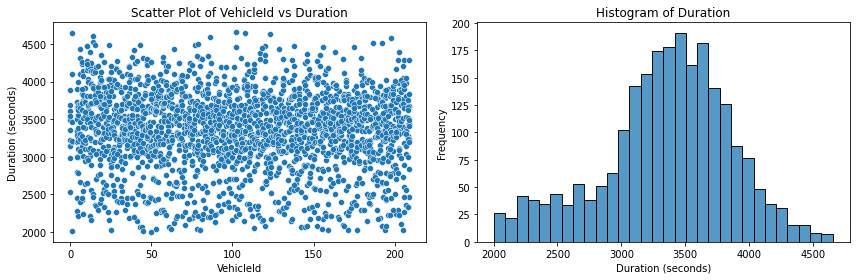

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1 - Scatter plot of VehicleId vs Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=onewaytime, x="VehicleId", y="duration", ax=ax1)
ax1.set_title('Scatter Plot of VehicleId vs Duration')
ax1.set_xlabel('VehicleId')
ax1.set_ylabel('Duration (seconds)')

# Subplot 2 - Histogram of Duration
sns.histplot(onewaytime['duration'], ax=ax2)
ax2.set_title('Histogram of Duration')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [64]:
onewaytime[onewaytime.VehicleId==10]

time stopname  VehicleId               time1 stopname1  \
0  2023-02-13 07:13:37        1         10 2023-02-13 08:12:44        34   
1  2023-02-13 09:16:41        1         10 2023-02-13 10:14:26        34   
2  2023-02-13 11:32:57        1         10 2023-02-13 12:42:12        34   
3  2023-02-13 13:38:09        1         10 2023-02-13 14:49:21        34   
4  2023-02-13 15:58:45        1         10 2023-02-13 17:13:17        34   
0  2023-02-13 06:21:36       34         10 2023-02-13 07:05:49         1   
1  2023-02-13 08:16:07       34         10 2023-02-13 09:14:26         1   
3  2023-02-13 10:18:39       34         10 2023-02-13 11:29:08         1   
5  2023-02-13 12:46:03       34         10 2023-02-13 13:35:47         1   
7  2023-02-13 14:52:23       34         10 2023-02-13 15:55:51         1   
10 2023-02-13 17:27:26       34         10 2023-02-13 18:41:54         1   

    VehicleId1  duration  shour  direction  
0         10.0    3547.0      7          0  
1         10.0    3465.0      9          0  
2         10.0    4155.0     11          0  
3         10.0    4272.0     13          0  
4         10.0    4472.0     15          0  
0         10.0    2653.0      6          1  
1         10.0    3499.0      8          1  
3         10.0    4229.0     10          1  
5         10.0    2984.0     12          1  
7         10.0    3808.0     14          1  
10        10.0    4468.0     17          1

# set the start and end times
start_time = pd.to_datetime('2023-02-18 00:00:00')
end_time = pd.to_datetime('2023-02-18 23:59:59')
# filter rows that are between the start and end times
filtered_df = BUS_GPS[(BUS_GPS['GPSDateTime'] >= start_time) & (BUS_GPS['GPSDateTime'] <= end_time)]
#& (data['VehicleId'] == 38)
filtered_df
from keplergl import KeplerGl

# Read GPS data from CSV file
df = BUS_GPS

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=filtered_df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

In [65]:
#when leaving service or entering service gps is kept on , so we need to get rid of them
dropindex=onewaytime[onewaytime.duration <= 1000]

dropindex

Empty DataFrame
Columns: [time, stopname, VehicleId, time1, stopname1, VehicleId1, duration, shour, direction]
Index: []

<AxesSubplot:>

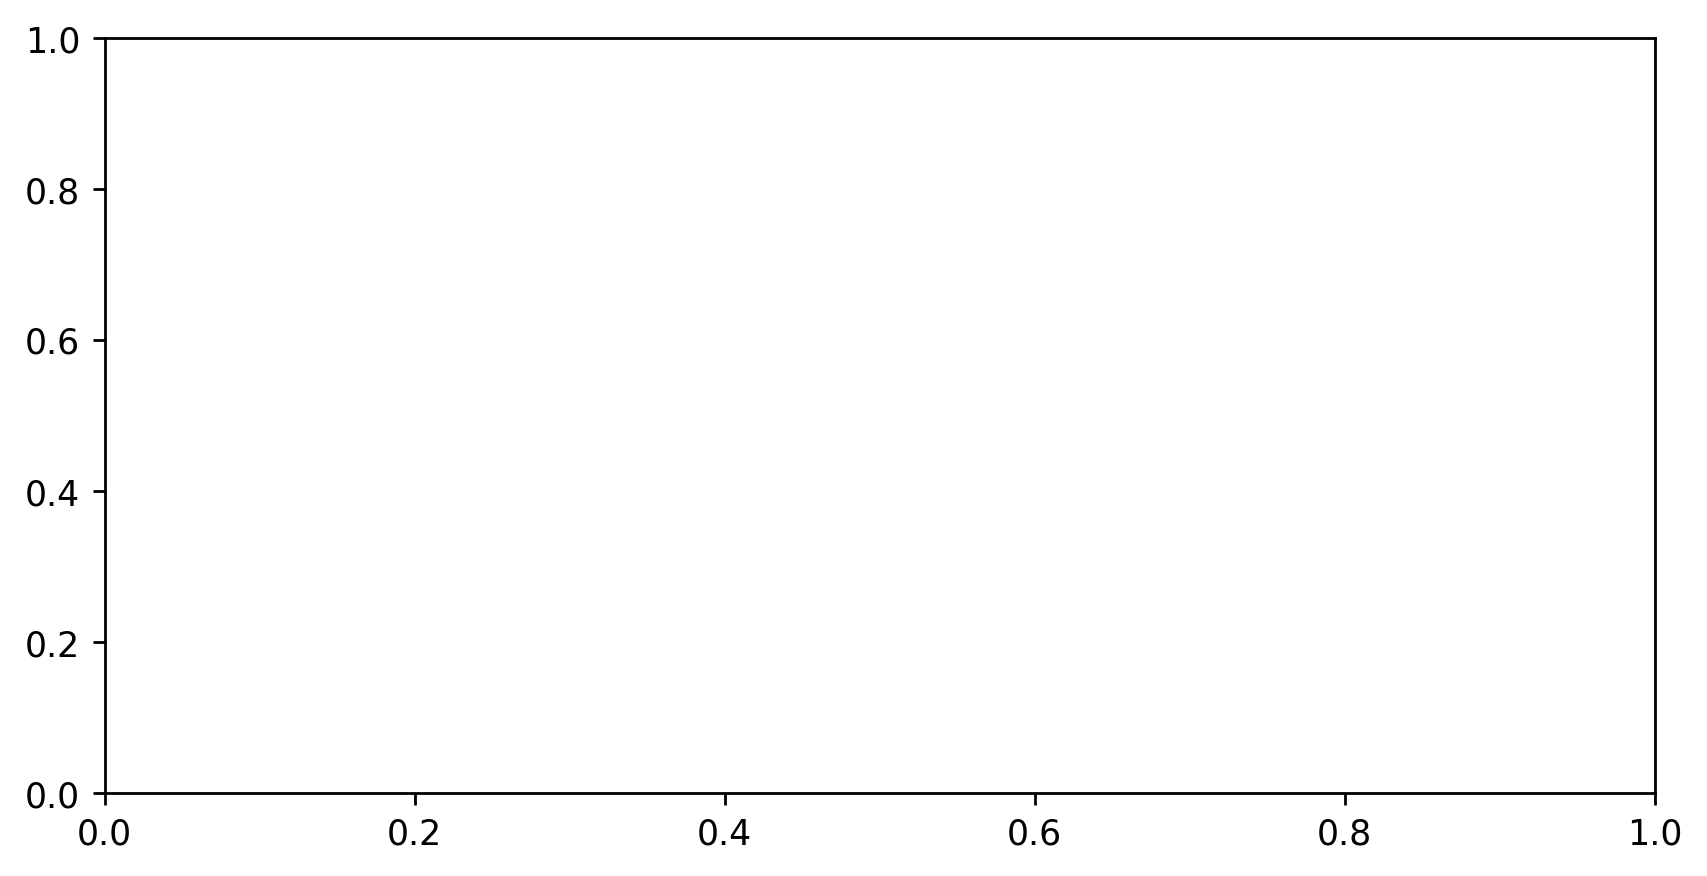

In [66]:
# plotting scatter plot for vehicleID vs TRAVELTIME for route 101
## Draw box plot for one-way travel time
import seaborn as sns
fig= plt.figure(1,(8,4),dpi = 250)
sns.scatterplot(data=dropindex, x="shour", y="duration")


In [67]:
droplist=[[d, a, v] for d, a,v in zip (dropindex["time"],dropindex["time1"],dropindex["VehicleId"])]
for i in droplist:
    data.drop(data.loc[(data['GPSDateTime'] >=pd.to_datetime(i[0])) & (data['GPSDateTime'] <= pd.to_datetime(i[1]))& (data['VehicleId'] == i[2])].index,inplace=True,axis=0)

<AxesSubplot:xlabel='duration'>

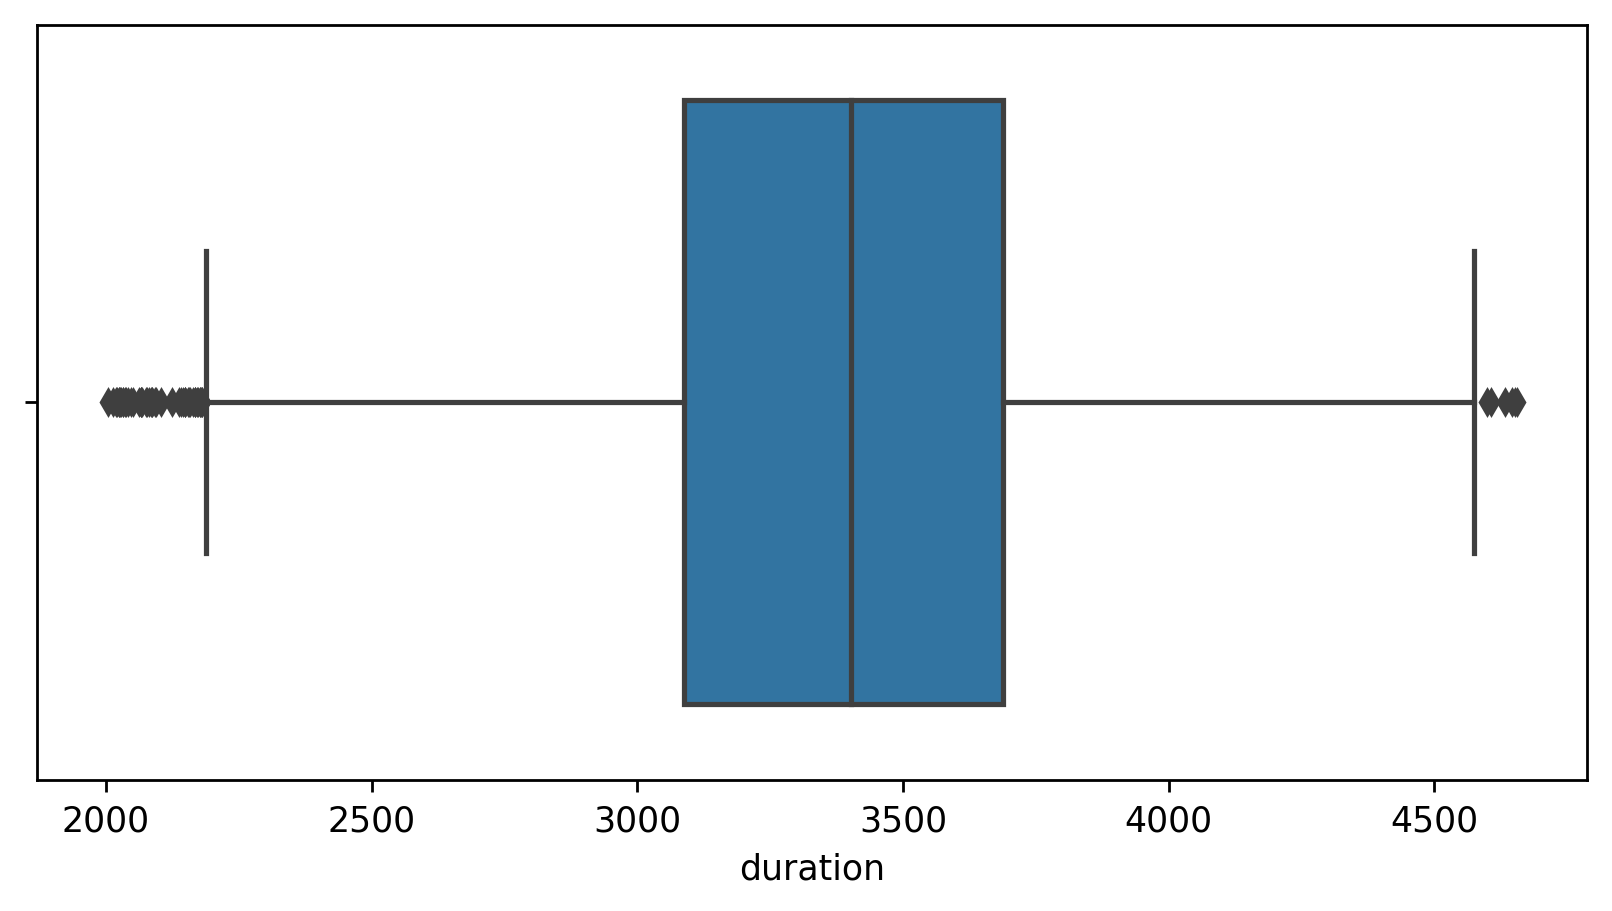

In [68]:
fig= plt.figure(1,(8,4),dpi = 250)
sns.boxplot(x=onewaytime['duration'])

In [69]:
q1 = onewaytime['duration'].quantile(0.25)
q3 = onewaytime['duration'].quantile(0.75)
iqr = q3 - q1

onewaytime = onewaytime[(onewaytime['duration'] > q1 - 1.5*iqr) & (onewaytime['duration'] < q3 + 1.5*iqr)]


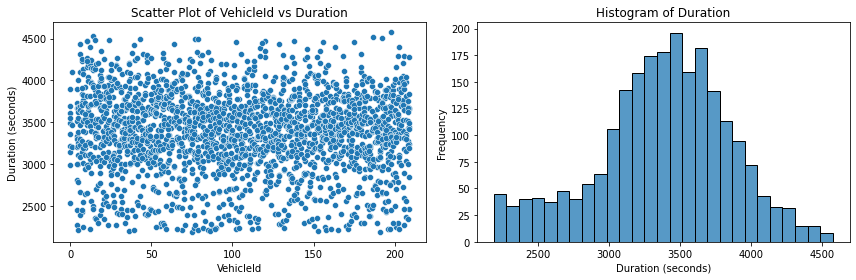

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1 - Scatter plot of VehicleId vs Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=onewaytime, x="VehicleId", y="duration", ax=ax1)
ax1.set_title('Scatter Plot of VehicleId vs Duration')
ax1.set_xlabel('VehicleId')
ax1.set_ylabel('Duration (seconds)')

# Subplot 2 - Histogram of Duration
sns.histplot(onewaytime['duration'], ax=ax2)
ax2.set_title('Histogram of Duration')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [71]:
# Select the row with the longest duration
longest_duration = onewaytime.nlargest(1, 'duration')

# Select the row with the shortest duration
shortest_duration = onewaytime.nsmallest(1, 'duration')


In [72]:
longest_duration

time stopname  VehicleId               time1 stopname1  \
8 2023-02-14 16:04:32        1        198 2023-02-14 17:20:47        34   

   VehicleId1  duration  shour  direction  
8       198.0    4575.0     16          0

In [73]:
shortest_duration

time stopname  VehicleId               time1 stopname1  \
0 2023-02-06 06:10:44        1        191 2023-02-06 06:47:12        34   

   VehicleId1  duration  shour  direction  
0       191.0    2188.0      6          0

In [74]:
# set the start and end times
start_time = pd.to_datetime('2023-02-18 00:00:00')
end_time = pd.to_datetime('2023-02-18 23:59:59')
# filter rows that are between the start and end times
filtered_df = data[(data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time)]
#& (data['VehicleId'] == 38)
#filtered_df

from keplergl import KeplerGl

# Read GPS data from CSV file
df = filtered_df

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

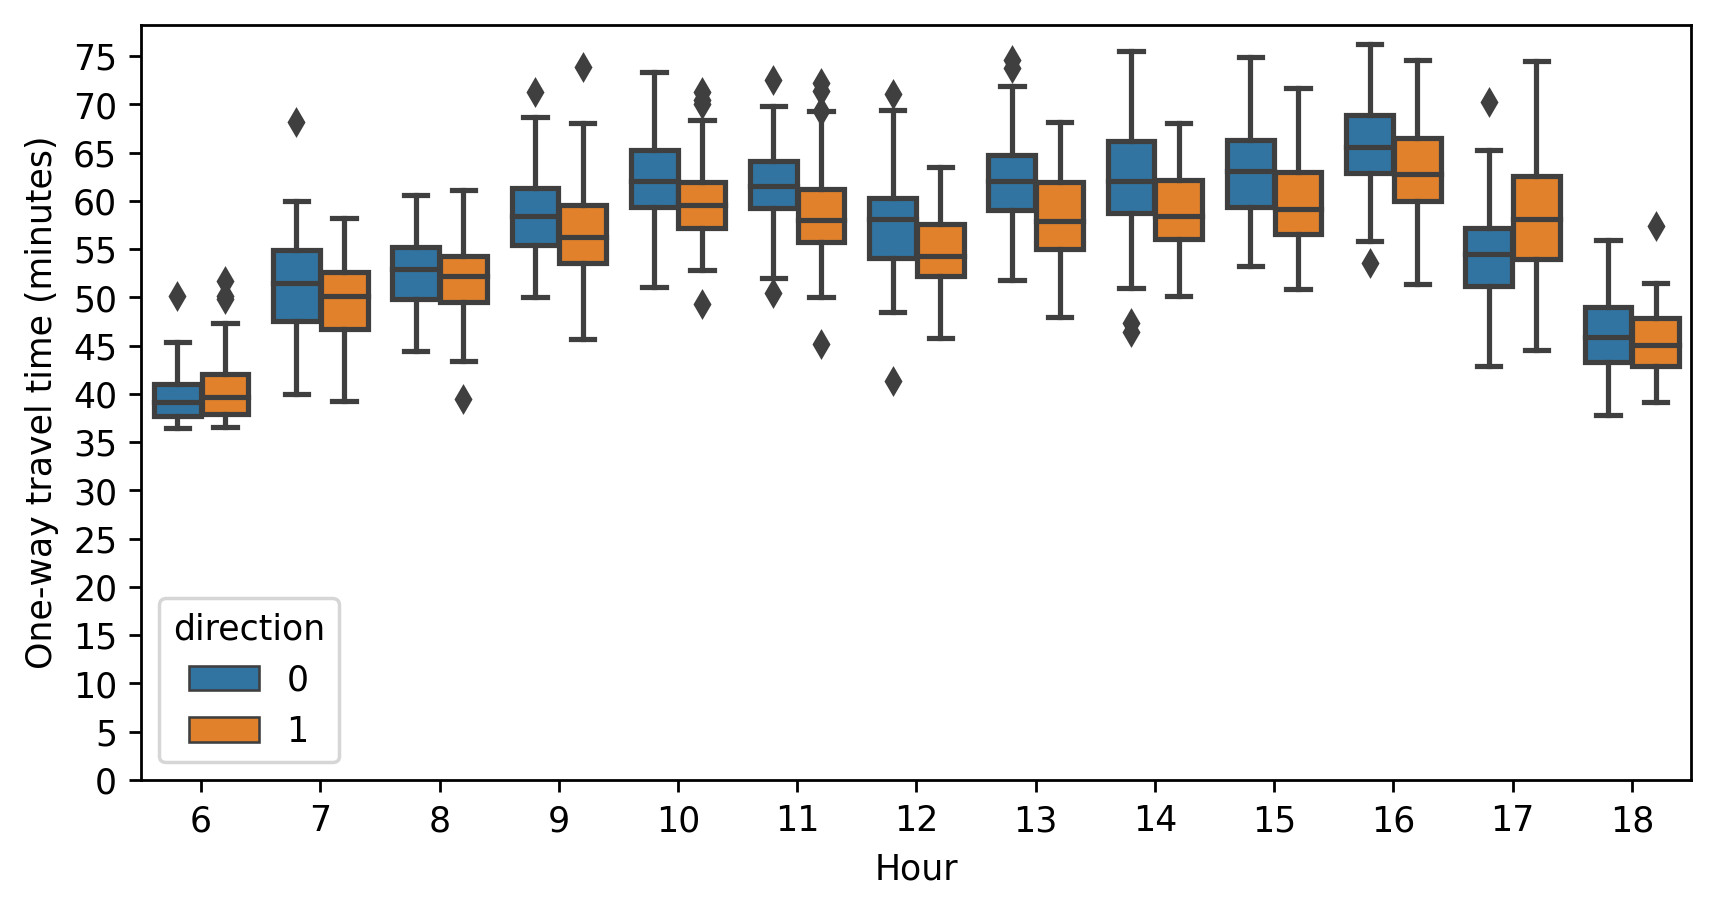

In [75]:
import matplotlib.ticker as ticker
fig = plt.figure(1, figsize=(8, 4), dpi=250)
ax1 = plt.subplot(111)

sns.boxplot(x='shour', y=onewaytime['duration']/60, hue='direction', data=onewaytime)

# Set y-axis tick locator to show every 5 minutes
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.ylim(0)
plt.show()

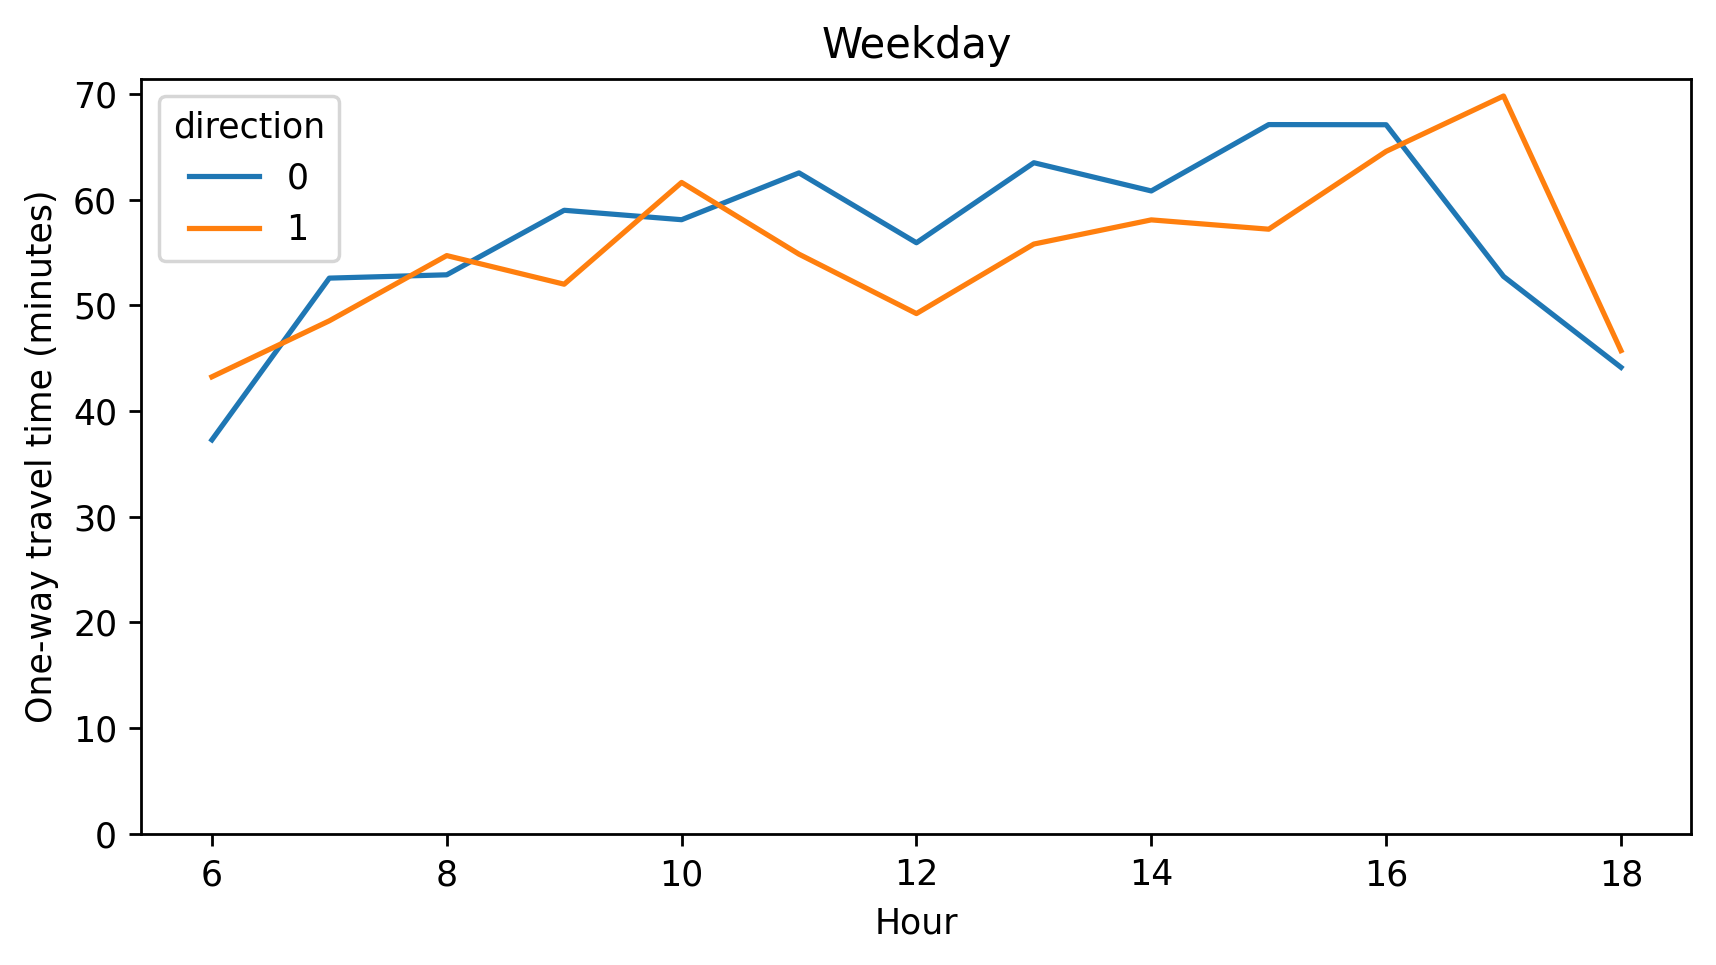

In [76]:
fig = plt.figure(1, (8, 4), dpi=250)
ax1 = plt.subplot(111)

onewaytime_feb18 = onewaytime[(onewaytime['time'] >= '2023-02-13 00:00:00') & (onewaytime['time'] < '2023-02-14 00:00:00')]

grouped_data = onewaytime_feb18.groupby(['shour', 'direction']).agg({'duration': 'mean'}).reset_index()

sns.lineplot(x='shour', y=grouped_data['duration'] / 60, hue='direction', data=grouped_data)

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.title("Weekday")
plt.ylim(0)
plt.show()


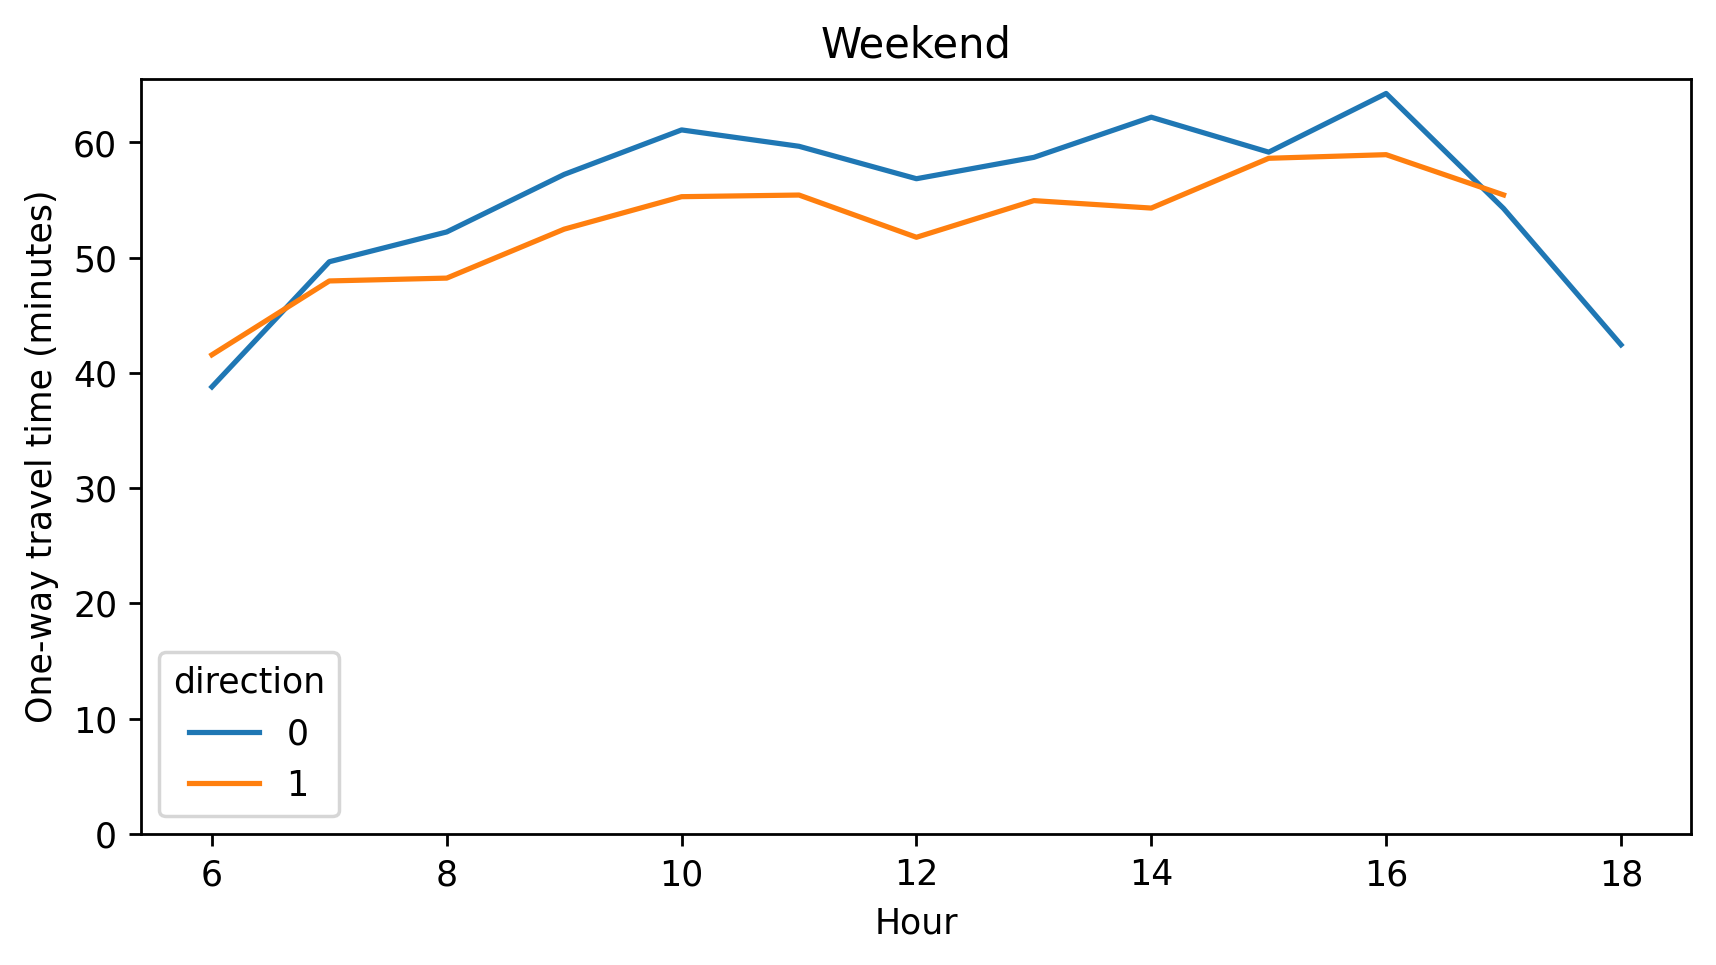

In [77]:
fig = plt.figure(1, (8, 4), dpi=250)
ax1 = plt.subplot(111)

onewaytime_feb18 = onewaytime[(onewaytime['time'] >= '2023-02-05 06:00:00') & (onewaytime['time'] < '2023-02-06 00:00:00')]

grouped_data = onewaytime_feb18.groupby(['shour', 'direction']).agg({'duration': 'mean'}).reset_index()

sns.lineplot(x='shour', y=grouped_data['duration'] / 60, hue='direction', data=grouped_data)

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.ylim(0)
plt.title("Weekend")
plt.show()


In [78]:
data['weekday'] = data['GPSDateTime'].dt.day_of_week

In [79]:
#apparently no data on friday, which is a weeknd 
data.weekday.unique()

array([2, 3, 6, 0, 1, 5])

In [80]:
onewaytime

time stopname  VehicleId               time1 stopname1  \
0  2023-02-01 07:19:18        1          0 2023-02-01 08:11:36        34   
2  2023-02-01 09:21:59        1          0 2023-02-01 10:18:00        34   
3  2023-02-01 11:37:42        1          0 2023-02-01 12:37:57        34   
4  2023-02-01 13:54:57        1          0 2023-02-01 14:53:08        34   
5  2023-02-01 16:29:15        1          0 2023-02-01 17:34:10        34   
..                 ...      ...        ...                 ...       ...   
0  2023-02-28 07:11:14       34        209 2023-02-28 07:58:37         1   
2  2023-02-28 09:15:15       34        209 2023-02-28 10:12:10         1   
4  2023-02-28 11:19:47       34        209 2023-02-28 12:31:11         1   
7  2023-02-28 13:38:30       34        209 2023-02-28 14:36:42         1   
8  2023-02-28 15:54:25       34        209 2023-02-28 16:47:37         1   

    VehicleId1  duration  shour  direction  
0          0.0    3138.0      7          0  
2          0.0    3361.0      9          0  
3          0.0    3615.0     11          0  
4          0.0    3491.0     13          0  
5          0.0    3895.0     16          0  
..         ...       ...    ...        ...  
0        209.0    2843.0      7          1  
2        209.0    3415.0      9          1  
4        209.0    4284.0     11          1  
7        209.0    3492.0     13          1  
8        209.0    3192.0     15          1  

[2265 rows x 9 columns]

In [81]:
onewaytimealler=onewaytime[onewaytime['direction']=="GR-LES TOURS 01"]
# convert time column to datetime format
onewaytimealler['time'] = pd.to_datetime(onewaytimealler['time'])

# sort dataframe by time
onewaytimealler = onewaytimealler.sort_values(by='time')

In [82]:

# calculate time difference between consecutive rows
onewaytimealler['timediff'] = onewaytimealler['time'].diff()

# calculate average time difference
avg_timediff = onewaytimealler['timediff'].mean()

print('Average time difference:', avg_timediff)


Average time difference: NaT


In [83]:
onewaytimeretour=onewaytime[onewaytime['direction']=="LES TOURS 01-GR"]
# convert time column to datetime format
onewaytimeretour['time'] = pd.to_datetime(onewaytimeretour['time'])

# sort dataframe by time
onewaytimeretour = onewaytimeretour.sort_values(by='time')


In [84]:

# calculate time difference between consecutive rows
onewaytimeretour['timediff'] = onewaytimeretour['time'].diff()

# calculate average time difference
avg_timediff = onewaytimeretour['timediff'].mean()

print('Average time difference:', avg_timediff)


Average time difference: NaT


In [85]:
onewaytimealler

Empty DataFrame
Columns: [time, stopname, VehicleId, time1, stopname1, VehicleId1, duration, shour, direction, timediff]
Index: []

In [86]:
onewaytimeretour

Empty DataFrame
Columns: [time, stopname, VehicleId, time1, stopname1, VehicleId1, duration, shour, direction, timediff]
Index: []

In [87]:

# filter the data for Feb 1
feb1_data = onewaytimeretour[(onewaytimeretour['time'] >= '2023-02-01 00:00:00') & (onewaytimeretour['time'] < '2023-02-02 00:00:00')]
feb1_data.shape



(0, 10)

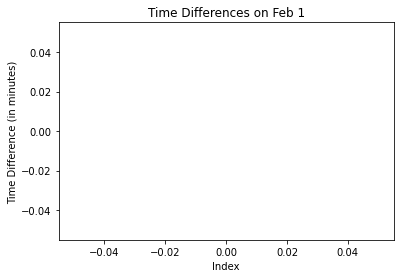

In [88]:
# plot the time differences
plt.plot(feb1_data['timediff'].astype('timedelta64[m]'))
plt.title('Time Differences on Feb 1')
plt.xlabel('Index')
plt.ylabel('Time Difference (in minutes)')
plt.show()

In [89]:
onewaytime['weekday'] = onewaytime['time'].dt.day_of_week
onewaytime['smin'] = onewaytime['time'].dt.minute
onewaytime['date'] = onewaytime['time'].dt.date
onewaytime['time'] = onewaytime['time'].dt.time
onewaytime['time1'] = onewaytime['time1'].dt.time


In [90]:
# Create categorical feature for time of day
onewaytime["time_of_day"] = pd.cut(onewaytime["shour"], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

In [91]:
onewaytime

time stopname  VehicleId     time1 stopname1  VehicleId1  duration  \
0   07:19:18        1          0  08:11:36        34         0.0    3138.0   
2   09:21:59        1          0  10:18:00        34         0.0    3361.0   
3   11:37:42        1          0  12:37:57        34         0.0    3615.0   
4   13:54:57        1          0  14:53:08        34         0.0    3491.0   
5   16:29:15        1          0  17:34:10        34         0.0    3895.0   
..       ...      ...        ...       ...       ...         ...       ...   
0   07:11:14       34        209  07:58:37         1       209.0    2843.0   
2   09:15:15       34        209  10:12:10         1       209.0    3415.0   
4   11:19:47       34        209  12:31:11         1       209.0    4284.0   
7   13:38:30       34        209  14:36:42         1       209.0    3492.0   
8   15:54:25       34        209  16:47:37         1       209.0    3192.0   

    shour  direction  weekday  smin        date time_of_day  
0       7          0        2    19  2023-02-01     Morning  
2       9          0        2    21  2023-02-01     Morning  
3      11          0        2    37  2023-02-01     Morning  
4      13          0        2    54  2023-02-01   Afternoon  
5      16          0        2    29  2023-02-01   Afternoon  
..    ...        ...      ...   ...         ...         ...  
0       7          1        1    11  2023-02-28     Morning  
2       9          1        1    15  2023-02-28     Morning  
4      11          1        1    19  2023-02-28     Morning  
7      13          1        1    38  2023-02-28   Afternoon  
8      15          1        1    54  2023-02-28   Afternoon  

[2265 rows x 13 columns]

<AxesSubplot:xlabel='time_of_day', ylabel='duration'>

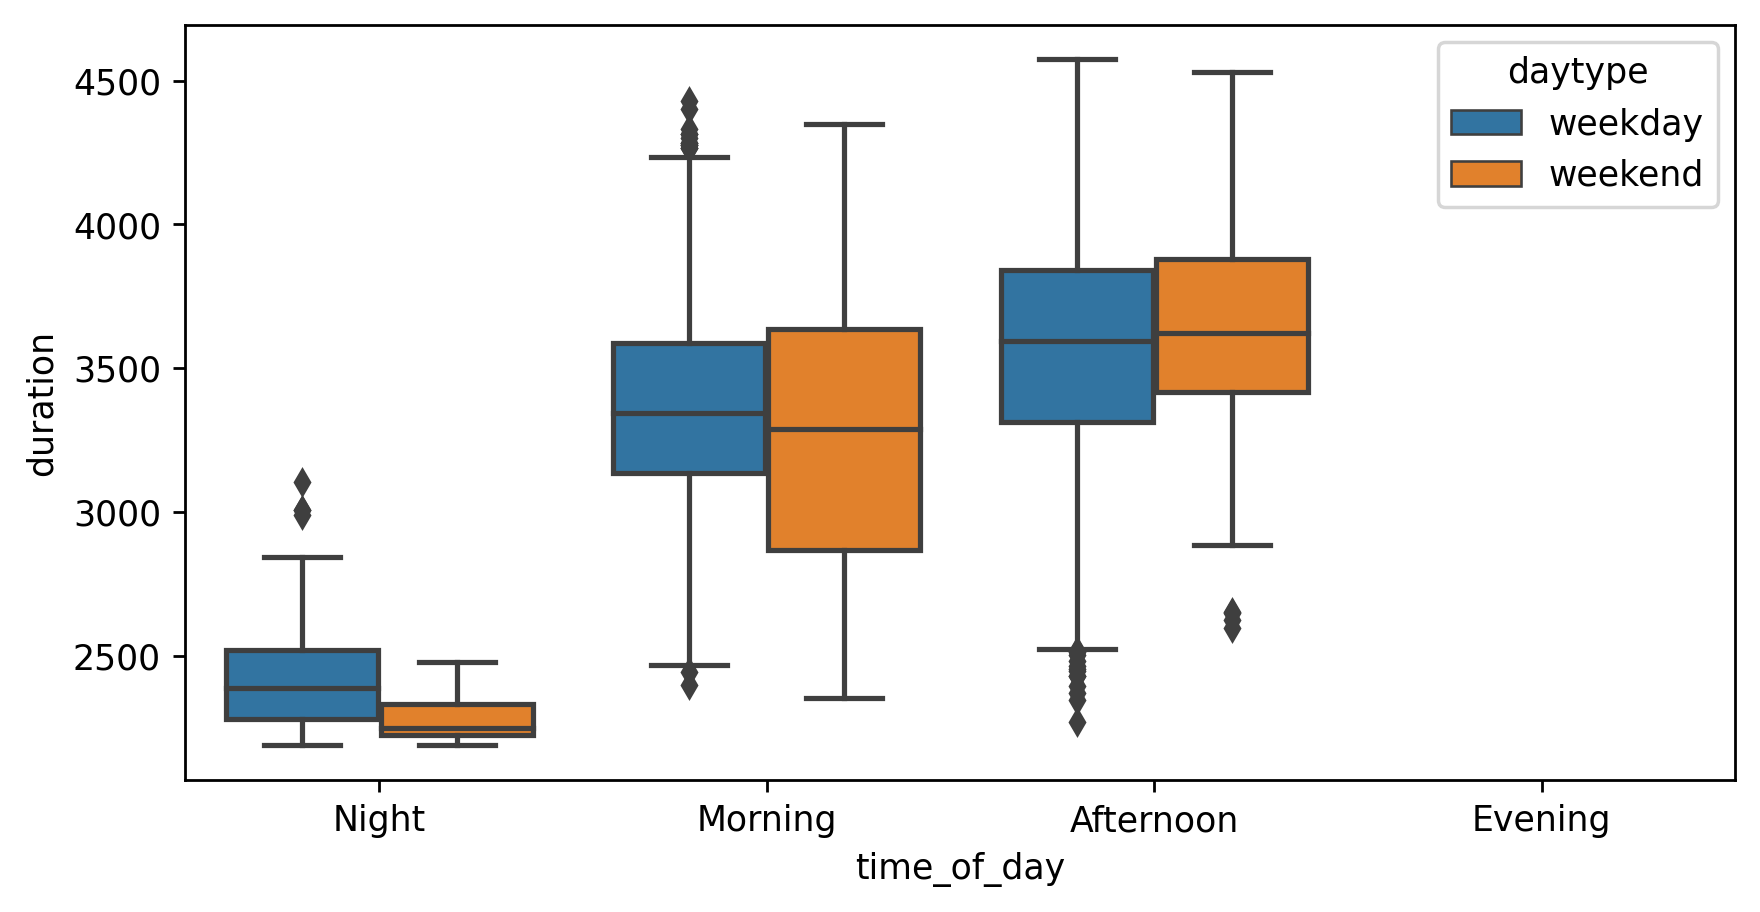

In [92]:
# Extract relevant columns and create new column for time of day
onewaytime["daytype"] = onewaytime["weekday"].apply(lambda x: 'weekend' if x in [4, 5] else 'weekday')
# Create boxplot
fig = plt.figure(1, (8, 4), dpi=250)
sns.boxplot(x="time_of_day", y="duration", hue="daytype", data=onewaytime)


In [93]:
data

VehicleId         GPSDateTime        lat       lon     ID  Speed  \
0                0 2023-02-01 06:27:10  36.183713  5.444493  19001  35.1    
8                0 2023-02-01 06:27:20  36.184214  5.443844  19001  25.1    
87               0 2023-02-01 06:27:26  36.184477  5.443635  19001  15.7    
88               0 2023-02-01 06:27:30  36.184616  5.443572  19001  14.9    
128              0 2023-02-01 06:27:40  36.184968  5.443344  19001   7.3    
...            ...                 ...        ...       ...    ...    ...   
991339         209 2023-02-28 19:00:30  36.178908  5.400911  19004  23.8    
991565         209 2023-02-28 19:00:40  36.178796  5.401252  19004   7.3    
991566         209 2023-02-28 19:00:45  36.178756  5.401276  19004   5.1    
1069395        209 2023-02-28 19:00:50  36.178597  5.401218  19004  22.5    
1069896        209 2023-02-28 19:01:00  36.177806  5.400773  19004  40.2    

        motion DistanceGap totaldistance                           geometry  \
0         true      100.53     744768.63  POINT (34514611.163 13295096.833)   
8         true       80.72     744849.35  POINT (34514728.461 13295115.014)   
87        true       34.77     744884.12  POINT (34514779.354 13295110.665)   
88        true       16.51     744900.63  POINT (34514802.504 13295103.478)   
128       true        44.2     744944.83  POINT (34514866.421 13295092.219)   
...        ...         ...           ...                                ...   
991339    true      103.05    5123558.53  POINT (34517511.836 13300145.223)   
991565    true       33.11    5123591.64  POINT (34517469.798 13300120.540)   
991566    true        4.95    5123596.59  POINT (34517462.693 13300122.066)   
1069395   true       18.48    5123615.07  POINT (34517446.761 13300144.000)   
1069896   true       96.69    5123711.76  POINT (34517380.572 13300269.525)   

              project    time_st  weekday  
0        16968.544102     1647.0        2  
8        16968.544102     1657.0        2  
87       16968.544102     1663.0        2  
88       16960.894524     1667.0        2  
128      16896.004273     1677.0        2  
...               ...        ...      ...  
991339    2303.365955  2379647.0        1  
991565    2350.147489  2379657.0        1  
991566    2353.904264  2379662.0        1  
1069395   2348.843373  2379667.0        1  
1069896   2302.759875  2379677.0        1  

[1070077 rows x 13 columns]

# Read GPS data from CSV file
df = data

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

start_time = '2023-02-05 07:20:26'
end_time = '2023-02-05 08:06:51'
df_period = df[(df['GPSDateTime'] >= start_time) & (df['GPSDateTime'] <= end_time) & (data['VehicleId'] == 0)]

# Read GPS data from CSV file
df = df_period

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

df=data
df['Speed'] = df['Speed'].astype(float)
# filter rows where speed is less than 5
stops = df[(df['Speed'] <5.0) & (df['GPSDateTime'].between('2023-02-05 07:20:26', '2023-02-05 08:06:51'))]

# calculate time differences between consecutive rows
time_diff = stops['GPSDateTime'].diff()

# identify stops that last longer than 5 minutes
long_stops = stops[time_diff > pd.Timedelta(seconds= 60)]

# calculate total stop time
stop_time = long_stops['GPSDateTime'].diff().sum()

print(f"Total stop time where speed is less than 2: {stop_time}")


In [94]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1070077 entries, 0 to 1069896
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   VehicleId      1070077 non-null  int64         
 1   GPSDateTime    1070077 non-null  datetime64[ns]
 2   lat            1070077 non-null  float64       
 3   lon            1070077 non-null  float64       
 4   ID             1070077 non-null  int64         
 5   Speed          1070077 non-null  object        
 6   motion         1070077 non-null  object        
 7   DistanceGap    1070077 non-null  object        
 8   totaldistance  1070077 non-null  object        
 9   geometry       1070077 non-null  geometry      
 10  project        1070077 non-null  float64       
 11  time_st        1070077 non-null  float64       
 12  weekday        1070077 non-null  int64         
dtypes: datetime64[ns](1), float64(4), geometry(1), int64(3), object(4)
memory usage

Text(0, 0.5, 'Average Speed (km/h)')

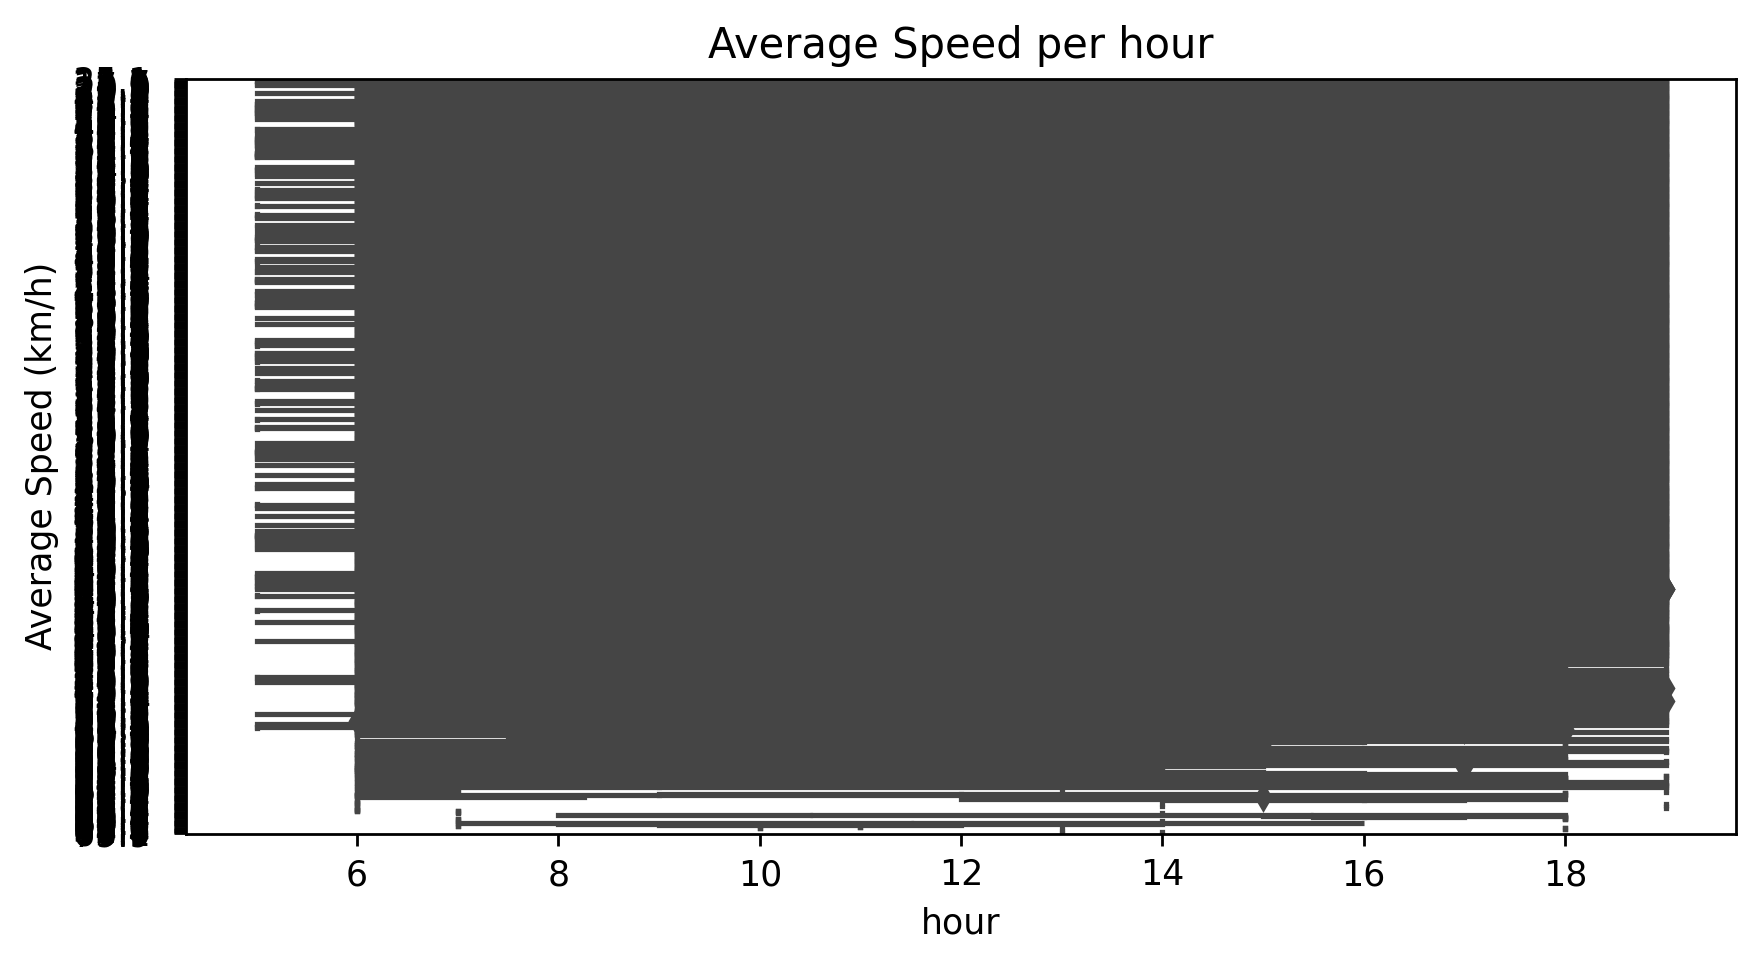

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the Speed column contains the speed values

# Add a new column 'day' to the dataframe to store the day of the week
data['hour'] = data['GPSDateTime'].dt.hour
fig = plt.figure(1, (8, 4), dpi=250)
# Create a boxplot using Seaborn
sns.boxplot(x='hour', y='Speed', data=data)

# Set the plot title and labels
plt.title('Average Speed per hour')
plt.xlabel('hour')
plt.ylabel('Average Speed (km/h)')

# Show the plot
#plt.show()


In [96]:

# Set the start and end times
start_time = pd.Timestamp('2023-02-05 07:20:00')
end_time = pd.Timestamp('2023-02-05 08:06:50')
# Filter the data to include only the rows between start_time and end_time
mask = (data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time  )
df_filtered = data.loc[mask]
fig = plt.figure(1, (8, 4), dpi=250)
# Plot the speed against time for each vehicle
unique_vehicles = df_filtered['VehicleId'].unique()
for vehicle_id in unique_vehicles:
    if vehicle_id==0:
        vehicle_data = df_filtered[df_filtered['VehicleId'] == vehicle_id]
        plt.plot(vehicle_data['GPSDateTime'], vehicle_data['Speed'], label='Vehicle {}'.format(vehicle_id))



<Figure size 2000x1000 with 0 Axes>

In [97]:
onewaytime

time stopname  VehicleId     time1 stopname1  VehicleId1  duration  \
0   07:19:18        1          0  08:11:36        34         0.0    3138.0   
2   09:21:59        1          0  10:18:00        34         0.0    3361.0   
3   11:37:42        1          0  12:37:57        34         0.0    3615.0   
4   13:54:57        1          0  14:53:08        34         0.0    3491.0   
5   16:29:15        1          0  17:34:10        34         0.0    3895.0   
..       ...      ...        ...       ...       ...         ...       ...   
0   07:11:14       34        209  07:58:37         1       209.0    2843.0   
2   09:15:15       34        209  10:12:10         1       209.0    3415.0   
4   11:19:47       34        209  12:31:11         1       209.0    4284.0   
7   13:38:30       34        209  14:36:42         1       209.0    3492.0   
8   15:54:25       34        209  16:47:37         1       209.0    3192.0   

    shour  direction  weekday  smin        date time_of_day  daytype  
0       7          0        2    19  2023-02-01     Morning  weekday  
2       9          0        2    21  2023-02-01     Morning  weekday  
3      11          0        2    37  2023-02-01     Morning  weekday  
4      13          0        2    54  2023-02-01   Afternoon  weekday  
5      16          0        2    29  2023-02-01   Afternoon  weekday  
..    ...        ...      ...   ...         ...         ...      ...  
0       7          1        1    11  2023-02-28     Morning  weekday  
2       9          1        1    15  2023-02-28     Morning  weekday  
4      11          1        1    19  2023-02-28     Morning  weekday  
7      13          1        1    38  2023-02-28   Afternoon  weekday  
8      15          1        1    54  2023-02-28   Afternoon  weekday  

[2265 rows x 14 columns]

In [98]:
onewaytime.to_csv("../data/processed/onewaytime.csv")

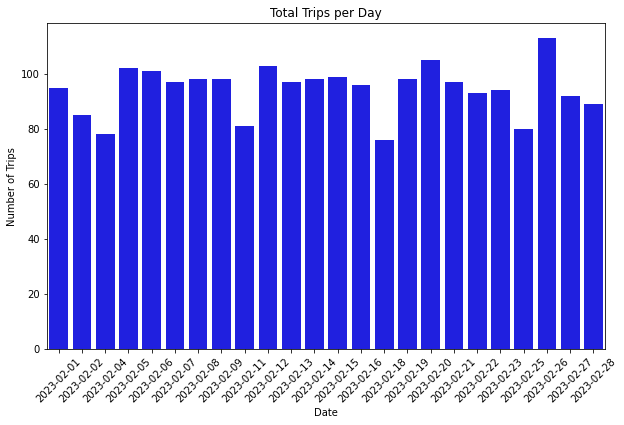

In [99]:

dftrips=onewaytime
# Group the dataframe by date and count the number of trips for each date
trips_per_day = dftrips.groupby('date')['time'].count()

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_day.index, y=trips_per_day.values, color='blue')
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


In [100]:
onewaytime.weekday.unique()

array([2, 3, 6, 0, 1, 5])

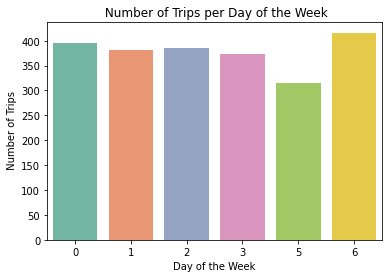

In [101]:

# Group the data by day of the week and calculate the mean number of trips
trips_per_day = dftrips.groupby('weekday')['VehicleId'].count().reset_index(name='trips_mean')

# Plot a bar chart
sns.barplot(x='weekday', y='trips_mean', data=trips_per_day, palette='Set2')
plt.title(' Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel(' Number of Trips')
plt.show()


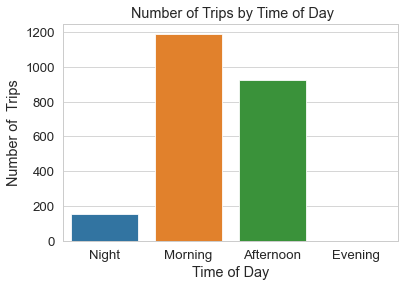

In [102]:
# Group the data by time of day and calculate the average number of trips
avg_trips = dftrips.groupby('time_of_day')['VehicleId'].count().reset_index()
avg_trips = avg_trips.rename(columns={'VehicleId': 'Average Trips'})

# Set the style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

# Create the bar plot
sns.barplot(x='time_of_day', y='Average Trips', data=avg_trips)

# Set the axis labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of  Trips')
plt.title(' Number of Trips by Time of Day')

# Show the plot
plt.show()


In [103]:
dftrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 0 to 8
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   time         2265 non-null   object  
 1   stopname     2265 non-null   object  
 2   VehicleId    2265 non-null   int64   
 3   time1        2265 non-null   object  
 4   stopname1    2265 non-null   object  
 5   VehicleId1   2265 non-null   float64 
 6   duration     2265 non-null   float64 
 7   shour        2265 non-null   int64   
 8   direction    2265 non-null   int64   
 9   weekday      2265 non-null   int64   
 10  smin         2265 non-null   int64   
 11  date         2265 non-null   object  
 12  time_of_day  2265 non-null   category
 13  daytype      2265 non-null   object  
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 250.1+ KB


Text(0, 0.5, 'Number of buses')

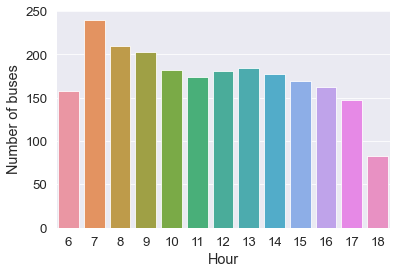

In [104]:
# set seaborn style
sns.set_style('darkgrid')

# group data by hour and count the number of occurrences
df_hourly = dftrips.groupby('shour')['shour'].count()

# create barplot
sns.barplot(x=df_hourly.index, y=df_hourly.values)
plt.xlabel('Hour')
plt.ylabel('Number of buses')


(553, 14)


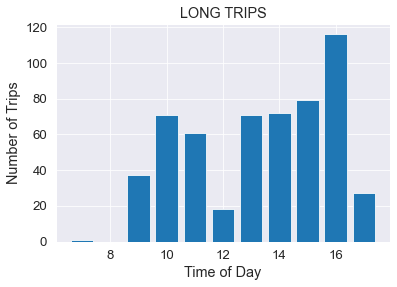

In [105]:

# filter the data to include only trips with duration greater than 3800
long_trips = onewaytime[onewaytime['duration'] > 3700]
print(long_trips.shape)
# group the data by time of day and count the number of trips in each group
trips_by_time = long_trips.groupby('shour')['duration'].count()

# plot a bar chart of the number of trips for each time of day
fig, ax = plt.subplots()
ax.bar(trips_by_time.index, trips_by_time.values)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Trips')
ax.set_title('LONG TRIPS')
plt.show()


In [106]:
# Convert the time component to a float
onewaytime['time'] = onewaytime['time'].apply(lambda x: float(x.strftime('%H.%M%S')))
onewaytime['time1'] = onewaytime['time1'].apply(lambda x: float(x.strftime('%H.%M%S')))


In [107]:
onewaytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 0 to 8
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   time         2265 non-null   float64 
 1   stopname     2265 non-null   object  
 2   VehicleId    2265 non-null   int64   
 3   time1        2265 non-null   float64 
 4   stopname1    2265 non-null   object  
 5   VehicleId1   2265 non-null   float64 
 6   duration     2265 non-null   float64 
 7   shour        2265 non-null   int64   
 8   direction    2265 non-null   int64   
 9   weekday      2265 non-null   int64   
 10  smin         2265 non-null   int64   
 11  date         2265 non-null   object  
 12  time_of_day  2265 non-null   category
 13  daytype      2265 non-null   object  
dtypes: category(1), float64(4), int64(5), object(4)
memory usage: 250.1+ KB


In [108]:
onewaytime['shour1'] = onewaytime['shour']+1
onewaytime["date"]=pd.to_datetime(onewaytime["date"])
onewaytime.tail()


time stopname  VehicleId    time1 stopname1  VehicleId1  duration  \
0   7.1114       34        209   7.5837         1       209.0    2843.0   
2   9.1515       34        209  10.1210         1       209.0    3415.0   
4  11.1947       34        209  12.3111         1       209.0    4284.0   
7  13.3830       34        209  14.3642         1       209.0    3492.0   
8  15.5425       34        209  16.4737         1       209.0    3192.0   

   shour  direction  weekday  smin       date time_of_day  daytype  shour1  
0      7          1        1    11 2023-02-28     Morning  weekday       8  
2      9          1        1    15 2023-02-28     Morning  weekday      10  
4     11          1        1    19 2023-02-28     Morning  weekday      12  
7     13          1        1    38 2023-02-28   Afternoon  weekday      14  
8     15          1        1    54 2023-02-28   Afternoon  weekday      16

In [109]:
weather=pd.read_csv("../data/processed/weather.csv",index_col=0)
weather = weather.drop(weather.columns[0], axis=1)
weather

date  temp  feelslike  dew  humidity  precip  precipprob  \
0     2023-02-01T00:00:00  -1.8       -3.9 -2.9     92.52     0.0           0   
1     2023-02-01T01:00:00  -1.8       -3.9 -2.1     97.51     0.0           0   
2     2023-02-01T02:00:00   0.1       -2.4 -1.9     86.16     0.0           0   
3     2023-02-01T03:00:00  -2.8       -5.9 -2.9     99.46     0.0           0   
4     2023-02-01T04:00:00  -0.7       -3.4 -1.1     97.06     0.0           0   
...                   ...   ...        ...  ...       ...     ...         ...   
1387  2023-03-30T19:00:00  20.0       20.0 -1.9     22.74     0.0           0   
1388  2023-03-30T20:00:00  18.0       18.0 -2.0     25.62     0.0           0   
1389  2023-03-30T21:00:00  15.0       15.0  0.0     35.89     0.0           0   
1390  2023-03-30T22:00:00  12.8       12.8 -1.0     38.50     0.0           0   
1391  2023-03-30T23:00:00  12.0       12.0  0.0     43.64     0.0           0   

      snow  snowdepth  windgust  winddir  windspeed  cloudcover  \
0        0        0.0       7.2      8.0        5.5        50.0   
1        0        0.0       6.1    347.0        5.6        60.3   
2        0        0.0       4.7      9.0        7.6        43.7   
3        0        0.0       6.1      9.0        7.6        43.7   
4        0        0.0       6.1    348.0        7.5         1.5   
...    ...        ...       ...      ...        ...         ...   
1387     0        0.0       5.8     41.0        7.6        50.4   
1388     0        0.0       5.4    300.0        7.6        64.1   
1389     0        0.0       6.1     10.0        5.4        17.2   
1390     0        0.0       6.1    358.0        3.6        39.8   
1391     0        0.0       5.8     20.0        7.6         0.0   

            conditions                 icon  
0     Partially cloudy  partly-cloudy-night  
1     Partially cloudy  partly-cloudy-night  
2     Partially cloudy  partly-cloudy-night  
3     Partially cloudy  partly-cloudy-night  
4                Clear          clear-night  
...                ...                  ...  
1387  Partially cloudy  partly-cloudy-night  
1388  Partially cloudy  partly-cloudy-night  
1389             Clear          clear-night  
1390  Partially cloudy  partly-cloudy-night  
1391             Clear          clear-night  

[1392 rows x 15 columns]

In [110]:
weather["date"]=pd.to_datetime(weather["date"])
weather['shour'] = weather['date'].dt.hour
weather

date  temp  feelslike  dew  humidity  precip  precipprob  \
0    2023-02-01 00:00:00  -1.8       -3.9 -2.9     92.52     0.0           0   
1    2023-02-01 01:00:00  -1.8       -3.9 -2.1     97.51     0.0           0   
2    2023-02-01 02:00:00   0.1       -2.4 -1.9     86.16     0.0           0   
3    2023-02-01 03:00:00  -2.8       -5.9 -2.9     99.46     0.0           0   
4    2023-02-01 04:00:00  -0.7       -3.4 -1.1     97.06     0.0           0   
...                  ...   ...        ...  ...       ...     ...         ...   
1387 2023-03-30 19:00:00  20.0       20.0 -1.9     22.74     0.0           0   
1388 2023-03-30 20:00:00  18.0       18.0 -2.0     25.62     0.0           0   
1389 2023-03-30 21:00:00  15.0       15.0  0.0     35.89     0.0           0   
1390 2023-03-30 22:00:00  12.8       12.8 -1.0     38.50     0.0           0   
1391 2023-03-30 23:00:00  12.0       12.0  0.0     43.64     0.0           0   

      snow  snowdepth  windgust  winddir  windspeed  cloudcover  \
0        0        0.0       7.2      8.0        5.5        50.0   
1        0        0.0       6.1    347.0        5.6        60.3   
2        0        0.0       4.7      9.0        7.6        43.7   
3        0        0.0       6.1      9.0        7.6        43.7   
4        0        0.0       6.1    348.0        7.5         1.5   
...    ...        ...       ...      ...        ...         ...   
1387     0        0.0       5.8     41.0        7.6        50.4   
1388     0        0.0       5.4    300.0        7.6        64.1   
1389     0        0.0       6.1     10.0        5.4        17.2   
1390     0        0.0       6.1    358.0        3.6        39.8   
1391     0        0.0       5.8     20.0        7.6         0.0   

            conditions                 icon  shour  
0     Partially cloudy  partly-cloudy-night      0  
1     Partially cloudy  partly-cloudy-night      1  
2     Partially cloudy  partly-cloudy-night      2  
3     Partially cloudy  partly-cloudy-night      3  
4                Clear          clear-night      4  
...                ...                  ...    ...  
1387  Partially cloudy  partly-cloudy-night     19  
1388  Partially cloudy  partly-cloudy-night     20  
1389             Clear          clear-night     21  
1390  Partially cloudy  partly-cloudy-night     22  
1391             Clear          clear-night     23  

[1392 rows x 16 columns]

In [111]:
weather["date"]=pd.to_datetime(weather["date"]).dt.date
weather["date"]=pd.to_datetime(weather["date"])
weather.tail()

date  temp  feelslike  dew  humidity  precip  precipprob  snow  \
1387 2023-03-30  20.0       20.0 -1.9     22.74     0.0           0     0   
1388 2023-03-30  18.0       18.0 -2.0     25.62     0.0           0     0   
1389 2023-03-30  15.0       15.0  0.0     35.89     0.0           0     0   
1390 2023-03-30  12.8       12.8 -1.0     38.50     0.0           0     0   
1391 2023-03-30  12.0       12.0  0.0     43.64     0.0           0     0   

      snowdepth  windgust  winddir  windspeed  cloudcover        conditions  \
1387        0.0       5.8     41.0        7.6        50.4  Partially cloudy   
1388        0.0       5.4    300.0        7.6        64.1  Partially cloudy   
1389        0.0       6.1     10.0        5.4        17.2             Clear   
1390        0.0       6.1    358.0        3.6        39.8  Partially cloudy   
1391        0.0       5.8     20.0        7.6         0.0             Clear   

                     icon  shour  
1387  partly-cloudy-night     19  
1388  partly-cloudy-night     20  
1389          clear-night     21  
1390  partly-cloudy-night     22  
1391          clear-night     23

In [112]:
# merging  data with weather data (merge on date and hour)
onewaytime = pd.merge(onewaytime,weather, on=['date','shour'])
onewaytime

time stopname  VehicleId    time1 stopname1  VehicleId1  duration  \
0      7.1918        1          0   8.1136        34         0.0    3138.0   
1      7.3134        1         23   8.2359        34        23.0    3145.0   
2      7.0941        1         67   7.5650        34        67.0    2829.0   
3      7.4900        1        151   8.4329        34       151.0    3269.0   
4      7.4003        1        187   8.3023        34       187.0    3020.0   
...       ...      ...        ...      ...       ...         ...       ...   
2260   6.4036        1        206   7.1826        34       206.0    2270.0   
2261   6.3310       34        110   7.1249         1       110.0    2379.0   
2262   6.1511       34        132   6.5226         1       132.0    2235.0   
2263  18.1522        1        177  18.5930        34       177.0    2648.0   
2264  18.0017       34        197  18.4600         1       197.0    2743.0   

      shour  direction  weekday  smin       date time_of_day  daytype  shour1  \
0         7          0        2    19 2023-02-01     Morning  weekday       8   
1         7          0        2    31 2023-02-01     Morning  weekday       8   
2         7          0        2     9 2023-02-01     Morning  weekday       8   
3         7          0        2    49 2023-02-01     Morning  weekday       8   
4         7          0        2    40 2023-02-01     Morning  weekday       8   
...     ...        ...      ...   ...        ...         ...      ...     ...   
2260      6          0        5    40 2023-02-25       Night  weekend       7   
2261      6          1        5    33 2023-02-25       Night  weekend       7   
2262      6          1        5    15 2023-02-25       Night  weekend       7   
2263     18          0        0    15 2023-02-13   Afternoon  weekday      19   
2264     18          1        0     0 2023-02-13   Afternoon  weekday      19   

      temp  feelslike  dew  humidity  precip  precipprob  snow  snowdepth  \
0     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
1     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
2     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
3     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
4     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
...    ...        ...  ...       ...     ...         ...   ...        ...   
2260   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2261   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2262   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2263   9.1        7.6 -5.8     34.48     0.0           0     0        0.0   
2264   9.1        7.6 -5.8     34.48     0.0           0     0        0.0   

      windgust  winddir  windspeed  cloudcover        conditions  \
0          2.5    250.0        3.8        63.6  Partially cloudy   
1          2.5    250.0        3.8        63.6  Partially cloudy   
2          2.5    250.0        3.8        63.6  Partially cloudy   
3          2.5    250.0        3.8        63.6  Partially cloudy   
4          2.5    250.0        3.8        63.6  Partially cloudy   
...        ...      ...        ...         ...               ...   
2260      14.0    280.0       13.1        88.9  Partially cloudy   
2261      14.0    280.0       13.1        88.9  Partially cloudy   
2262      14.0    280.0       13.1        88.9  Partially cloudy   
2263      21.2     41.0        9.3         0.0             Clear   
2264      21.2     41.0        9.3         0.0             Clear   

                     icon  
0     partly-cloudy-night  
1     partly-cloudy-night  
2     partly-cloudy-night  
3     partly-cloudy-night  
4     partly-cloudy-night  
...                   ...  
2260  partly-cloudy-night  
2261  partly-cloudy-night  
2262  partly-cloudy-night  
2263            clear-day  
2264            clear-day  

[2265 rows x 29 colu

In [113]:
onewaytime

time stopname  VehicleId    time1 stopname1  VehicleId1  duration  \
0      7.1918        1          0   8.1136        34         0.0    3138.0   
1      7.3134        1         23   8.2359        34        23.0    3145.0   
2      7.0941        1         67   7.5650        34        67.0    2829.0   
3      7.4900        1        151   8.4329        34       151.0    3269.0   
4      7.4003        1        187   8.3023        34       187.0    3020.0   
...       ...      ...        ...      ...       ...         ...       ...   
2260   6.4036        1        206   7.1826        34       206.0    2270.0   
2261   6.3310       34        110   7.1249         1       110.0    2379.0   
2262   6.1511       34        132   6.5226         1       132.0    2235.0   
2263  18.1522        1        177  18.5930        34       177.0    2648.0   
2264  18.0017       34        197  18.4600         1       197.0    2743.0   

      shour  direction  weekday  smin       date time_of_day  daytype  shour1  \
0         7          0        2    19 2023-02-01     Morning  weekday       8   
1         7          0        2    31 2023-02-01     Morning  weekday       8   
2         7          0        2     9 2023-02-01     Morning  weekday       8   
3         7          0        2    49 2023-02-01     Morning  weekday       8   
4         7          0        2    40 2023-02-01     Morning  weekday       8   
...     ...        ...      ...   ...        ...         ...      ...     ...   
2260      6          0        5    40 2023-02-25       Night  weekend       7   
2261      6          1        5    33 2023-02-25       Night  weekend       7   
2262      6          1        5    15 2023-02-25       Night  weekend       7   
2263     18          0        0    15 2023-02-13   Afternoon  weekday      19   
2264     18          1        0     0 2023-02-13   Afternoon  weekday      19   

      temp  feelslike  dew  humidity  precip  precipprob  snow  snowdepth  \
0     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
1     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
2     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
3     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
4     -1.9       -1.9 -2.1     98.47     0.0           0     0        0.0   
...    ...        ...  ...       ...     ...         ...   ...        ...   
2260   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2261   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2262   7.1        4.7  4.1     80.87     0.0           0     0        0.0   
2263   9.1        7.6 -5.8     34.48     0.0           0     0        0.0   
2264   9.1        7.6 -5.8     34.48     0.0           0     0        0.0   

      windgust  winddir  windspeed  cloudcover        conditions  \
0          2.5    250.0        3.8        63.6  Partially cloudy   
1          2.5    250.0        3.8        63.6  Partially cloudy   
2          2.5    250.0        3.8        63.6  Partially cloudy   
3          2.5    250.0        3.8        63.6  Partially cloudy   
4          2.5    250.0        3.8        63.6  Partially cloudy   
...        ...      ...        ...         ...               ...   
2260      14.0    280.0       13.1        88.9  Partially cloudy   
2261      14.0    280.0       13.1        88.9  Partially cloudy   
2262      14.0    280.0       13.1        88.9  Partially cloudy   
2263      21.2     41.0        9.3         0.0             Clear   
2264      21.2     41.0        9.3         0.0             Clear   

                     icon  
0     partly-cloudy-night  
1     partly-cloudy-night  
2     partly-cloudy-night  
3     partly-cloudy-night  
4     partly-cloudy-night  
...                   ...  
2260  partly-cloudy-night  
2261  partly-cloudy-night  
2262  partly-cloudy-night  
2263            clear-day  
2264            clear-day  

[2265 rows x 29 colu

In [114]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

# Convert the 'direction' column to numerical values
onewaytime['direction'] = le.fit_transform(onewaytime['direction'])
onewaytime['stopname'] = le.fit_transform(onewaytime['stopname'])
onewaytime['stopname1'] = le.fit_transform(onewaytime['stopname1'])
onewaytime['conditions'] = le.fit_transform(onewaytime['conditions'])
onewaytime['icon'] = le.fit_transform(onewaytime['icon'])
onewaytime['time_of_day'] = le.fit_transform(onewaytime['time_of_day'])
onewaytime['daytype'] = le.fit_transform(onewaytime['daytype'])
# Convert the date column to a numerical format
onewaytime['date'] = pd.to_datetime(onewaytime['date']).astype(int)

In [115]:
onewaytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 0 to 2264
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         2265 non-null   float64
 1   stopname     2265 non-null   int64  
 2   VehicleId    2265 non-null   int64  
 3   time1        2265 non-null   float64
 4   stopname1    2265 non-null   int64  
 5   VehicleId1   2265 non-null   float64
 6   duration     2265 non-null   float64
 7   shour        2265 non-null   int64  
 8   direction    2265 non-null   int64  
 9   weekday      2265 non-null   int64  
 10  smin         2265 non-null   int64  
 11  date         2265 non-null   int64  
 12  time_of_day  2265 non-null   int64  
 13  daytype      2265 non-null   int64  
 14  shour1       2265 non-null   int64  
 15  temp         2265 non-null   float64
 16  feelslike    2265 non-null   float64
 17  dew          2265 non-null   float64
 18  humidity     2265 non-null   float64
 19  precip

In [116]:
from sklearn.preprocessing import StandardScaler

# create the scaler object
scaler = StandardScaler()

# define the columns to be scaled
columns_to_scale = ['time','date', 'windgust', 'winddir', 'windspeed', 'cloudcover']

# fit and transform the data
onewaytime[columns_to_scale] = scaler.fit_transform(onewaytime[columns_to_scale])


In [117]:
onewaytime.tail(20)

time  stopname  VehicleId    time1  stopname1  VehicleId1  duration  \
2245 -1.506530         1        186   7.2334          0       186.0    2475.0   
2246 -0.968539         0        135   9.2457          1       135.0    3108.0   
2247 -1.021492         0        174   9.1049          1       174.0    3379.0   
2248 -1.049139         0        209   9.0208          1       209.0    3439.0   
2249 -0.982263         1         22   9.1941          0        22.0    3079.0   
2250 -0.922349         1         89   9.4332          0        89.0    3224.0   
2251 -1.018984         1        150   9.1033          0       150.0    3314.0   
2252 -0.954589         1        186   9.2746          0       186.0    2982.0   
2253  1.577691         0        159  18.4215          1       159.0    3916.0   
2254  1.510055         0        195  18.1636          1       195.0    3817.0   
2255  1.557795         1         53  18.3006          0        53.0    3613.0   
2256  1.622106         1         75  18.4743          0        75.0    3308.0   
2257  1.526767         1         98  18.2116          0        98.0    3744.0   
2258  1.480549         1        120  18.0944          0       120.0    4052.0   
2259 -1.478715         0        171   7.2911          1       171.0    2225.0   
2260 -1.511687         0        206   7.1826          1       206.0    2270.0   
2261 -1.532147         1        110   7.1249          0       110.0    2379.0   
2262 -1.582847         1        132   6.5226          0       132.0    2235.0   
2263  1.799285         0        177  18.5930          1       177.0    2648.0   
2264  1.756872         1        197  18.4600          0       197.0    2743.0   

      shour  direction  weekday  smin      date  time_of_day  daytype  shour1  \
2245      6          1        1    42  1.651056            2        0       7   
2246      8          0        1    33  1.651056            1        0       9   
2247      8          0        1    14  1.651056            1        0       9   
2248      8          0        1     4  1.651056            1        0       9   
2249      8          1        1    28  1.651056            1        0       9   
2250      8          1        1    49  1.651056            1        0       9   
2251      8          1        1    15  1.651056            1        0       9   
2252      8          1        1    38  1.651056            1        0       9   
2253     17          0        5    36 -0.460192            0        1      18   
2254     17          0        5    12 -0.460192            0        1      18   
2255     17          1        5    29 -0.460192            0        1      18   
2256     17          1        5    52 -0.460192            0        1      18   
2257     17          1        5    18 -0.460192            0        1      18   
2258     17          1        5     2 -0.460192            0        1      18   
2259      6          0        5    52  1.278483            2        1       7   
2260      6          0        5    40  1.278483            2        1       7   
2261      6          1        5    33  1.278483            2        1       7   
2262      6          1        5    15  1.278483            2        1       7   
2263     18          0        0    15 -0.211810            0        0      19   
2264     18          1        0     0 -0.211810            0        0      19   

      temp  feelslike  dew  humidity  precip  precipprob  snow  snowdepth  \
2245  -3.8       -7.1 -5.9     85.17     0.0           0     0        0.0   
2246  -2.8       -5.1 -5.9     79.08     0.0           0     0        0.0   
2247  -2.8       -5.1 -5.9     79.08     0.0           0     0        0.0   
2248  -2.8       -5.1 -5.9     79.08     0.0           0     0        0.0   
2249  -2.8       -5.1 -5.9     79.08     0.0           0     0        0.0   
2250  -2.8       -5.1 -5.9     79.08     0.0           0     0        0.0   
2251  -2.8       -5.1 -5.9     79.08     0.0           0     0     

In [118]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction','time_of_day','weekday','daytype','date']
X = onewaytime[features]
y = onewaytime['duration']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, shuffle=True, random_state=42)


In [120]:
X_train.shape

(2174, 11)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

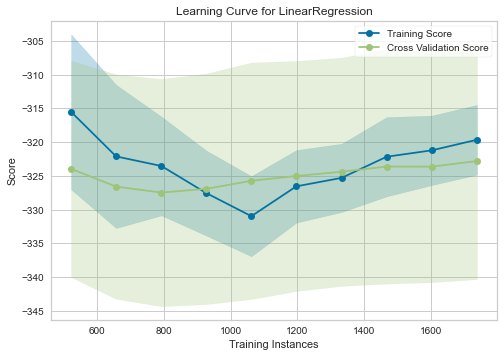

LinearRegression
Best hyperparameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score:  322.7913947782657
Test MAE: 328.564
Test MAPE: 9.882%
Test RMSE: 420.537
Test R^2: 0.172


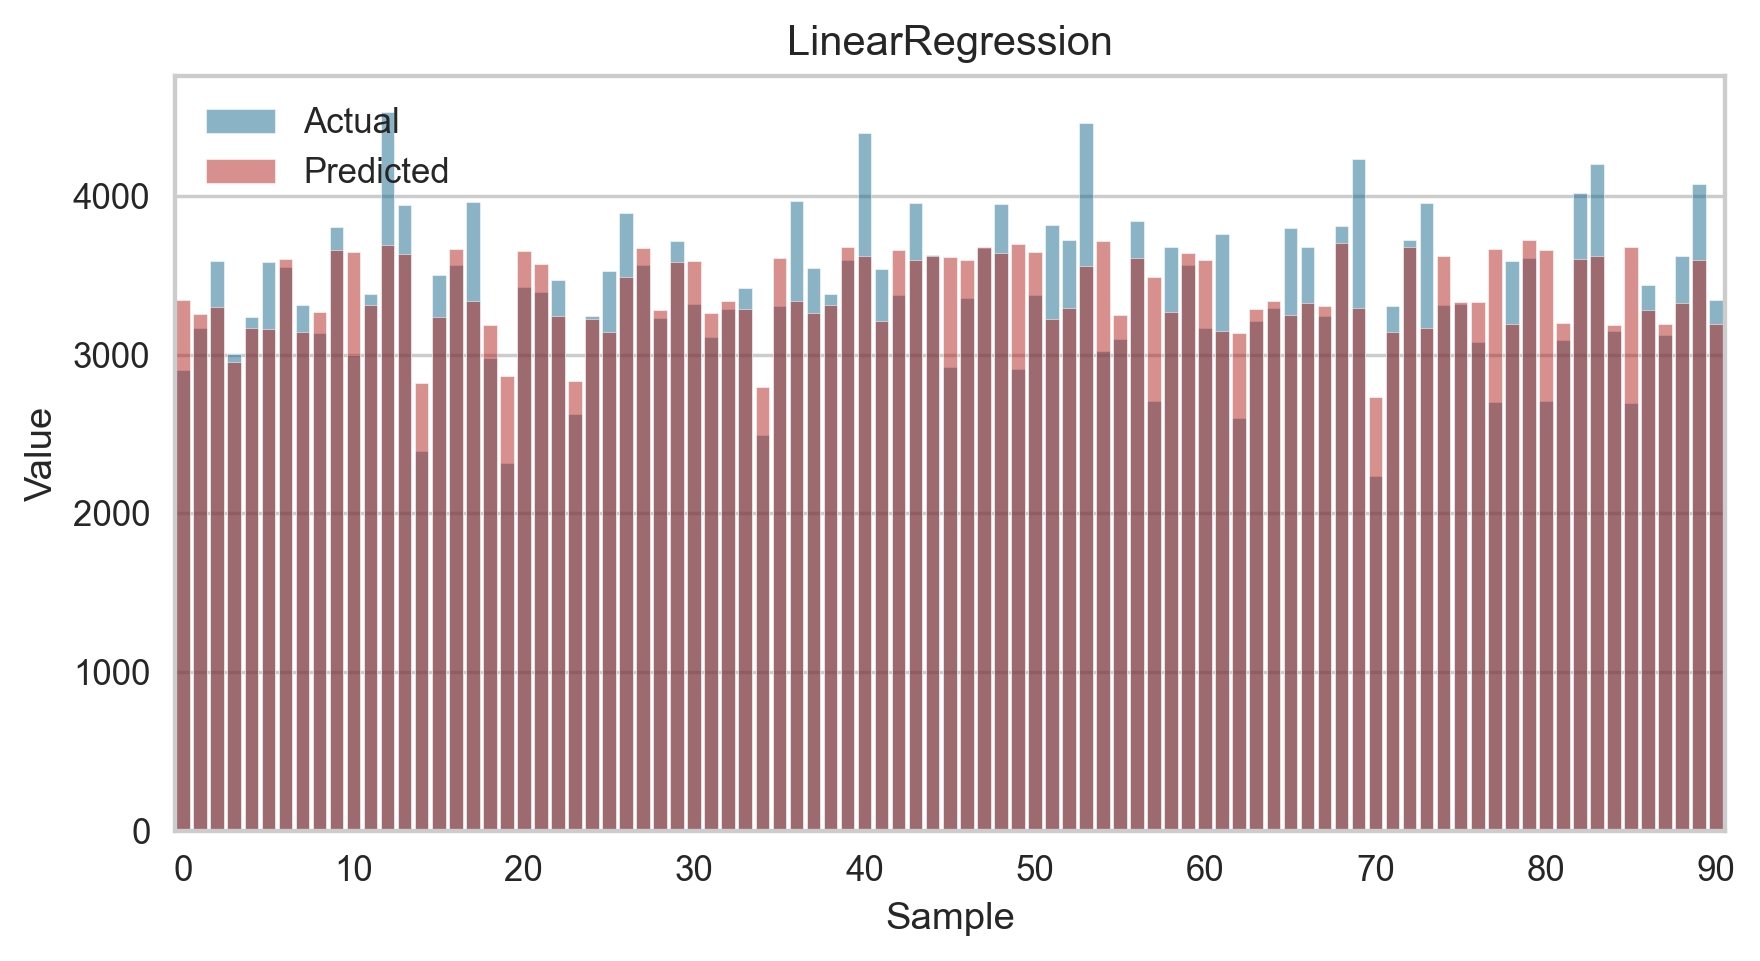

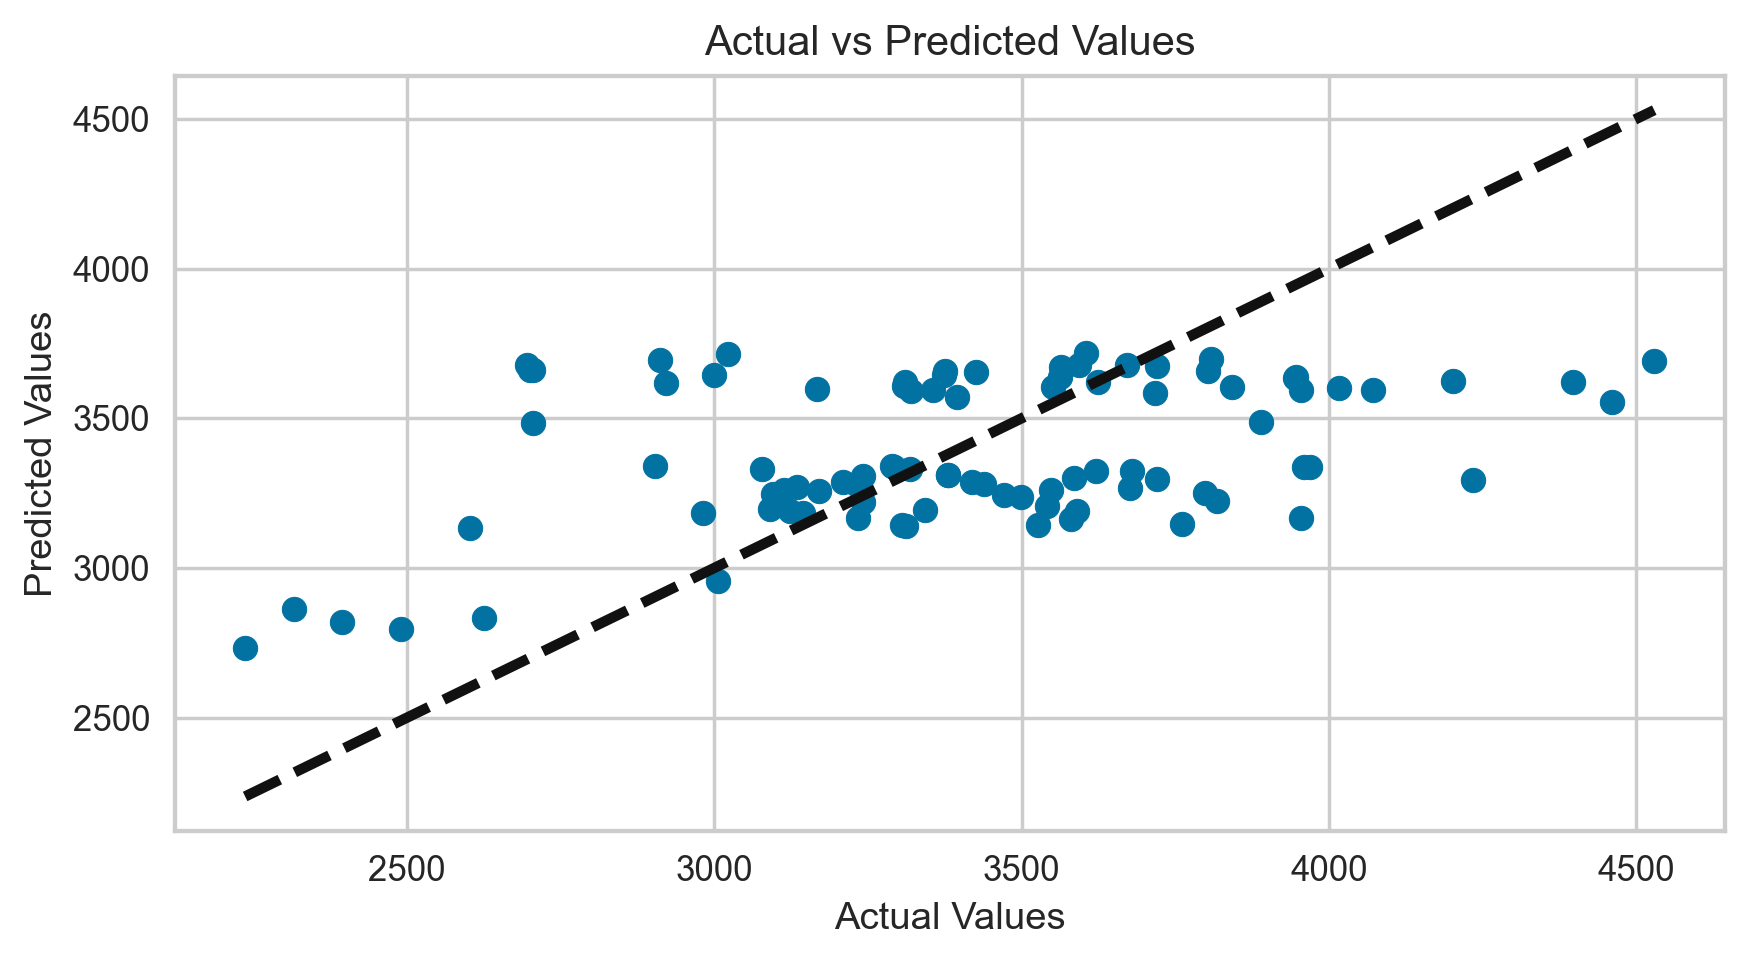

KeyboardInterrupt: 

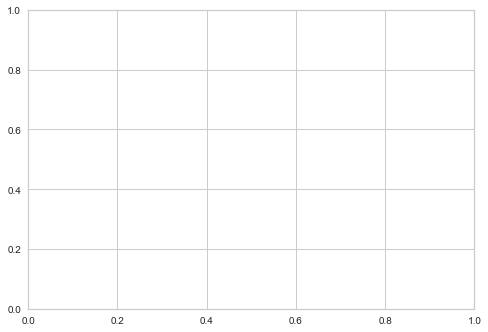

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from yellowbrick.model_selection import LearningCurve

# Define the parameter grids for each model
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_grid_rfr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}


model_accuracy = {}

# Create a list of tuples containing the models and their respective parameter grids
models = [
    (LinearRegression(), param_grid_lr),
    (RandomForestRegressor(), param_grid_rfr),
    (GradientBoostingRegressor(), param_grid_gbr),
    
]

# Loop through the list of models, and fit each model using GridSearchCV
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error' , n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    best_model = grid.best_estimator_
    sizes = np.linspace(0.3, 1.0, 10)
    lc_viz = LearningCurve(best_model, scoring='neg_mean_absolute_error', train_sizes=sizes, n_jobs=-1)
    lc_viz.fit(X_train, y_train)
    lc_viz.show()

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape*100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("="*50)
    
    # Store accuracy metrics in dictionary
    model_accuracy[model.__class__.__name__] = {"MAE": mae, "MAPE": mape, "RMSE": rmse, "R^2": r2}
    
    # Create bar plot of actual vs predicted values
    fig, ax = plt.subplots(figsize=(8,4), dpi=250)
    sns.barplot(x=np.arange(len(y_test)), y=y_test, color='b', alpha=0.5, label='Actual', ax=ax)
    sns.barplot(x=np.arange(len(y_test)), y=y_pred, color='r', alpha=0.5, label='Predicted', ax=ax)
    ax.set(xlabel='Sample', ylabel='Value', title=model.__class__.__name__)
    ax.legend()
    # Set y-axis tick locator to show every 5 minutes
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.show()
    
    # Create actual vs predicted plot
    plt.figure(1,(8,4),dpi = 250)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

# Create bar plot of accuracy metrics for each model
fig, ax = plt.subplots(figsize=(8,4), dpi=250)
model_names = list(model_accuracy.keys())
mae_scores = [model_accuracy[model]["MAE"] for model in model_names]
mape_scores = [model_accuracy[model]["MAPE"] for model in model_names]
rmse_scores = [model_accuracy[model]["RMSE"] for model in model_names]
r2_scores = [model_accuracy[model]["R^2"] for model in model_names]
ax.bar(model_names, mae_scores, alpha=0.5, label="MAE")

In [ ]:
conditions=weather.conditions.unique()
print(len(conditions),conditions)


7 ['Partially cloudy' 'Clear' 'Snow, Rain, Partially cloudy'
 'Rain, Partially cloudy' 'Overcast' 'Rain, Overcast'
 'Snow, Rain, Overcast']


# Count the number of missing values in the 'column_name' column
missing_values_count = onewaytime['visibility'].isna().sum()
missing_values_count

onewaytime.dropna(subset=['visibility'], inplace=True)

# Count the number of missing values in the 'column_name' column
missing_values_count = onewaytime['visibility'].isna().sum()
missing_values_count

In [ ]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction',
          'time_of_day','weekday','daytype','date','temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'snow', 'snowdepth', 'windgust', 'winddir', 'windspeed', 'cloudcover',
       'conditions', 'icon']
X = onewaytime[features]
y = onewaytime['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04,shuffle=True, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

LinearRegression
Best hyperparameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score:  180583.02731732727
Test MAE: 304.105
Test MAPE: 9.291%
Test RMSE: 381.720
Test R^2: 0.507


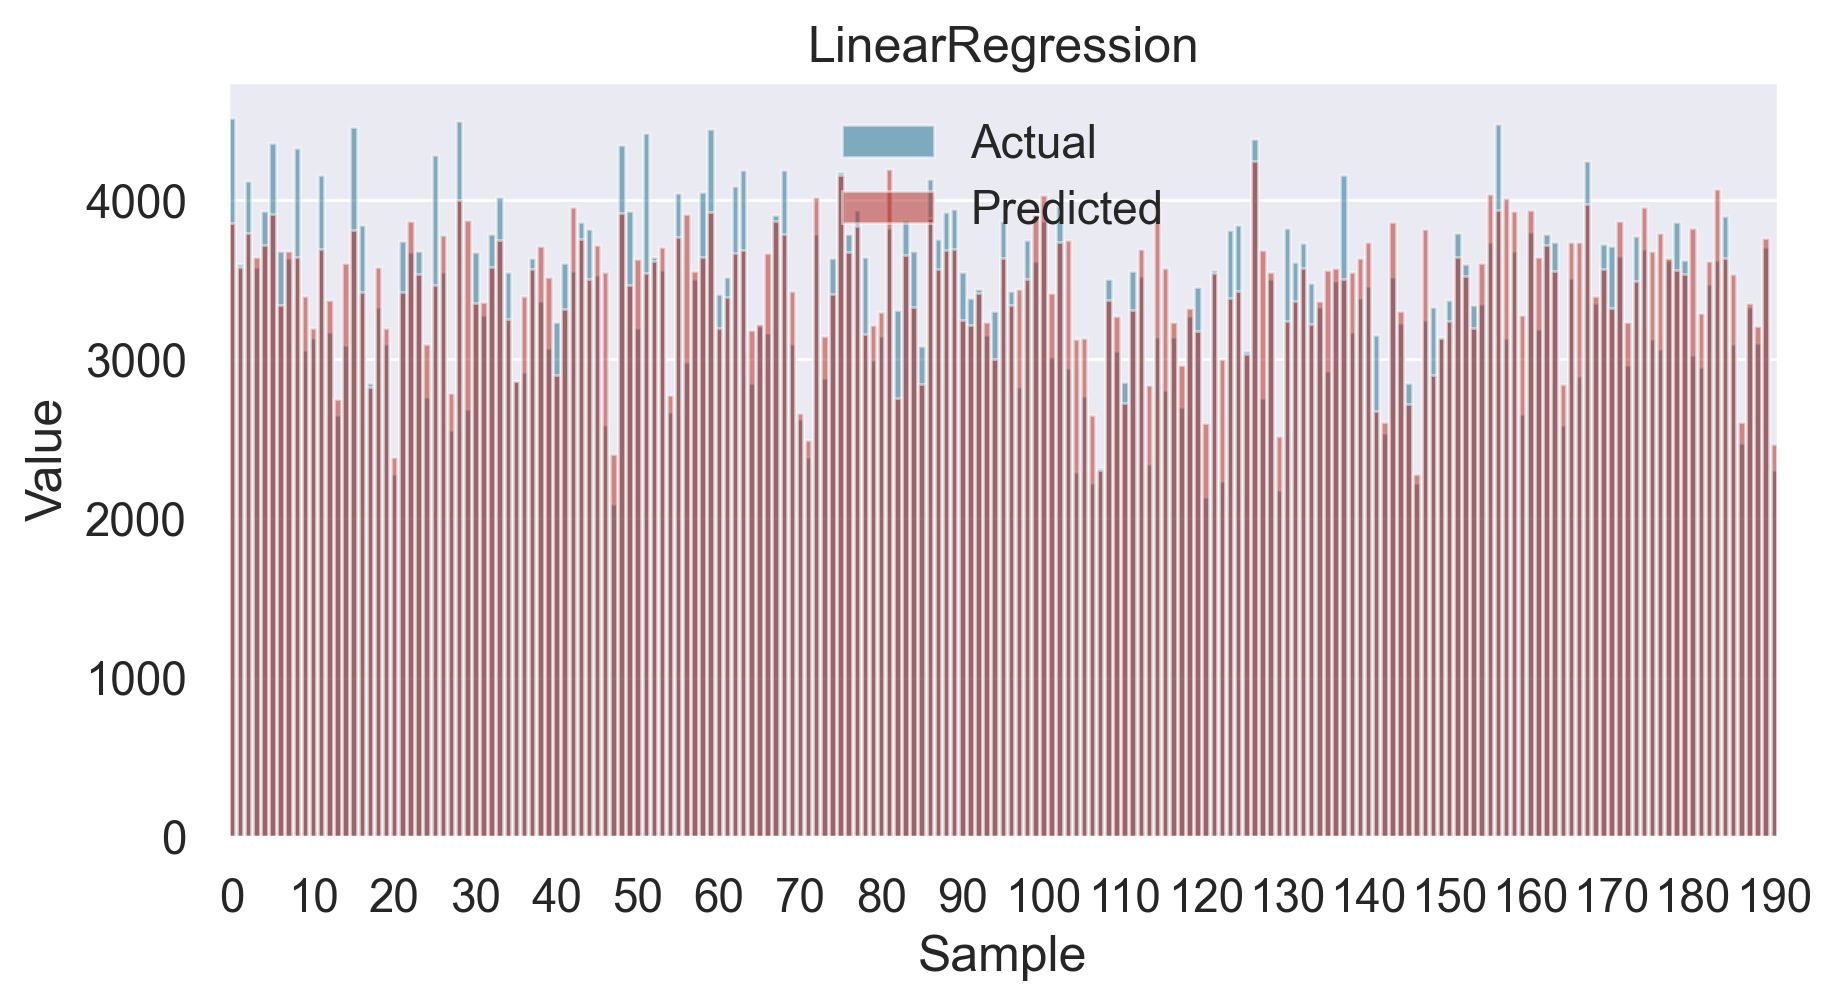

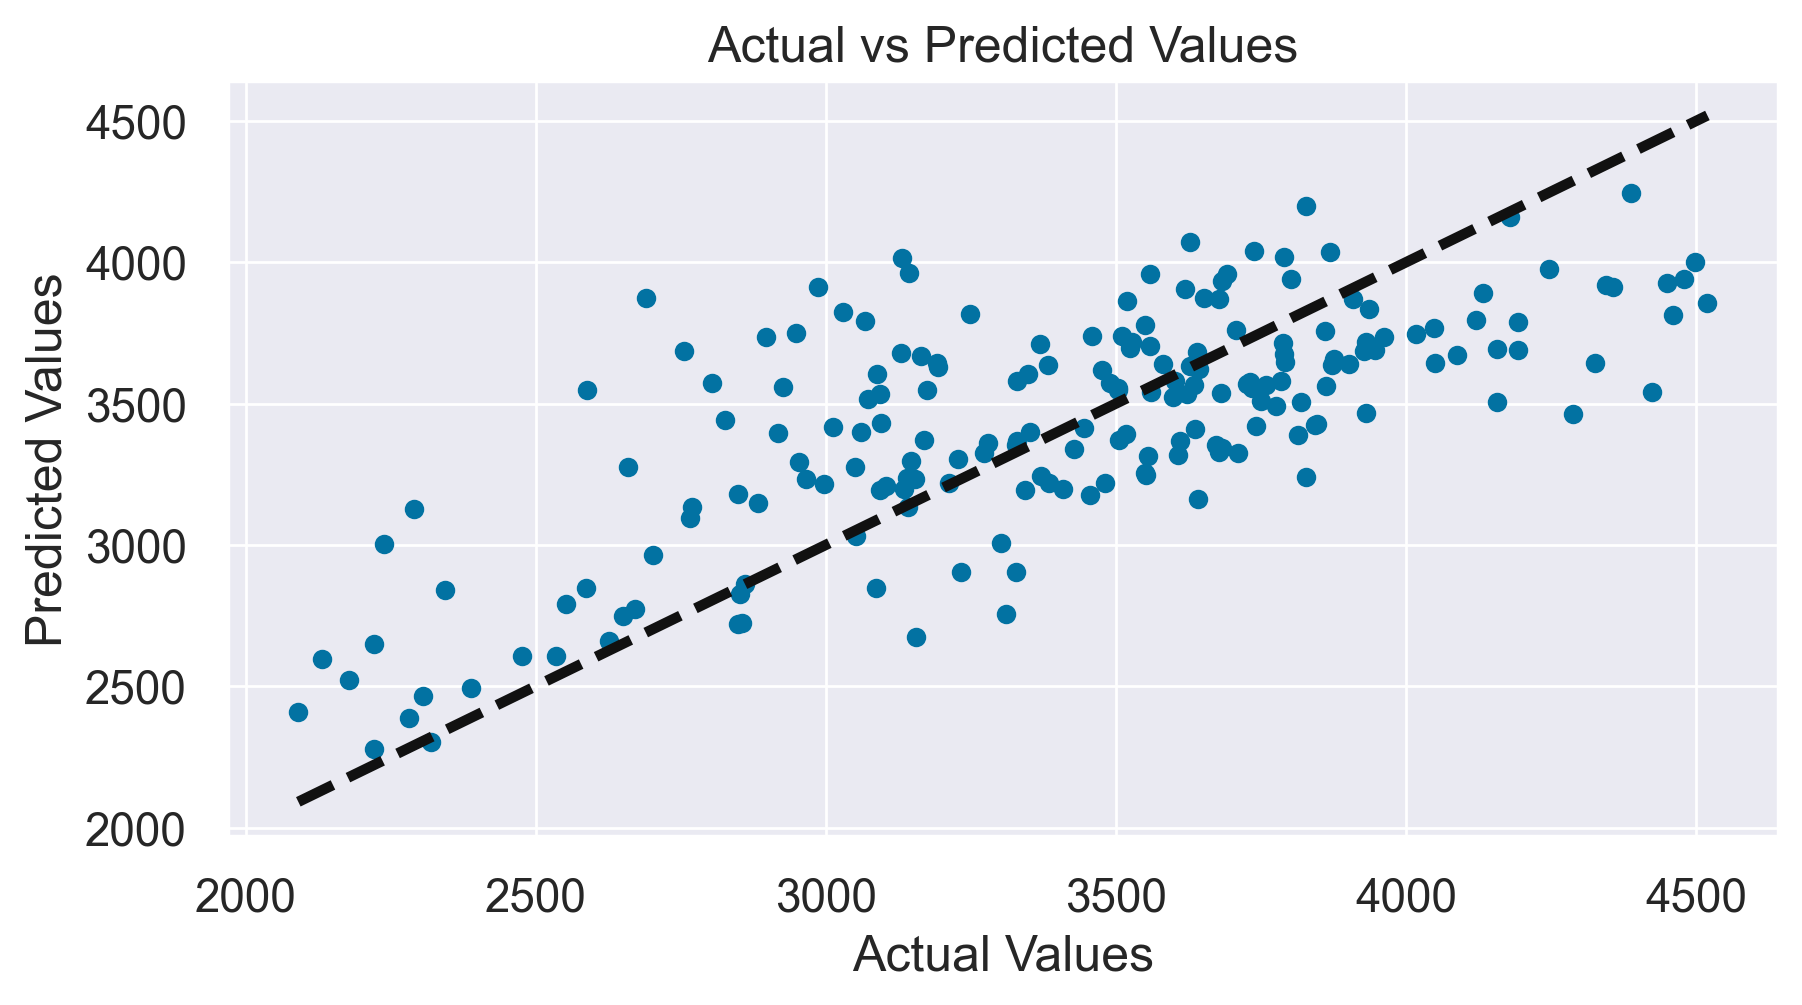

RandomForestRegressor
Best hyperparameters:  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1000}
Best score:  94750.08789952235
Test MAE: 204.143
Test MAPE: 6.060%
Test RMSE: 271.121
Test R^2: 0.751


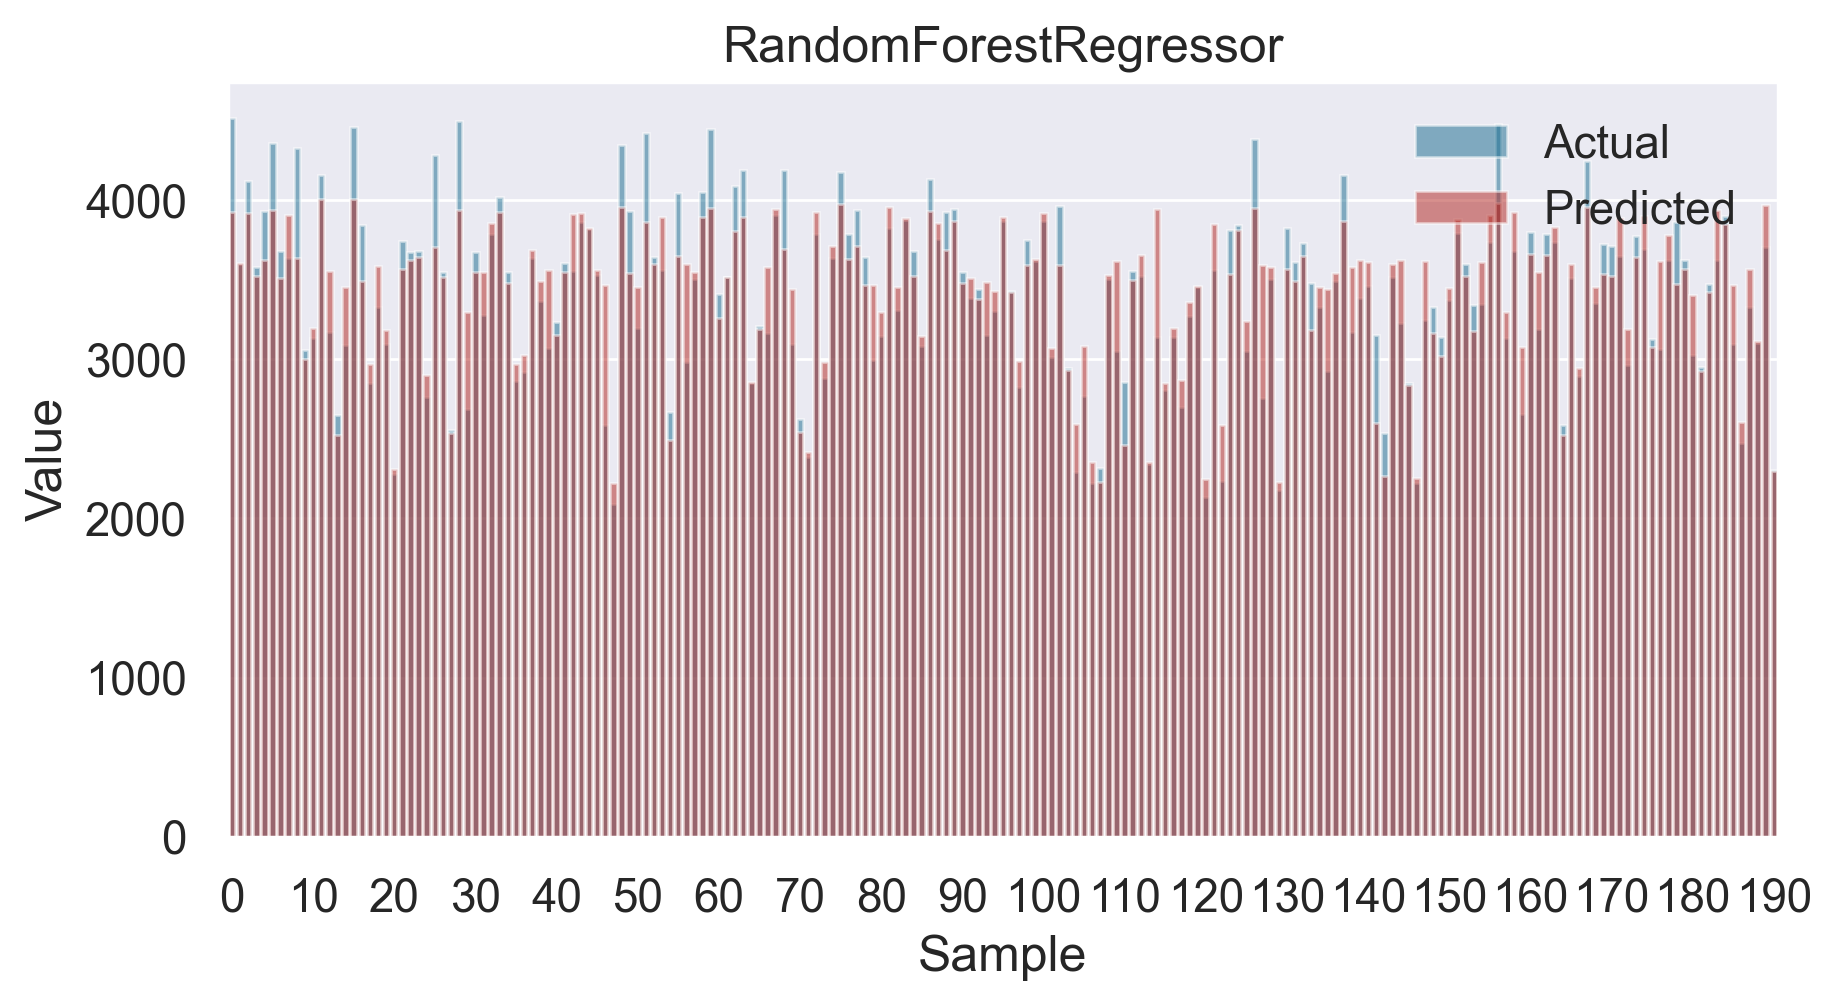

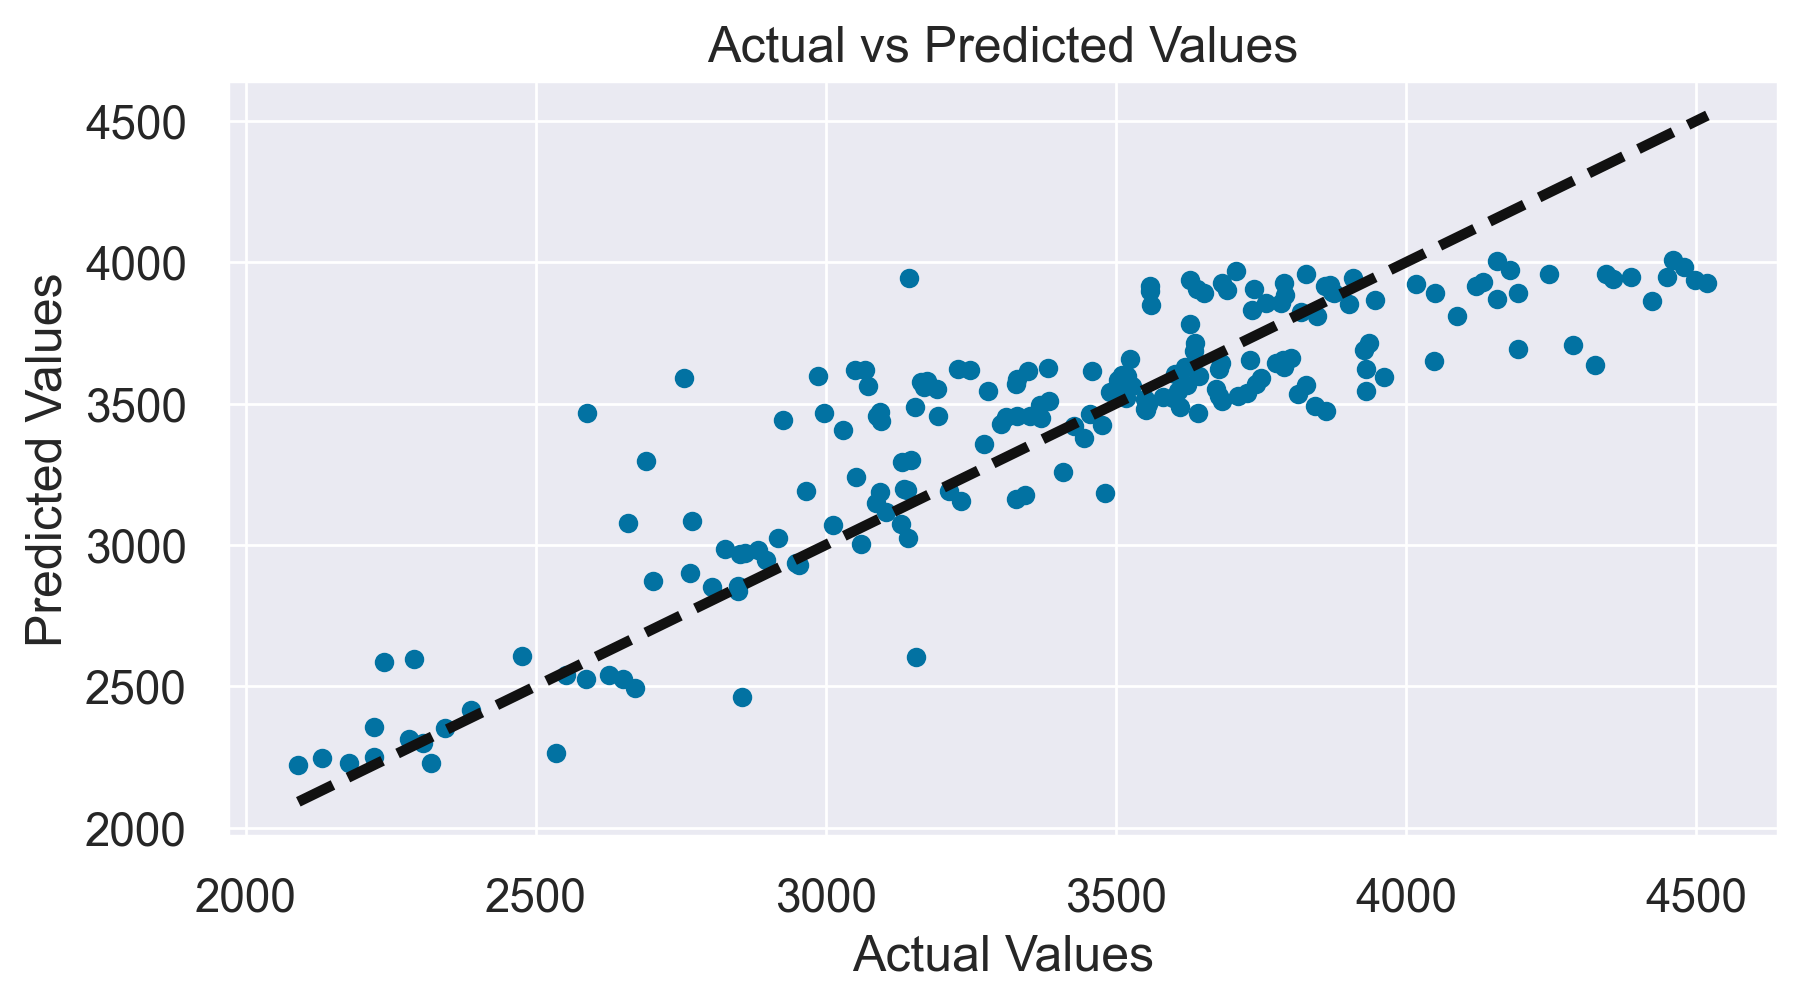

GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best score:  63823.85860491175
Test MAE: 177.250
Test MAPE: 5.279%
Test RMSE: 235.957
Test R^2: 0.812


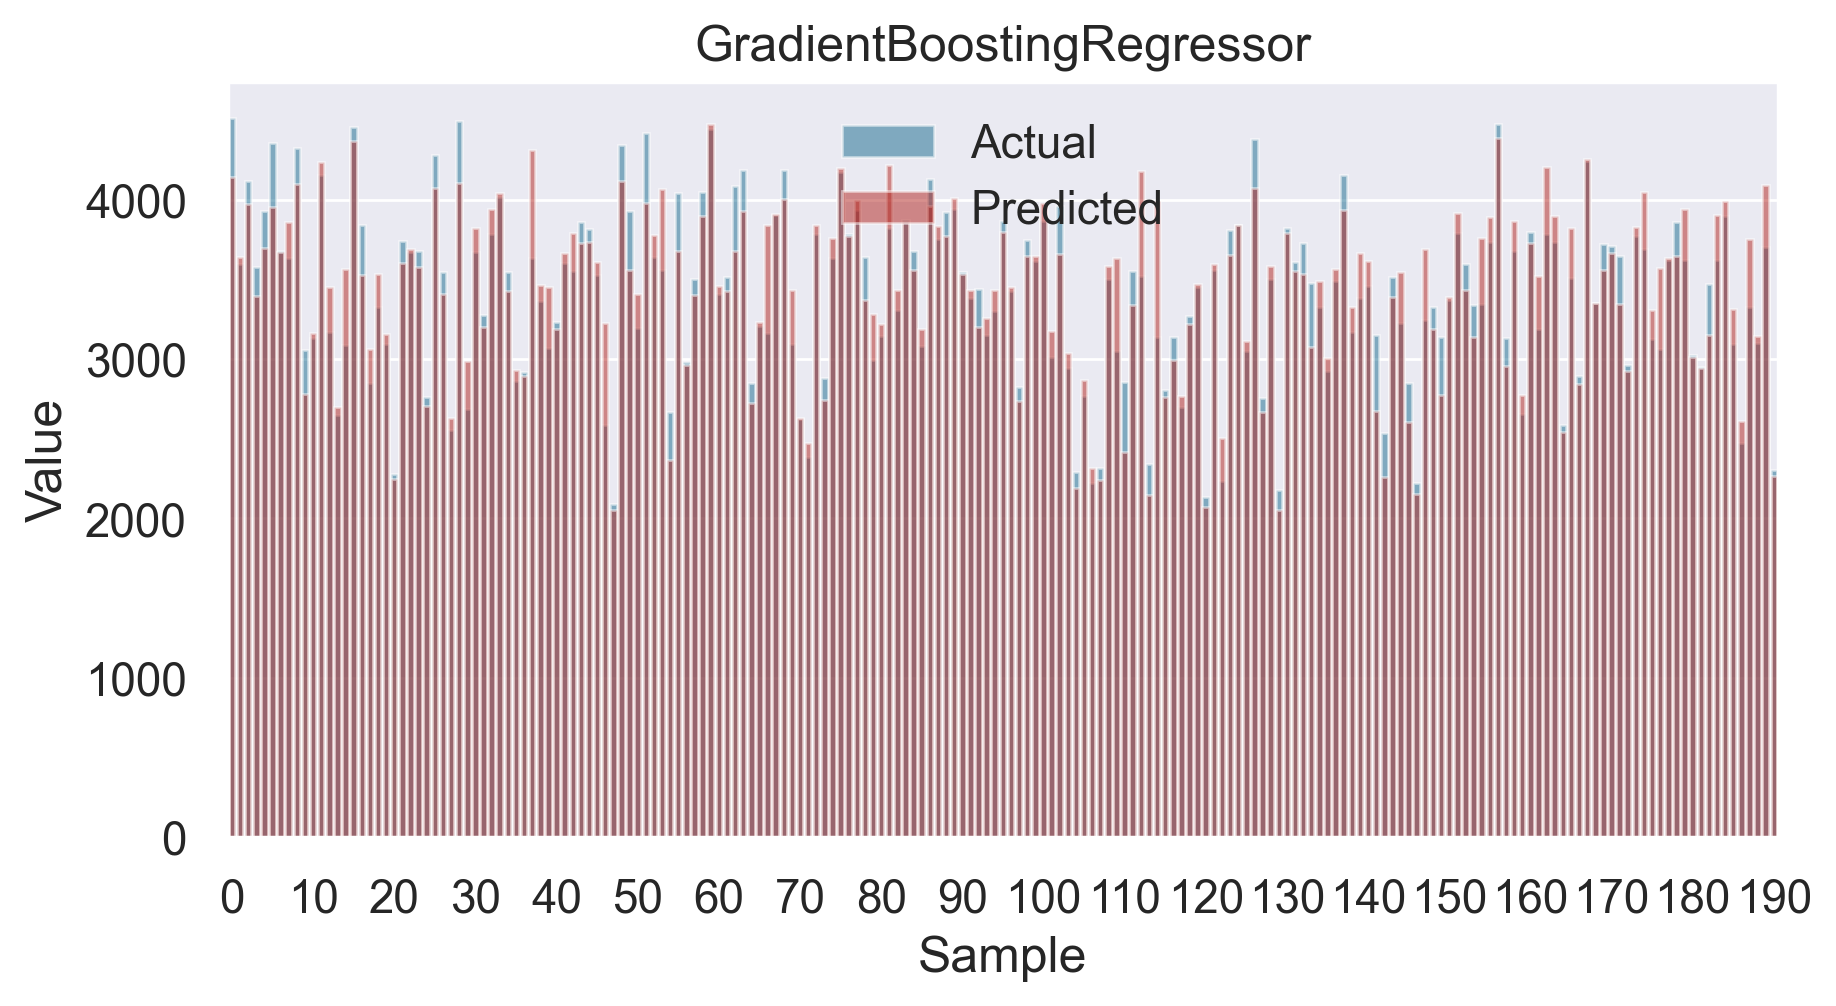

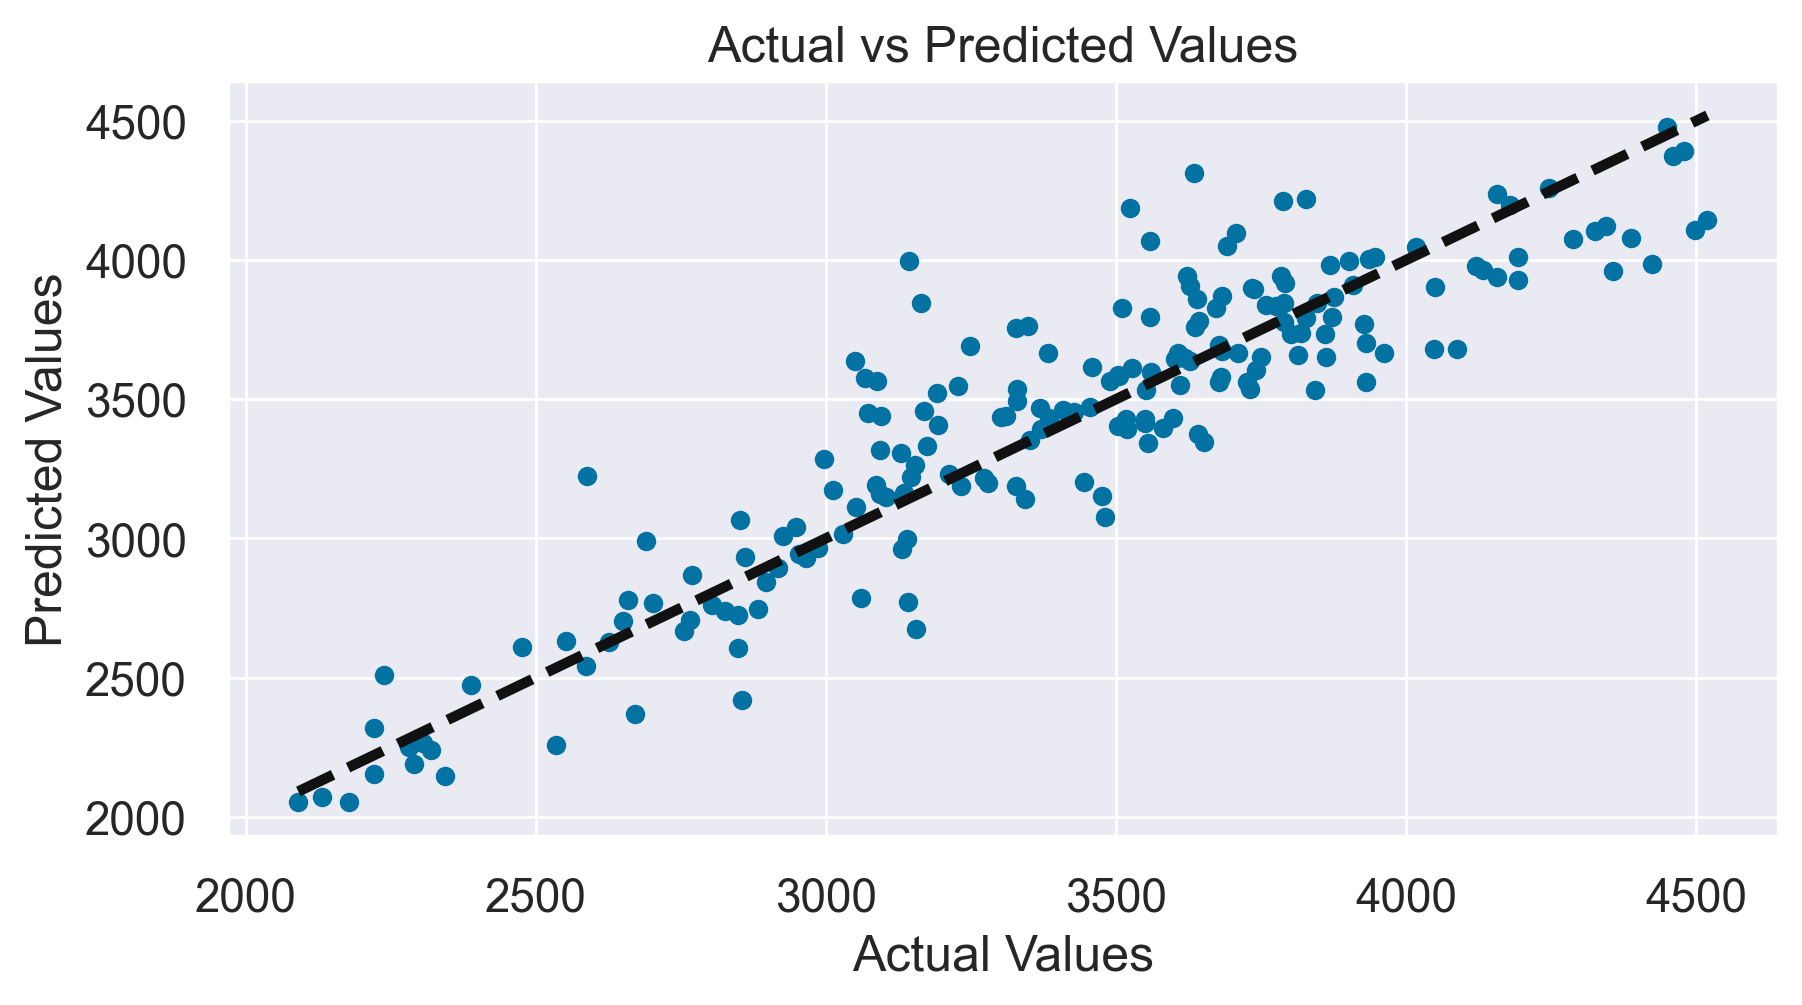

<BarContainer object of 3 artists>

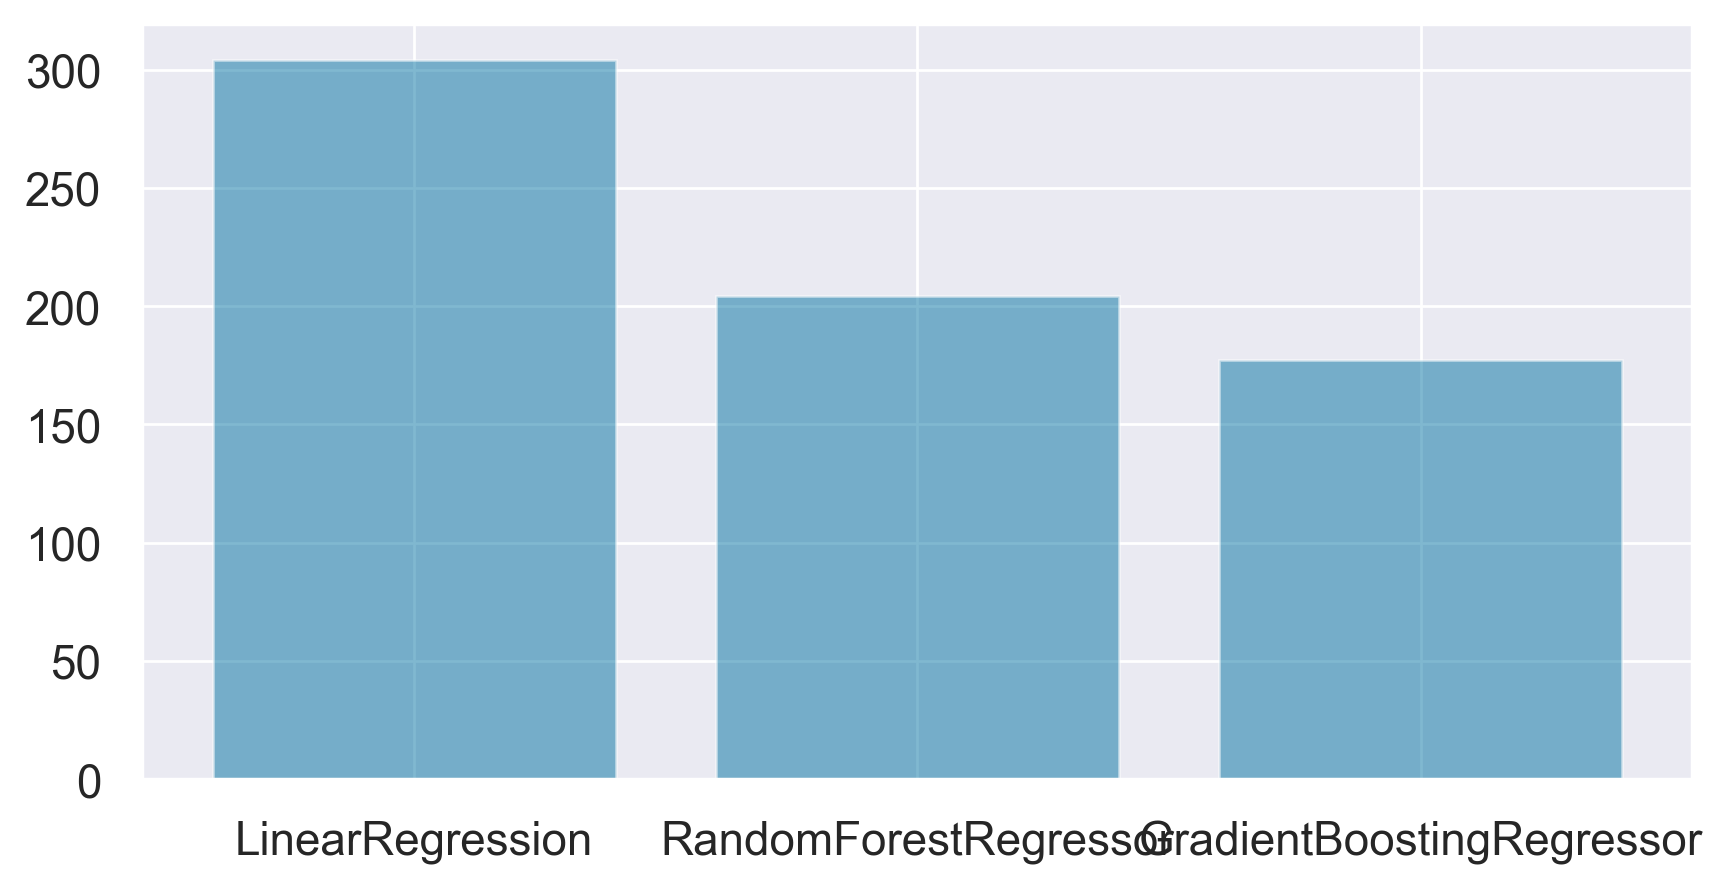

In [ ]:
# Define the parameter grids for each model
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_grid_rfr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_xgb = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_catboost = {
    'iterations': [100, 500, 1000],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

model_accuracy = {}

# Create a list of tuples containing the models and their respective parameter grids
models = [
    (LinearRegression(), param_grid_lr),
    (RandomForestRegressor(), param_grid_rfr),
    (GradientBoostingRegressor(), param_grid_gbr),
    
]

# Loop through the list of models, and fit each model using GridSearchCV
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape*100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("="*50)
    
    # Store accuracy metrics in dictionary
    model_accuracy[model.__class__.__name__] = {"MAE": mae, "MAPE": mape, "RMSE": rmse, "R^2": r2}
    
    # Create bar plot of actual vs predicted values
    fig, ax = plt.subplots(figsize=(8,4), dpi=250)
    sns.barplot(x=np.arange(len(y_test)), y=y_test, color='b', alpha=0.5, label='Actual', ax=ax)
    sns.barplot(x=np.arange(len(y_test)), y=y_pred, color='r', alpha=0.5, label='Predicted', ax=ax)
    ax.set(xlabel='Sample', ylabel='Value', title=model.__class__.__name__)
    ax.legend()
    # Set y-axis tick locator to show every 5 minutes
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.show()
    
    # Create actual vs predicted plot
    plt.figure(1,(8,4),dpi = 250)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

# Create bar plot of accuracy metrics for each model
fig, ax = plt.subplots(figsize=(8,4), dpi=250)
model_names = list(model_accuracy.keys())
mae_scores = [model_accuracy[model]["MAE"] for model in model_names]
mape_scores = [model_accuracy[model]["MAPE"] for model in model_names]
rmse_scores = [model_accuracy[model]["RMSE"] for model in model_names]
r2_scores = [model_accuracy[model]["R^2"] for model in model_names]
ax.bar(model_names, mae_scores, alpha=0.5, label="MAE")

In [ ]:
shour_dummies = pd.get_dummies(onewaytime['shour'], prefix='shour')
onewaytime = pd.concat([onewaytime, shour_dummies], axis=1)


In [ ]:
onewaytime.columns

Index(['time', 'stopname', 'VehicleId', 'time1', 'stopname1', 'VehicleId1',
       'duration', 'shour', 'direction', 'weekday', 'smin', 'date',
       'time_of_day', 'daytype', 'traffic', 'shour1', 'temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth',
       'windgust', 'winddir', 'windspeed', 'cloudcover', 'conditions', 'icon',
       'shour_5', 'shour_6', 'shour_7', 'shour_8', 'shour_9', 'shour_10',
       'shour_11', 'shour_12', 'shour_13', 'shour_14', 'shour_15', 'shour_16',
       'shour_17', 'shour_18'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

LinearRegression
Best hyperparameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score:  133554.92740351142
Test MAE: 283.864
Test MAPE: 8.135%
Test RMSE: 366.649
Test R^2: 0.611


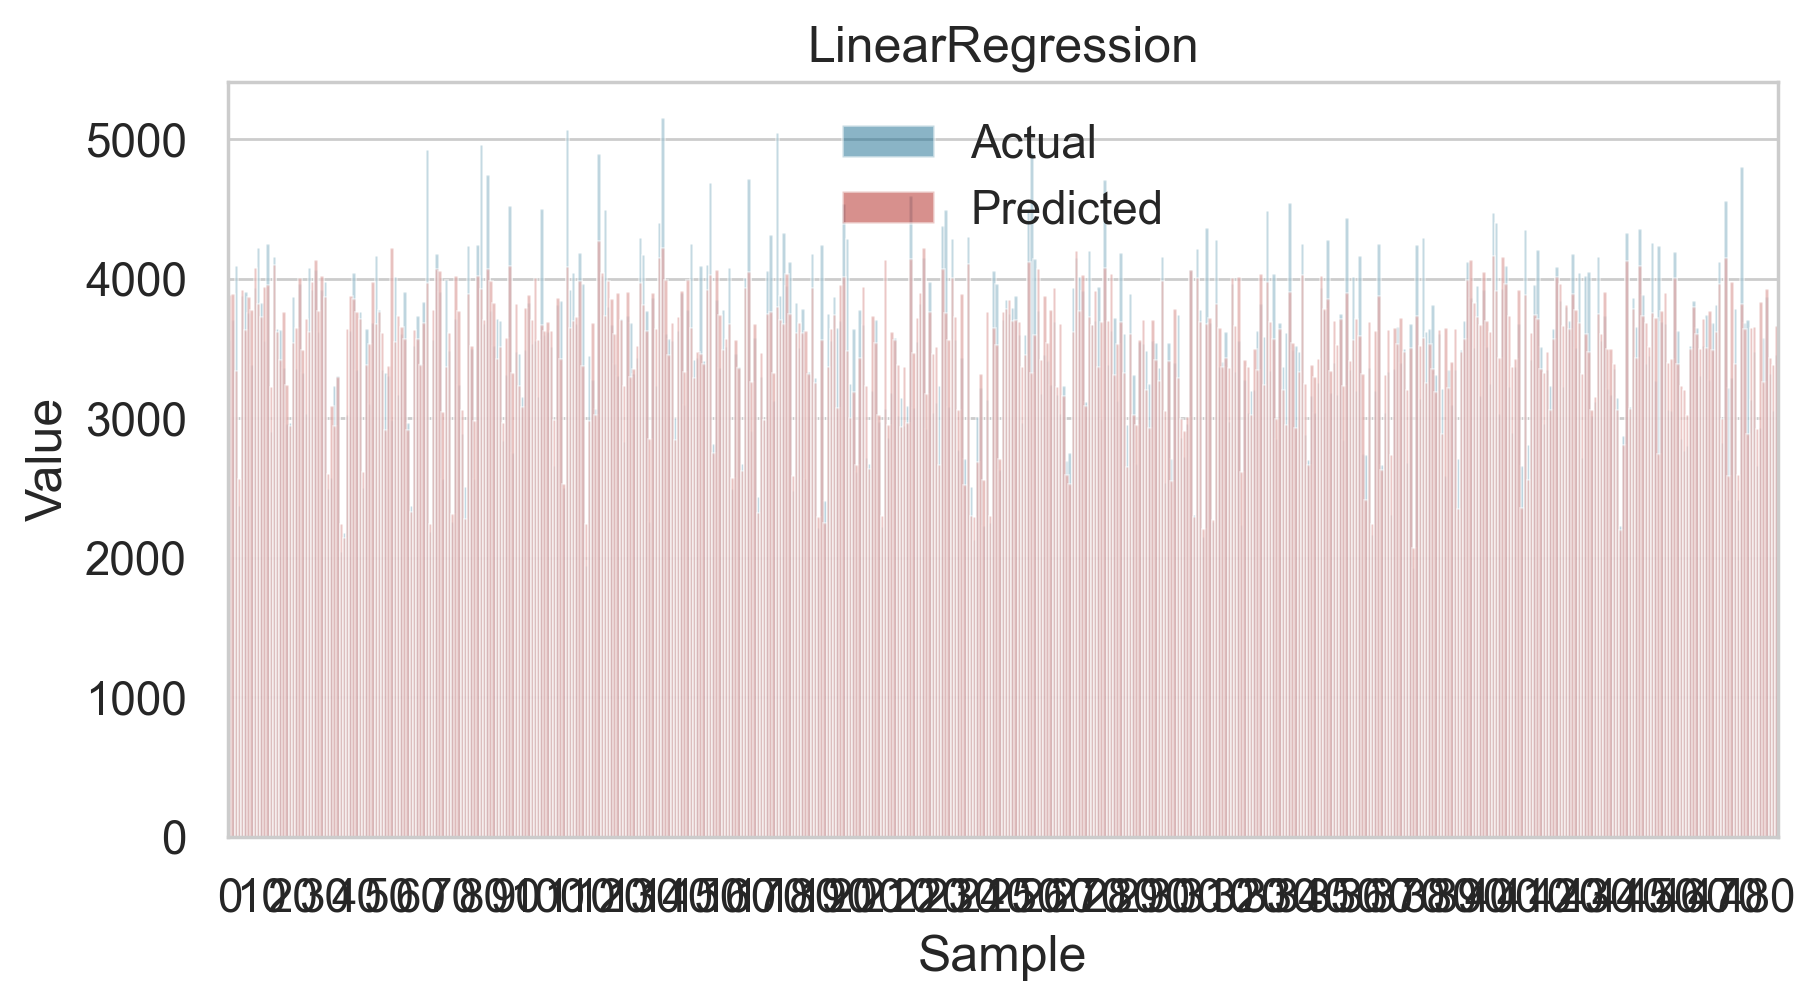

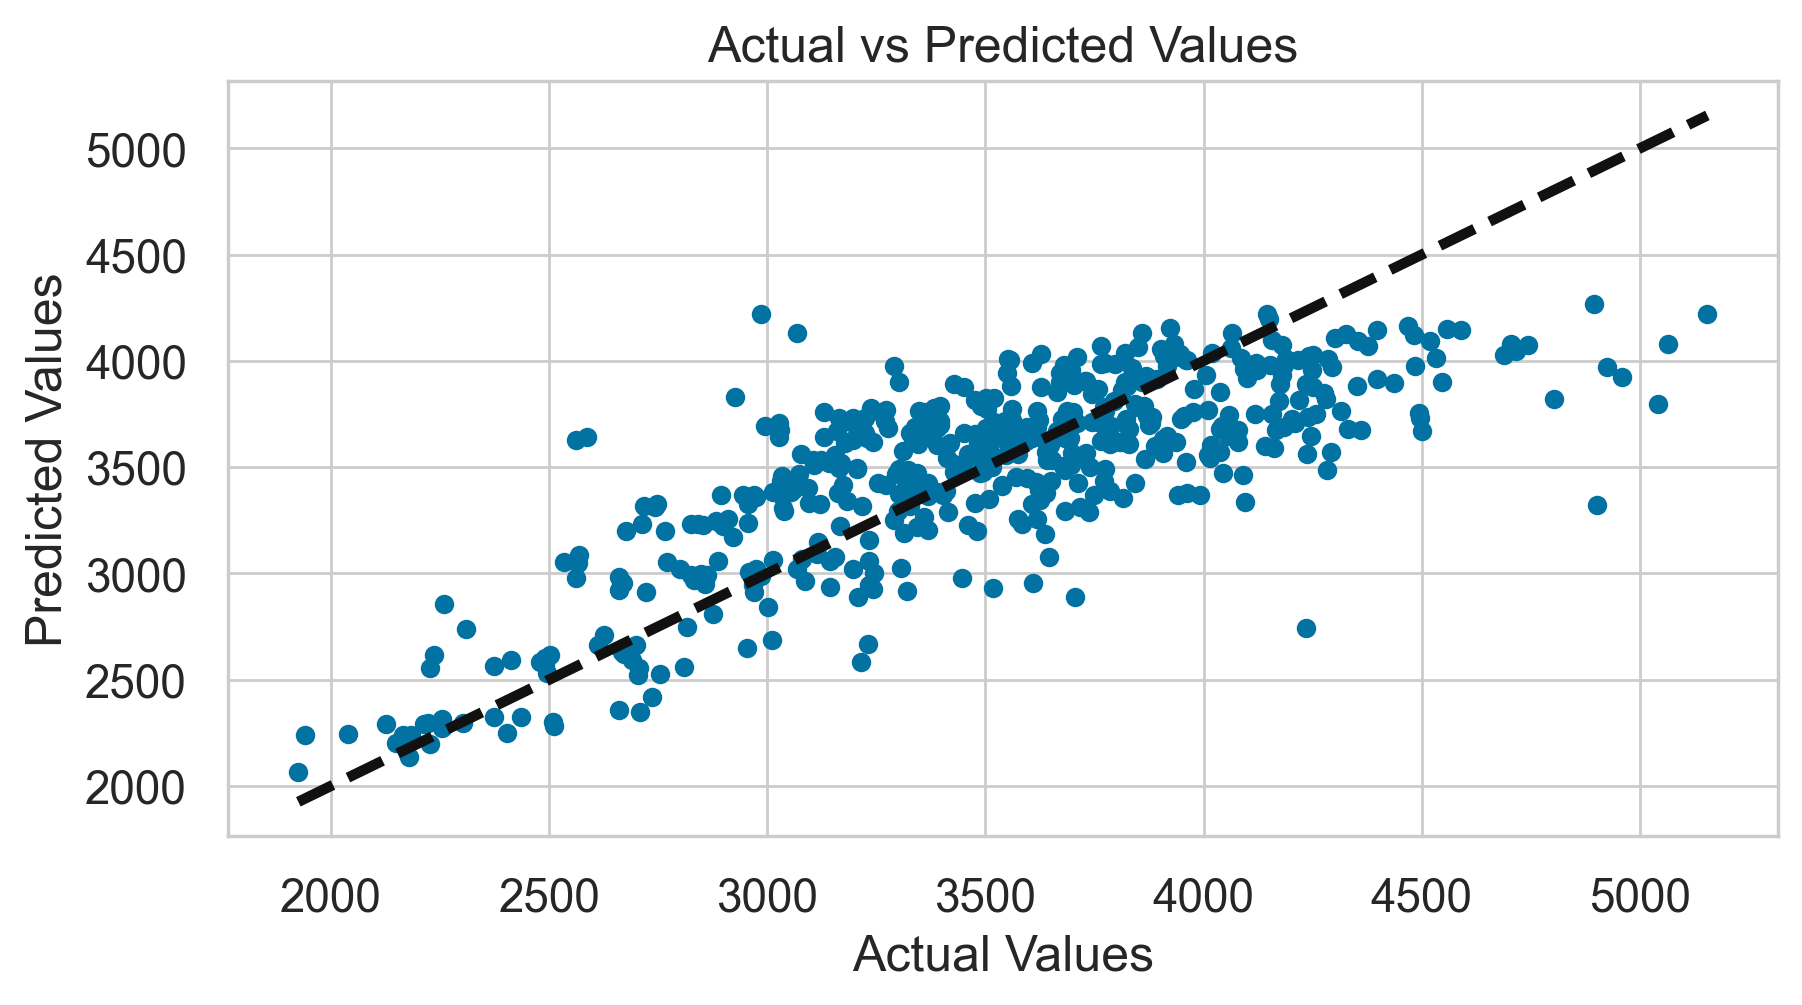

RandomForestRegressor
Best hyperparameters:  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1000}
Best score:  108596.18384140711
Test MAE: 249.120
Test MAPE: 7.062%
Test RMSE: 329.352
Test R^2: 0.686


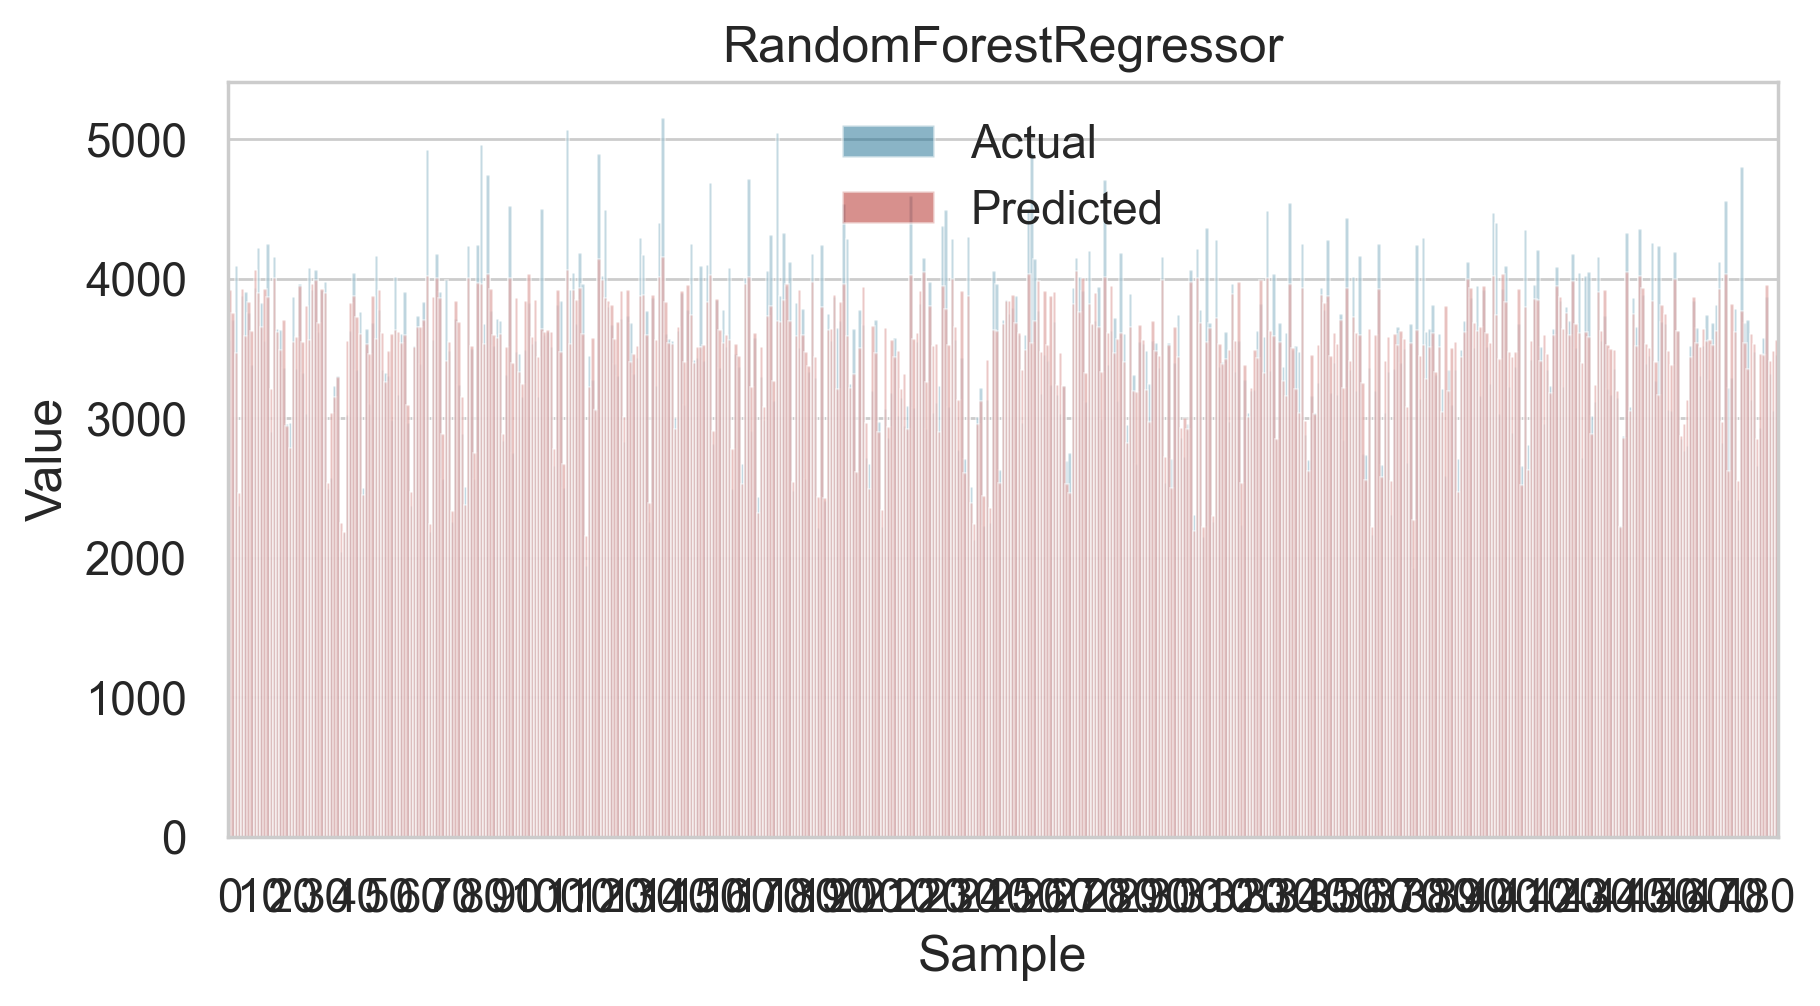

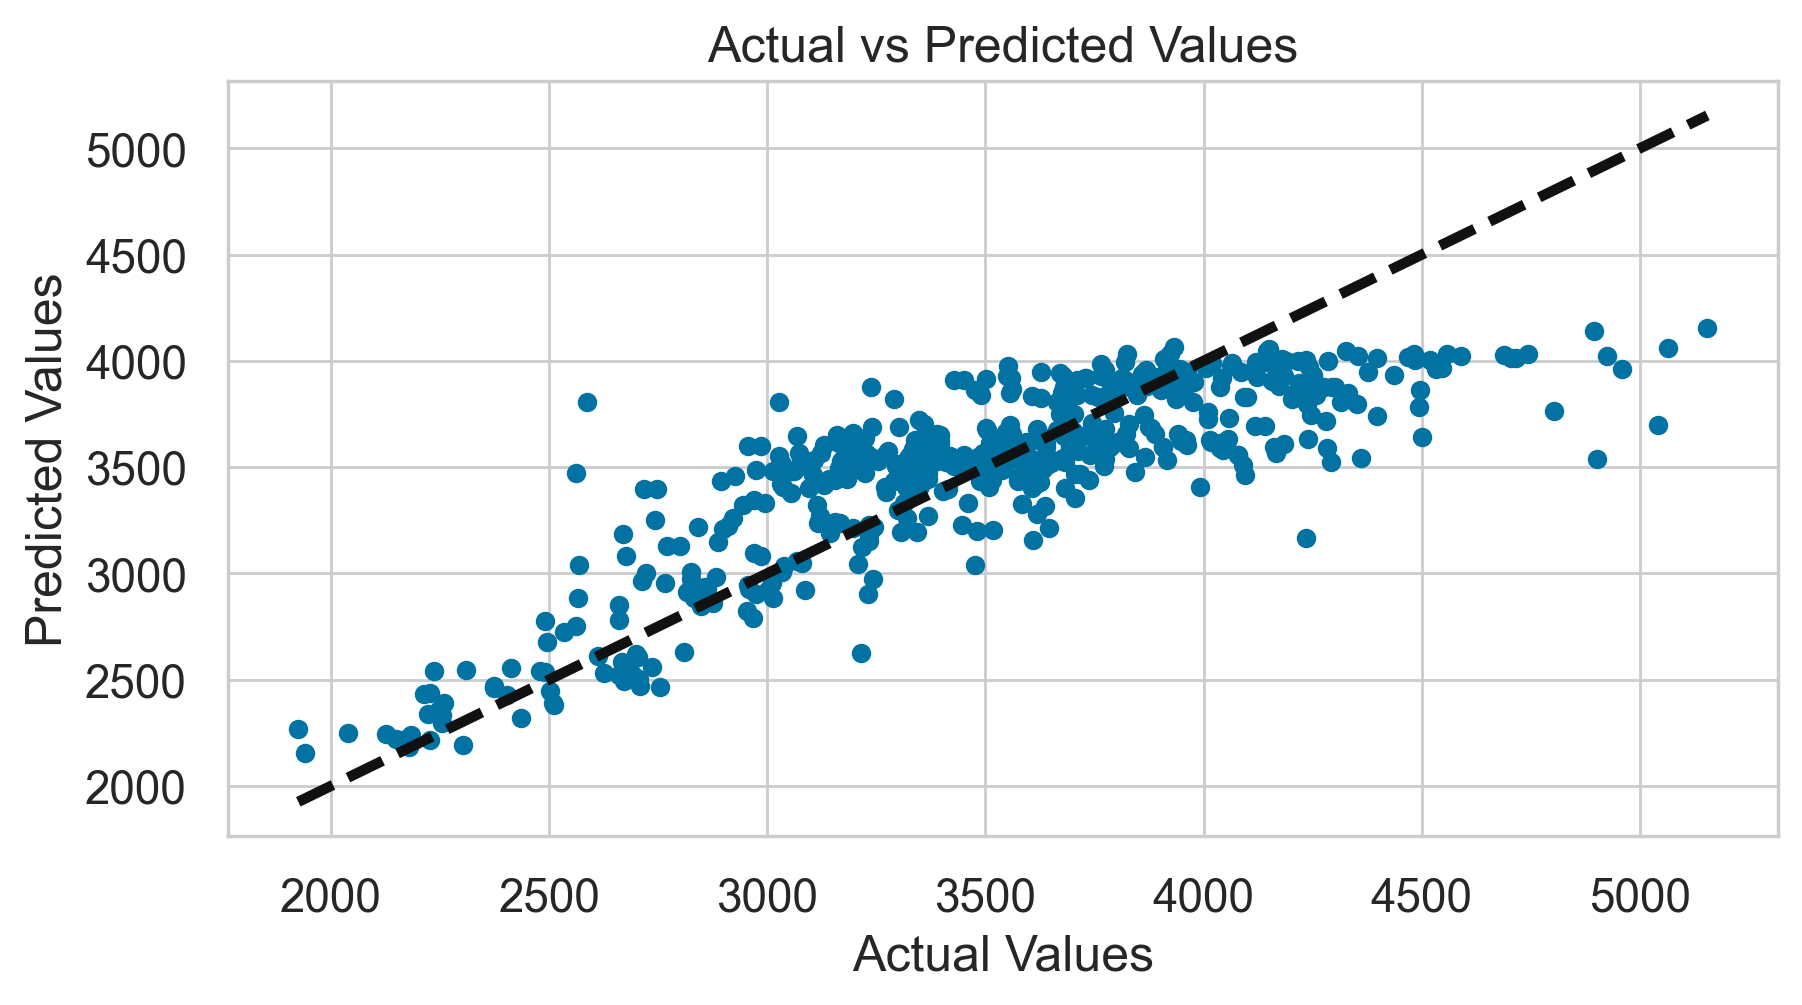

GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best score:  66716.26172789266
Test MAE: 204.210
Test MAPE: 5.898%
Test RMSE: 262.925
Test R^2: 0.800


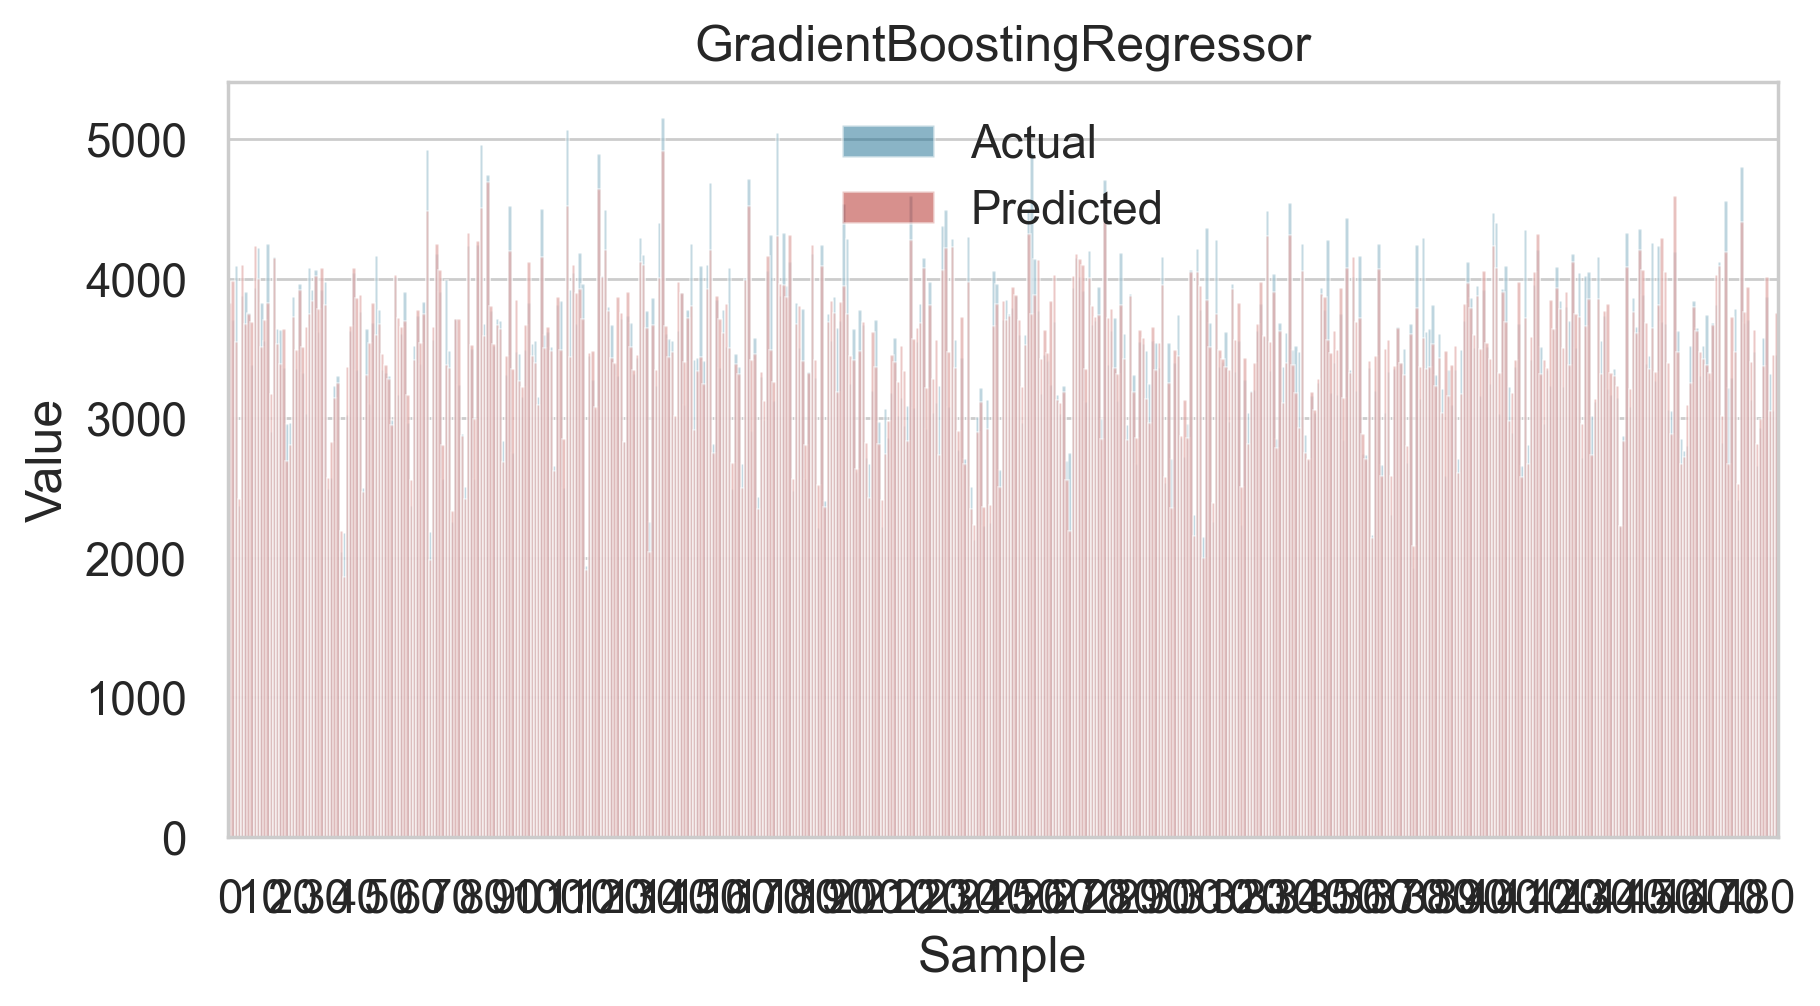

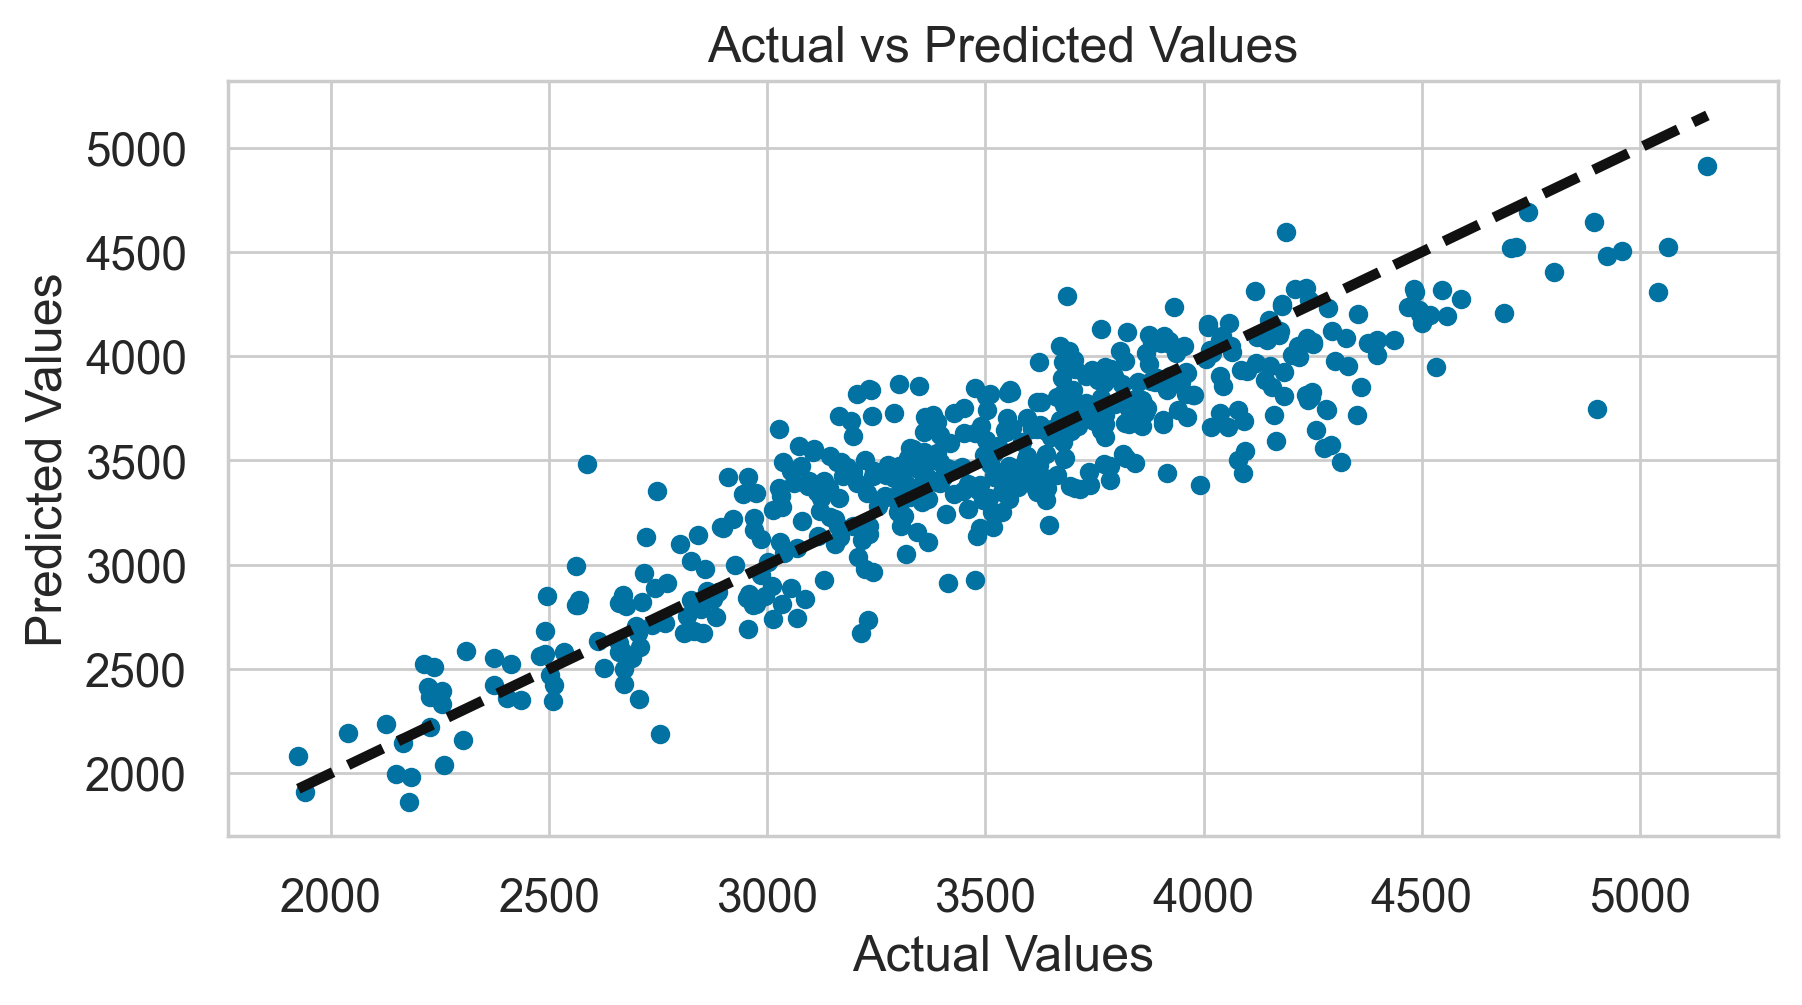

<BarContainer object of 3 artists>

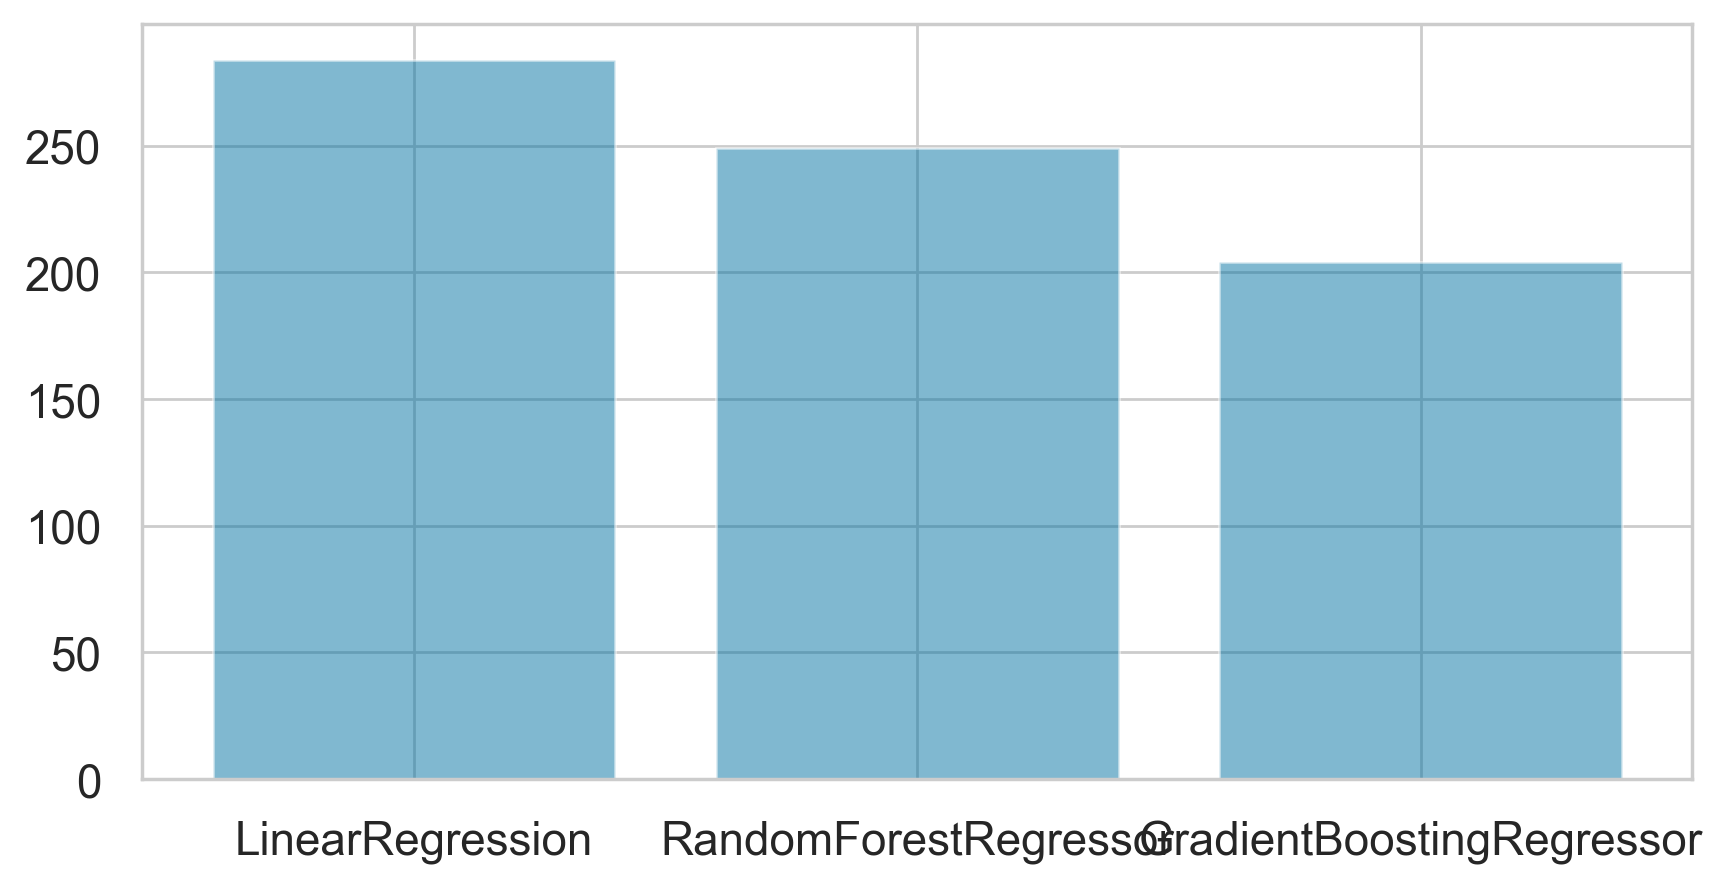

In [ ]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction', 'time_of_day','weekday','daytype','date','temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'snow', 'snowdepth', 'windgust', 'winddir', 'windspeed', 'cloudcover', 'conditions', 'icon','shour_5', 'shour_6', 'shour_7', 'shour_8', 'shour_9', 'shour_10', 'shour_11', 'shour_12', 'shour_13','shour_14', 'shour_15', 'shour_16', 'shour_17', 'shour_18']
X = onewaytime[features]
y = onewaytime['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=True, random_state=42)

# Define the parameter grids for each model
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_grid_rfr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_xgb = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_catboost = {
    'iterations': [100, 500, 1000],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

model_accuracy = {}

# Create a list of tuples containing the models and their respective parameter grids
models = [
    (LinearRegression(), param_grid_lr),
    (RandomForestRegressor(), param_grid_rfr),
    (GradientBoostingRegressor(), param_grid_gbr),
    
]

# Loop through the list of models, and fit each model using GridSearchCV
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape*100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("="*50)
    
    # Store accuracy metrics in dictionary
    model_accuracy[model.__class__.__name__] = {"MAE": mae, "MAPE": mape, "RMSE": rmse, "R^2": r2}
    
    # Create bar plot of actual vs predicted values
    fig, ax = plt.subplots(figsize=(8,4), dpi=250)
    sns.barplot(x=np.arange(len(y_test)), y=y_test, color='b', alpha=0.5, label='Actual', ax=ax)
    sns.barplot(x=np.arange(len(y_test)), y=y_pred, color='r', alpha=0.5, label='Predicted', ax=ax)
    ax.set(xlabel='Sample', ylabel='Value', title=model.__class__.__name__)
    ax.legend()
    # Set y-axis tick locator to show every 5 minutes
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.show()
    
    # Create actual vs predicted plot
    plt.figure(1,(8,4),dpi = 250)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

# Create bar plot of accuracy metrics for each model
fig, ax = plt.subplots(figsize=(8,4), dpi=250)
model_names = list(model_accuracy.keys())
mae_scores = [model_accuracy[model]["MAE"] for model in model_names]
mape_scores = [model_accuracy[model]["MAPE"] for model in model_names]
rmse_scores = [model_accuracy[model]["RMSE"] for model in model_names]
r2_scores = [model_accuracy[model]["R^2"] for model in model_names]
ax.bar(model_names, mae_scores, alpha=0.5, label="MAE")